# Блок 1

# Описание датасета

Данные о поездках на такси в Нью-Йорке. \
Целевая переменная: trip_duration (длительность поездки). \
Задача: "Мы предсказываем длительность поездки на такси".\
Признаки: Пространственные и временные признаки

# Импорт

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tseries.holiday import USFederalHolidayCalendar

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error

import math
import warnings

In [71]:
sns.set(style="whitegrid", context="notebook")

In [72]:
warnings.filterwarnings('ignore')

In [73]:
train = pd.read_csv('/kaggle/input/cu-project-data/train.csv')
test = pd.read_csv('/kaggle/input/cu-project-data/test.csv')

# EDA

In [74]:
print(f'Размер train: {train.shape}')
print(f'Размер test: {test.shape}')

Размер train: (1458644, 11)
Размер test: (625134, 9)


## Посмотрим, как выглядит наш датасет

In [75]:
train.head()

id  vendor_id      pickup_datetime     dropoff_datetime  \
0  id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1  id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2  id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3  id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4  id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  trip_duration  
0         40.765602                  N            455  
1         40.731152                  N            663  
2         40.710087                  N           2124  
3         40.706718                  N            429  
4         40.782520                  N            435

In [76]:
train.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

## Основная инфорация

In [77]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [78]:
train.describe()

vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
count  1.458644e+06     1.458644e+06      1.458644e+06     1.458644e+06   
mean   1.534950e+00     1.664530e+00     -7.397349e+01     4.075092e+01   
std    4.987772e-01     1.314242e+00      7.090186e-02     3.288119e-02   
min    1.000000e+00     0.000000e+00     -1.219333e+02     3.435970e+01   
25%    1.000000e+00     1.000000e+00     -7.399187e+01     4.073735e+01   
50%    2.000000e+00     1.000000e+00     -7.398174e+01     4.075410e+01   
75%    2.000000e+00     2.000000e+00     -7.396733e+01     4.076836e+01   
max    2.000000e+00     9.000000e+00     -6.133553e+01     5.188108e+01   

       dropoff_longitude  dropoff_latitude  trip_duration  
count       1.458644e+06      1.458644e+06   1.458644e+06  
mean       -7.397342e+01      4.075180e+01   9.594923e+02  
std         7.064327e-02      3.589056e-02   5.237432e+03  
min        -1.219333e+02      3.218114e+01   1.000000e+00  
25%        -7.399133e+01      4.073588e+01   3.970000e+02  
50%        -7.397975e+01      4.075452e+01   6.620000e+02  
75%        -7.396301e+01      4.076981e+01   1.075000e+03  
max        -6.133553e+01      4.392103e+01   3.526282e+06

## Кол-во nan значений

In [79]:
train.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

#### Кайф, nan нет

## Анализ таргета

In [80]:
target = 'trip_duration'

print(f'Максимум: {train[target].max()}')
print(f'Минимум: {train[target].min()}')
print(f'Среднее: {train[target].mean()}')
print(f'Среднее: {train[target].median()}')
print(f'Квантили: \n{train[target].quantile([0.25, 0.5, 0.75, 0.9, 0.99])}')

Максимум: 3526282
Минимум: 1
Среднее: 959.4922729603659
Среднее: 662.0
Квантили: 
0.25     397.0
0.50     662.0
0.75    1075.0
0.90    1634.0
0.99    3440.0
Name: trip_duration, dtype: float64


### Распределение таргета

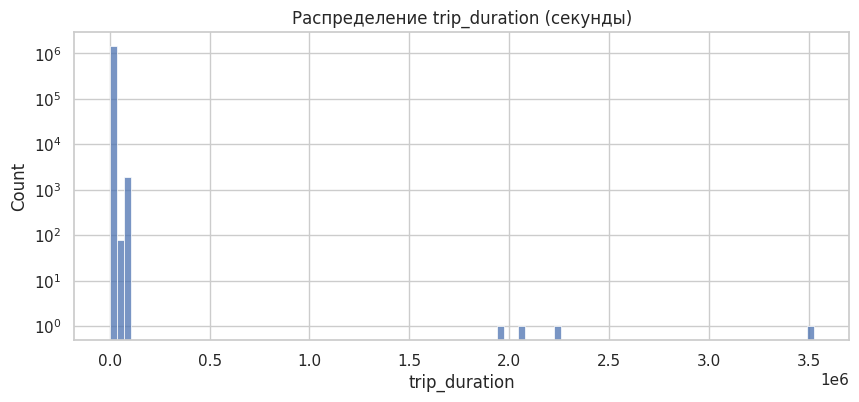

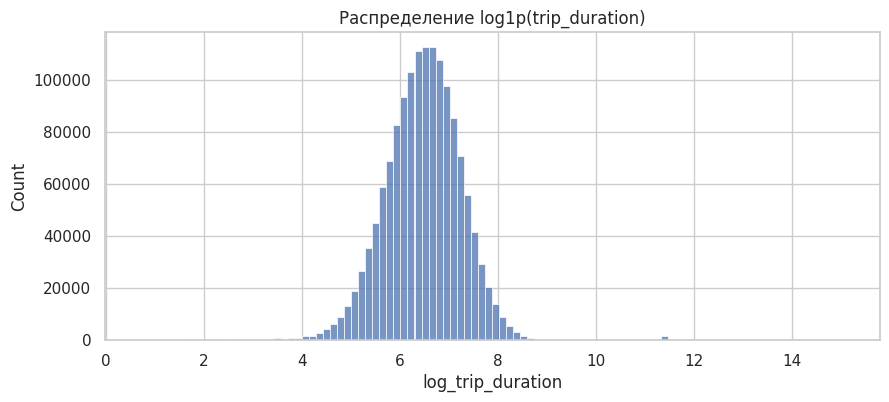

In [81]:
plt.figure(figsize=(10, 4))
sns.histplot(train[target], bins=100, kde=False)
plt.title("Распределение trip_duration (секунды)")
plt.xlabel("trip_duration")
plt.yscale("log")
plt.show()

train["log_trip_duration"] = np.log1p(train[target])

plt.figure(figsize=(10, 4))
sns.histplot(train["log_trip_duration"], bins=100, kde=False)
plt.title("Распределение log1p(trip_duration)")
plt.xlabel("log_trip_duration")
plt.show()

##  Временная фича

### Приведём к нормальному виду

In [82]:
train['pickup_datetime'] = pd.to_datetime(train['pickup_datetime'])
train['dropoff_datetime'] = pd.to_datetime(train['dropoff_datetime'])

In [83]:
train['pickup_hour'] = train['pickup_datetime'].dt.hour
train['pickup_minute'] = train['pickup_datetime'].dt.minute
train['pickup_day_of_week'] = train['pickup_datetime'].dt.dayofweek
train['pickup_month'] = train['pickup_datetime'].dt.month

cal = USFederalHolidayCalendar()
holidays = cal.holidays(start=train['pickup_datetime'].min(), 
                       end=train['pickup_datetime'].max())
holiday_dates = set(holidays.date)

train['is_weekend'] = (
    (train['pickup_datetime'].dt.dayofweek.isin([5, 6])) | 
    (train['pickup_datetime'].dt.date.isin(holiday_dates))
).astype(int)

In [84]:
train['dropoff_hour'] = train['dropoff_datetime'].dt.hour
train['dropoff_minute'] = train['dropoff_datetime'].dt.minute

In [85]:
train = train.drop(columns=['pickup_datetime'], axis=1)
train = train.drop(columns=['dropoff_datetime'], axis=1)

In [86]:
train

id  vendor_id  passenger_count  pickup_longitude  \
0        id2875421          2                1        -73.982155   
1        id2377394          1                1        -73.980415   
2        id3858529          2                1        -73.979027   
3        id3504673          2                1        -74.010040   
4        id2181028          2                1        -73.973053   
...            ...        ...              ...               ...   
1458639  id2376096          2                4        -73.982201   
1458640  id1049543          1                1        -74.000946   
1458641  id2304944          2                1        -73.959129   
1458642  id2714485          1                1        -73.982079   
1458643  id1209952          1                1        -73.979538   

         pickup_latitude  dropoff_longitude  dropoff_latitude  \
0              40.767937         -73.964630         40.765602   
1              40.738564         -73.999481         40.731152   
2              40.763939         -74.005333         40.710087   
3              40.719971         -74.012268         40.706718   
4              40.793209         -73.972923         40.782520   
...                  ...                ...               ...   
1458639        40.745522         -73.994911         40.740170   
1458640        40.747379         -73.970184         40.796547   
1458641        40.768799         -74.004433         40.707371   
1458642        40.749062         -73.974632         40.757107   
1458643        40.781750         -73.972809         40.790585   

        store_and_fwd_flag  trip_duration  log_trip_duration  pickup_hour  \
0                        N            455           6.122493           17   
1                        N            663           6.498282            0   
2                        N           2124           7.661527           11   
3                        N            429           6.063785           19   
4                        N            435           6.077642           13   
...                    ...            ...                ...          ...   
1458639                  N            778           6.658011           13   
1458640                  N            655           6.486161            7   
1458641                  N            764           6.639876            6   
1458642                  N            373           5.924256           15   
1458643                  N            198           5.293305           14   

         pickup_minute  pickup_day_of_week  pickup_month  is_weekend  \
0                   24                   0             3           0   
1                   43                   6             6           1   
2                   35                   1             1           0   
3                   32                   2             4           0   
4                   30                   5             3           1   
...                ...                 ...           ...         ...   
1458639             31                   4             4           0   
1458640             35                   6             1           1   
1458641             57                   4             4           0   
1458642             56                   1             1           0   
1458643             44                   1             4           0   

         dropoff_hour  dropoff_minute  
0                  17              32  
1                   0              54  
2                  12              10  
3                  19              39  
4                  13              38  
...               ...             ...  
1458639            13              44  
1458640             7              46  
1458641             7              10  
1458642            16               2  
1458643            14              47  

[1458644 rows x 17 columns]

### Распределение поездок по часам

In [87]:
hour_duration = train.groupby('pickup_hour')[target].mean().reset_index().sort_values('pickup_hour')

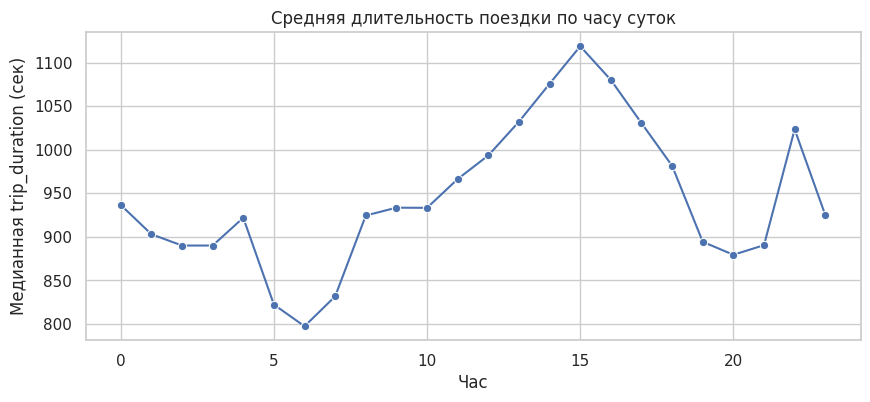

In [88]:
plt.figure(figsize=(10, 4))
sns.lineplot(data=hour_duration, x="pickup_hour", y=target, marker="o")
plt.title("Средняя длительность поездки по часу суток")
plt.xlabel("Час")
plt.ylabel("Медианная trip_duration (сек)")
plt.show()

### Распределение поездок по дням недели

In [89]:
day_of_week_duration = train.groupby('pickup_day_of_week')[target].mean().reset_index().sort_values('pickup_day_of_week')

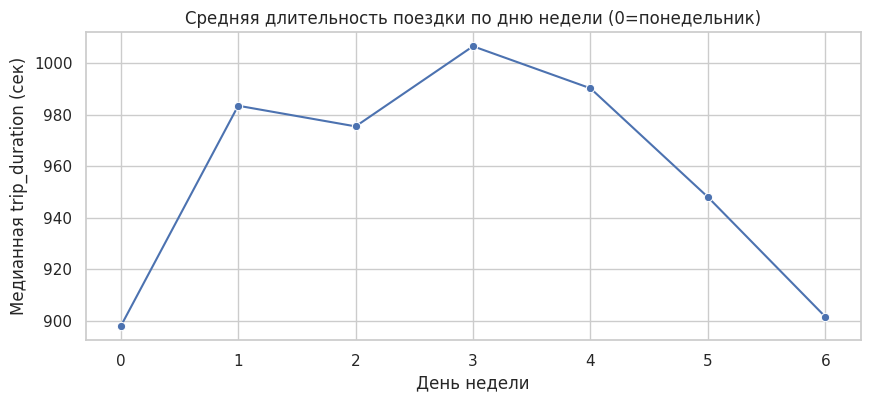

In [90]:
plt.figure(figsize=(10, 4))
sns.lineplot(data=day_of_week_duration, x="pickup_day_of_week", y=target, marker="o")
plt.title("Средняя длительность поездки по дню недели (0=понедельник)")
plt.xlabel("День недели")
plt.ylabel("Медианная trip_duration (сек)")
plt.show()

## Георграфические признаки

### Приведём к нормальному виду

In [91]:
def haversine(lon1, lat1, lon2, lat2):
    R = 6371
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat / 2.0) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2.0) ** 2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c

In [92]:
train['distance_km'] = haversine(train["pickup_longitude"], train["pickup_latitude"], train["dropoff_longitude"], train["dropoff_latitude"])

### Посмоторим на распредеение расстояний поездок

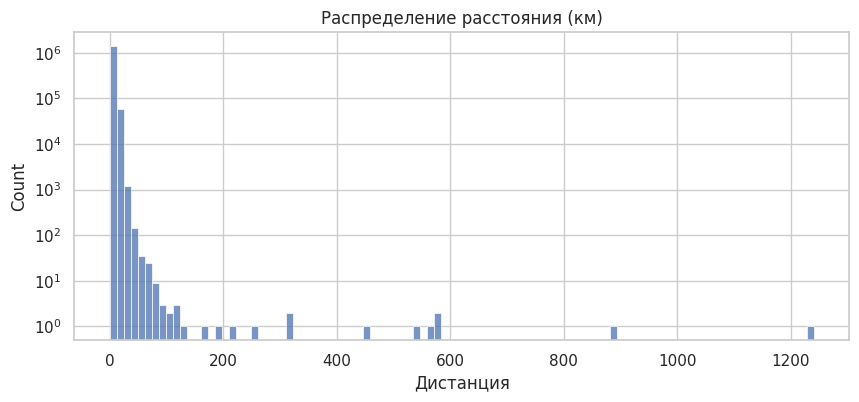

In [93]:
plt.figure(figsize=(10, 4))
sns.histplot(train["distance_km"], bins=100, kde=False)
plt.title("Распределение расстояния (км)")
plt.xlabel("Дистанция")
plt.yscale("log")
plt.show()

In [94]:
train["distance_km"].describe()

count    1.458644e+06
mean     3.440864e+00
std      4.296538e+00
min      0.000000e+00
25%      1.231837e+00
50%      2.093717e+00
75%      3.875337e+00
max      1.240909e+03
Name: distance_km, dtype: float64

## Проче признаки

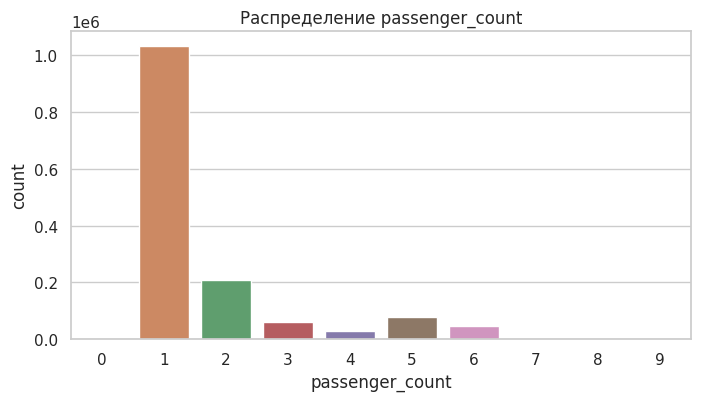

In [95]:
plt.figure(figsize=(8, 4))
sns.countplot(data=train, x="passenger_count")
plt.title("Распределение passenger_count")
plt.show()

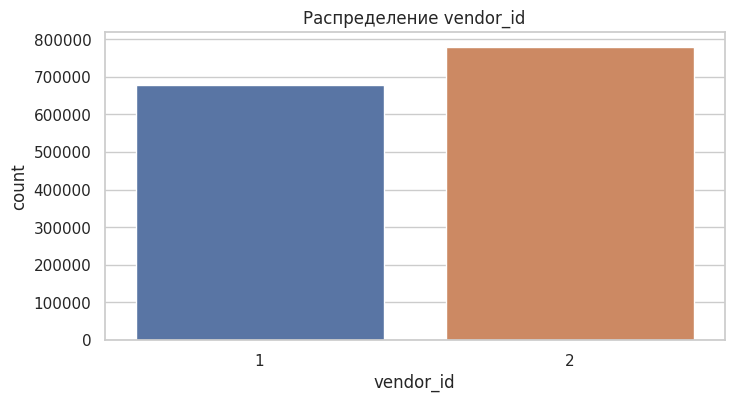

In [96]:
plt.figure(figsize=(8, 4))
sns.countplot(data=train, x="vendor_id")
plt.title("Распределение vendor_id")
plt.show()

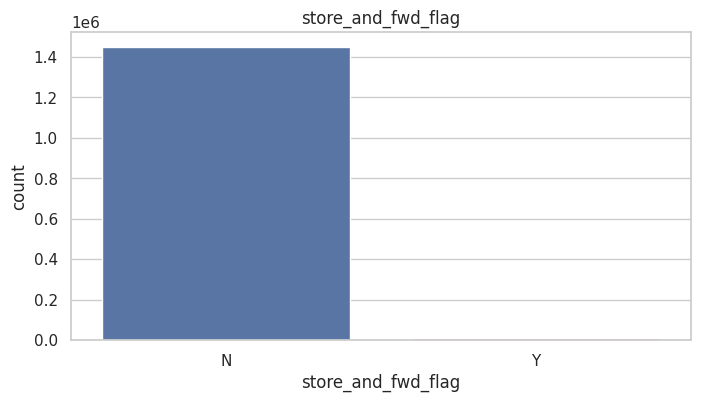

In [97]:
plt.figure(figsize=(8, 4))
sns.countplot(data=train, x="store_and_fwd_flag")
plt.title("store_and_fwd_flag")
plt.show()

In [98]:
train['store_and_fwd_flag'] = (train['store_and_fwd_flag'] == 'N').astype(int)


# Подготовка данных

## Очистка выбросов

In [99]:
clean_train = train.copy()

In [100]:
clean_train = clean_train[
    (clean_train[target] >= 1) & (clean_train[target] <= 86400)
]

In [101]:
clean_train = clean_train[
    (clean_train["distance_km"] > 0) & (clean_train["distance_km"] <= 200)
]

In [102]:
clean_train

id  vendor_id  passenger_count  pickup_longitude  \
0        id2875421          2                1        -73.982155   
1        id2377394          1                1        -73.980415   
2        id3858529          2                1        -73.979027   
3        id3504673          2                1        -74.010040   
4        id2181028          2                1        -73.973053   
...            ...        ...              ...               ...   
1458639  id2376096          2                4        -73.982201   
1458640  id1049543          1                1        -74.000946   
1458641  id2304944          2                1        -73.959129   
1458642  id2714485          1                1        -73.982079   
1458643  id1209952          1                1        -73.979538   

         pickup_latitude  dropoff_longitude  dropoff_latitude  \
0              40.767937         -73.964630         40.765602   
1              40.738564         -73.999481         40.731152   
2              40.763939         -74.005333         40.710087   
3              40.719971         -74.012268         40.706718   
4              40.793209         -73.972923         40.782520   
...                  ...                ...               ...   
1458639        40.745522         -73.994911         40.740170   
1458640        40.747379         -73.970184         40.796547   
1458641        40.768799         -74.004433         40.707371   
1458642        40.749062         -73.974632         40.757107   
1458643        40.781750         -73.972809         40.790585   

         store_and_fwd_flag  trip_duration  log_trip_duration  pickup_hour  \
0                         1            455           6.122493           17   
1                         1            663           6.498282            0   
2                         1           2124           7.661527           11   
3                         1            429           6.063785           19   
4                         1            435           6.077642           13   
...                     ...            ...                ...          ...   
1458639                   1            778           6.658011           13   
1458640                   1            655           6.486161            7   
1458641                   1            764           6.639876            6   
1458642                   1            373           5.924256           15   
1458643                   1            198           5.293305           14   

         pickup_minute  pickup_day_of_week  pickup_month  is_weekend  \
0                   24                   0             3           0   
1                   43                   6             6           1   
2                   35                   1             1           0   
3                   32                   2             4           0   
4                   30                   5             3           1   
...                ...                 ...           ...         ...   
1458639             31                   4             4           0   
1458640             35                   6             1           1   
1458641             57                   4             4           0   
1458642             56                   1             1           0   
1458643             44                   1             4           0   

         dropoff_hour  dropoff_minute  distance_km  
0                  17              32     1.498521  
1                   0              54     1.805507  
2                  12              10     6.385098  
3                  19              39     1.485498  
4                  13              38     1.188588  
...               ...             ...          ...  
1458639            13              44     1.225080  
1458640             7              46     6.049836  
1458641             7              10     7.824606  
1458642            16               2     1.092564  
1458643            14            

In [103]:
clean_train["log_trip_duration"] = np.log1p(clean_train[target])

In [104]:
clean_train = clean_train.drop(columns=['id', target])

# Разделение данных

In [105]:
X, y = clean_train.drop(columns=['log_trip_duration'], axis=1), clean_train['log_trip_duration']

In [106]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42)

In [107]:
X_train

vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
98247            2                1        -73.991959        40.756989   
1391585          2                2        -73.953293        40.771778   
36924            1                1        -74.001572        40.730900   
942484           2                1        -74.015137        40.709751   
579173           2                5        -73.977303        40.754379   
...            ...              ...               ...              ...   
260232           1                1        -73.951546        40.773685   
1420179          1                1        -74.004204        40.742310   
132467           1                1        -73.979675        40.764988   
673937           2                1        -73.971634        40.762917   
122455           2                1        -73.986740        40.722252   

         dropoff_longitude  dropoff_latitude  store_and_fwd_flag  pickup_hour  \
98247           -73.981987         40.762211                   1           16   
1391585         -73.992172         40.690151                   1           23   
36924           -74.006470         40.720448                   1           19   
942484          -73.994507         40.740978                   1           22   
579173          -73.976143         40.760681                   1            7   
...                    ...               ...                 ...          ...   
260232          -73.951843         40.781689                   1           17   
1420179         -74.011734         40.713848                   1            0   
132467          -73.991119         40.774853                   1           19   
673937          -73.998924         40.761158                   1            1   
122455          -73.987190         40.756302                   1            0   

         pickup_minute  pickup_day_of_week  pickup_month  is_weekend  \
98247               50                   5             4           1   
1391585             12                   6             2           1   
36924               37                   5             2           1   
942484              47                   6             5           1   
579173              19                   4             6           0   
...                ...                 ...           ...         ...   
260232              33                   4             1           0   
1420179              8                   5             3           1   
132467              49                   0             4           0   
673937              56                   6             3           1   
122455              14                   4             1           0   

         dropoff_hour  dropoff_minute  distance_km  
98247              17               3     1.021066  
1391585            23              51     9.649621  
36924              19              47     1.233355  
942484             22              59     3.883176  
579173              7              21     0.707512  
...               ...             ...          ...  
260232             17              36     0.890272  
1420179             0              23     3.227755  
132467             19              55     1.460138  
673937              3               9     2.306754  
122455              0              28     3.786376  

[1089549 rows x 15 columns]

# Бэйслайн модель

In [108]:
model = LinearRegression()

In [109]:
model.fit(X_train, y_train)

LinearRegression()

In [110]:
y_pred = model.predict(X_val)

# Бейслайн RMSLE: 0.08636489879951907

In [111]:
print(f'Бейслайн RMSLE: {np.sqrt(mean_squared_log_error(y_true=y_val, y_pred=y_pred))}')

Бейслайн RMSLE: 0.08636489879951909


# Блок 2

## Кодировка Traget Encoding

In [112]:
import category_encoders as ce

In [113]:
clean_train

vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
0                2                1        -73.982155        40.767937   
1                1                1        -73.980415        40.738564   
2                2                1        -73.979027        40.763939   
3                2                1        -74.010040        40.719971   
4                2                1        -73.973053        40.793209   
...            ...              ...               ...              ...   
1458639          2                4        -73.982201        40.745522   
1458640          1                1        -74.000946        40.747379   
1458641          2                1        -73.959129        40.768799   
1458642          1                1        -73.982079        40.749062   
1458643          1                1        -73.979538        40.781750   

         dropoff_longitude  dropoff_latitude  store_and_fwd_flag  \
0               -73.964630         40.765602                   1   
1               -73.999481         40.731152                   1   
2               -74.005333         40.710087                   1   
3               -74.012268         40.706718                   1   
4               -73.972923         40.782520                   1   
...                    ...               ...                 ...   
1458639         -73.994911         40.740170                   1   
1458640         -73.970184         40.796547                   1   
1458641         -74.004433         40.707371                   1   
1458642         -73.974632         40.757107                   1   
1458643         -73.972809         40.790585                   1   

         log_trip_duration  pickup_hour  pickup_minute  pickup_day_of_week  \
0                 6.122493           17             24                   0   
1                 6.498282            0             43                   6   
2                 7.661527           11             35                   1   
3                 6.063785           19             32                   2   
4                 6.077642           13             30                   5   
...                    ...          ...            ...                 ...   
1458639           6.658011           13             31                   4   
1458640           6.486161            7             35                   6   
1458641           6.639876            6             57                   4   
1458642           5.924256           15             56                   1   
1458643           5.293305           14             44                   1   

         pickup_month  is_weekend  dropoff_hour  dropoff_minute  distance_km  
0                   3           0            17              32     1.498521  
1                   6           1             0              54     1.805507  
2                   1           0            12              10     6.385098  
3                   4           0            19              39     1.485498  
4                   3           1            13              38     1.188588  
...               ...         ...           ...             ...          ...  
1458639             4           0            13              44     1.225080  
1458640             1           1             7              46     6.049836  
1458641             4           0             7              10     7.824606  
1458642             1           0            16               2     1.092564  
1458643             4           0            14              47     1.134042  

[1452732 rows x 16 columns]

In [114]:
X = clean_train[['store_and_fwd_flag']]
y = clean_train['log_trip_duration']

In [115]:
encoder = ce.TargetEncoder(cols=['store_and_fwd_flag'])

In [116]:
X_encoded = encoder.fit_transform(X, y)

In [117]:
clean_train_encoded = clean_train.copy()

In [118]:
clean_train_encoded['store_and_fwd_flag'] = X_encoded['store_and_fwd_flag']

In [119]:
clean_train_encoded

vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
0                2                1        -73.982155        40.767937   
1                1                1        -73.980415        40.738564   
2                2                1        -73.979027        40.763939   
3                2                1        -74.010040        40.719971   
4                2                1        -73.973053        40.793209   
...            ...              ...               ...              ...   
1458639          2                4        -73.982201        40.745522   
1458640          1                1        -74.000946        40.747379   
1458641          2                1        -73.959129        40.768799   
1458642          1                1        -73.982079        40.749062   
1458643          1                1        -73.979538        40.781750   

         dropoff_longitude  dropoff_latitude  store_and_fwd_flag  \
0               -73.964630         40.765602            6.471089   
1               -73.999481         40.731152            6.471089   
2               -74.005333         40.710087            6.471089   
3               -74.012268         40.706718            6.471089   
4               -73.972923         40.782520            6.471089   
...                    ...               ...                 ...   
1458639         -73.994911         40.740170            6.471089   
1458640         -73.970184         40.796547            6.471089   
1458641         -74.004433         40.707371            6.471089   
1458642         -73.974632         40.757107            6.471089   
1458643         -73.972809         40.790585            6.471089   

         log_trip_duration  pickup_hour  pickup_minute  pickup_day_of_week  \
0                 6.122493           17             24                   0   
1                 6.498282            0             43                   6   
2                 7.661527           11             35                   1   
3                 6.063785           19             32                   2   
4                 6.077642           13             30                   5   
...                    ...          ...            ...                 ...   
1458639           6.658011           13             31                   4   
1458640           6.486161            7             35                   6   
1458641           6.639876            6             57                   4   
1458642           5.924256           15             56                   1   
1458643           5.293305           14             44                   1   

         pickup_month  is_weekend  dropoff_hour  dropoff_minute  distance_km  
0                   3           0            17              32     1.498521  
1                   6           1             0              54     1.805507  
2                   1           0            12              10     6.385098  
3                   4           0            19              39     1.485498  
4                   3           1            13              38     1.188588  
...               ...         ...           ...             ...          ...  
1458639             4           0            13              44     1.225080  
1458640             1           1             7              46     6.049836  
1458641             4           0             7              10     7.824606  
1458642             1           0            16               2     1.092564  
1458643             4           0            14              47     1.134042  

[1452732 rows x 16 columns]

## Признаки, основанные на ближайших соседях

### Функция ищет сколько раз такси приезжало в разные зоны, зоны разбиваются по координатам с точностью до 3-х знаков после запятой(Другую идею где сложность не \$n^2$ я не придумал)

### Создаим фичу - которая будет отрадать уровень популярности места высадки, то есть куа чаще всего заказывают такси

In [120]:
def zone_popular(q1, q2, q3, count):
    if count >= q3:
        return 'very_popular'
    elif count >= q2:
        return 'popular'
    elif count >= q1:
        return 'medium_popular'
    else:
        return 'not_popular'

In [121]:
def find_popular_zones(df, lat_col='latitude', lon_col='longitude', precision=3):
    result_df = df.copy()
    
    result_df['lat_zone'] = result_df[lat_col].round(precision)
    result_df['lon_zone'] = result_df[lon_col].round(precision)
    result_df['zone_id'] = result_df['lat_zone'].astype(str) + '_' + result_df['lon_zone'].astype(str)
    
    zone_stats = result_df.groupby('zone_id').size().reset_index(name='zone_visit_count')

    q1 = zone_stats['zone_visit_count'].quantile(0.75)
    q2 = zone_stats['zone_visit_count'].quantile(0.9)
    q3 = zone_stats['zone_visit_count'].quantile(0.95)

    print(f"Квантили: q75={q1}, q90={q2}, q95={q3}")

    zone_stats['popular_lavel'] = zone_stats['zone_visit_count'].apply(lambda x: zone_popular(q1=q1, q2=q2, q3=q3, count=x))

    result_df = result_df.merge(zone_stats[['zone_id', 'zone_visit_count', 'popular_lavel']], on='zone_id', how='left')

    
    result_df = result_df.drop(['lat_zone', 'lon_zone', 'zone_id', 'zone_visit_count'], axis=1)
    
    return result_df

In [122]:
result_df = find_popular_zones(df=clean_train_encoded, lat_col='dropoff_latitude', lon_col='dropoff_longitude')

Квантили: q75=10.0, q90=84.0, q95=305.0


In [123]:
result_df

vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
0                2                1        -73.982155        40.767937   
1                1                1        -73.980415        40.738564   
2                2                1        -73.979027        40.763939   
3                2                1        -74.010040        40.719971   
4                2                1        -73.973053        40.793209   
...            ...              ...               ...              ...   
1452727          2                4        -73.982201        40.745522   
1452728          1                1        -74.000946        40.747379   
1452729          2                1        -73.959129        40.768799   
1452730          1                1        -73.982079        40.749062   
1452731          1                1        -73.979538        40.781750   

         dropoff_longitude  dropoff_latitude  store_and_fwd_flag  \
0               -73.964630         40.765602            6.471089   
1               -73.999481         40.731152            6.471089   
2               -74.005333         40.710087            6.471089   
3               -74.012268         40.706718            6.471089   
4               -73.972923         40.782520            6.471089   
...                    ...               ...                 ...   
1452727         -73.994911         40.740170            6.471089   
1452728         -73.970184         40.796547            6.471089   
1452729         -74.004433         40.707371            6.471089   
1452730         -73.974632         40.757107            6.471089   
1452731         -73.972809         40.790585            6.471089   

         log_trip_duration  pickup_hour  pickup_minute  pickup_day_of_week  \
0                 6.122493           17             24                   0   
1                 6.498282            0             43                   6   
2                 7.661527           11             35                   1   
3                 6.063785           19             32                   2   
4                 6.077642           13             30                   5   
...                    ...          ...            ...                 ...   
1452727           6.658011           13             31                   4   
1452728           6.486161            7             35                   6   
1452729           6.639876            6             57                   4   
1452730           5.924256           15             56                   1   
1452731           5.293305           14             44                   1   

         pickup_month  is_weekend  dropoff_hour  dropoff_minute  distance_km  \
0                   3           0            17              32     1.498521   
1                   6           1             0              54     1.805507   
2                   1           0            12              10     6.385098   
3                   4           0            19              39     1.485498   
4                   3           1            13              38     1.188588   
...               ...         ...           ...             ...          ...   
1452727             4           0            13              44     1.225080   
1452728             1           1             7              46     6.049836   
1452729             4           0             7              10     7.824606   
1452730             1           0            16               2     1.092564   
1452731             4           0            14              47     1.134042   

        popular_lavel  
0        very_popular  
1             popular  
2             popular  
3        very_popular  
4             popular  
...               ...  
1452727  very_popular  
1452728  very_popular  
1452729  very_popular  
1452730  very_popular  
1452731  very_popular  

[1452732 rows x 17 columns]

### Вторая фича - это trip_duration была сдела на прошлой неделе в блоке EDA

## Обработка временных признаков

### уже есть в блоке временная фича, там добавили проверку есть ли в списке праздников США, через библиотеку pandas.tseries.holiday

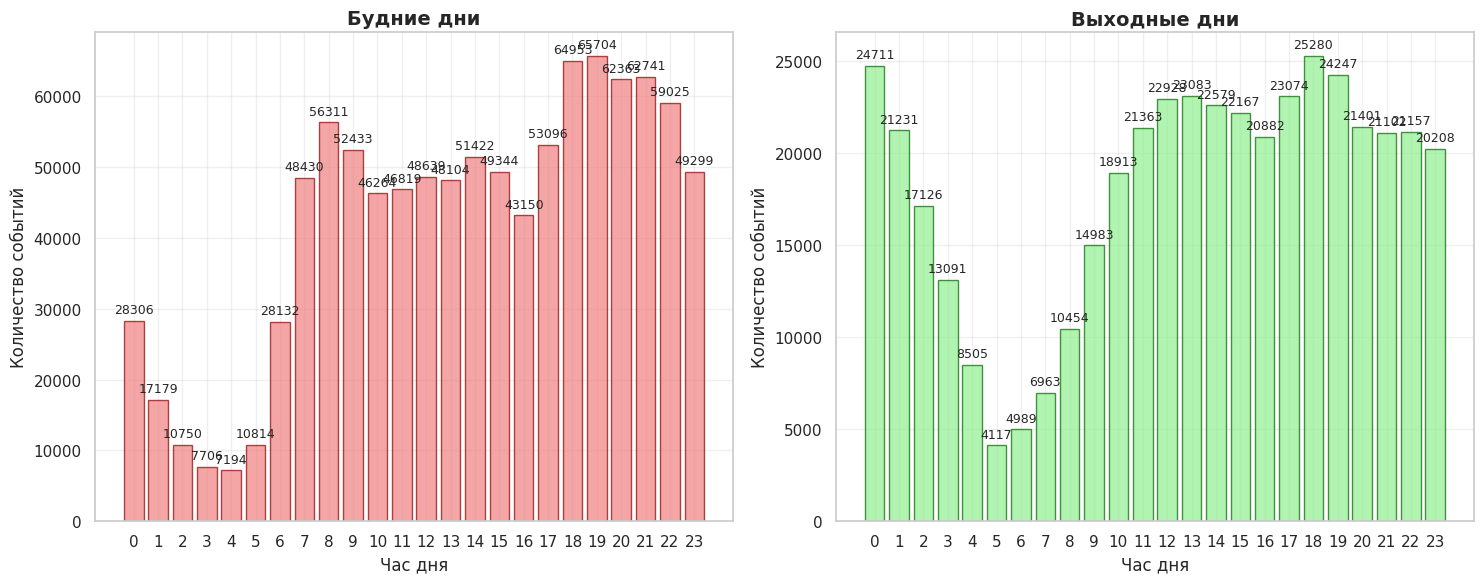

In [124]:
plt.figure(figsize=(15, 6))

weekend_hours = result_df[result_df['is_weekend'] == 1]['pickup_hour'].value_counts().sort_index()
weekday_hours = result_df[result_df['is_weekend'] == 0]['pickup_hour'].value_counts().sort_index()

plt.subplot(1, 2, 1)
plt.bar(weekday_hours.index, weekday_hours.values, color='lightcoral', alpha=0.7, edgecolor='darkred')
plt.xlabel('Час дня', fontsize=12)
plt.ylabel('Количество событий', fontsize=12)
plt.title('Будние дни', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(range(0, 24))

for i, count in enumerate(weekday_hours.values):
    plt.text(weekday_hours.index[i], count + max(weekday_hours.values)*0.01, 
             str(count), ha='center', va='bottom', fontsize=9)


plt.subplot(1, 2, 2)
plt.bar(weekend_hours.index, weekend_hours.values, color='lightgreen', alpha=0.7, edgecolor='darkgreen')
plt.xlabel('Час дня', fontsize=12)
plt.ylabel('Количество событий', fontsize=12)
plt.title('Выходные дни', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(range(0, 24))

for i, count in enumerate(weekend_hours.values):
    plt.text(weekend_hours.index[i], count + max(weekend_hours.values)*0.01, 
             str(count), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

In [125]:
result_df['is_peak_hour'] = (
    (result_df['is_weekend'] == 1) & (result_df['pickup_hour'].isin([0, 16, 17, 18])) |
    (result_df['is_weekend'] == 0) & (result_df['pickup_hour'].isin([18, 19, 20, 21]))
).astype(int)

In [126]:
result_df

vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
0                2                1        -73.982155        40.767937   
1                1                1        -73.980415        40.738564   
2                2                1        -73.979027        40.763939   
3                2                1        -74.010040        40.719971   
4                2                1        -73.973053        40.793209   
...            ...              ...               ...              ...   
1452727          2                4        -73.982201        40.745522   
1452728          1                1        -74.000946        40.747379   
1452729          2                1        -73.959129        40.768799   
1452730          1                1        -73.982079        40.749062   
1452731          1                1        -73.979538        40.781750   

         dropoff_longitude  dropoff_latitude  store_and_fwd_flag  \
0               -73.964630         40.765602            6.471089   
1               -73.999481         40.731152            6.471089   
2               -74.005333         40.710087            6.471089   
3               -74.012268         40.706718            6.471089   
4               -73.972923         40.782520            6.471089   
...                    ...               ...                 ...   
1452727         -73.994911         40.740170            6.471089   
1452728         -73.970184         40.796547            6.471089   
1452729         -74.004433         40.707371            6.471089   
1452730         -73.974632         40.757107            6.471089   
1452731         -73.972809         40.790585            6.471089   

         log_trip_duration  pickup_hour  pickup_minute  pickup_day_of_week  \
0                 6.122493           17             24                   0   
1                 6.498282            0             43                   6   
2                 7.661527           11             35                   1   
3                 6.063785           19             32                   2   
4                 6.077642           13             30                   5   
...                    ...          ...            ...                 ...   
1452727           6.658011           13             31                   4   
1452728           6.486161            7             35                   6   
1452729           6.639876            6             57                   4   
1452730           5.924256           15             56                   1   
1452731           5.293305           14             44                   1   

         pickup_month  is_weekend  dropoff_hour  dropoff_minute  distance_km  \
0                   3           0            17              32     1.498521   
1                   6           1             0              54     1.805507   
2                   1           0            12              10     6.385098   
3                   4           0            19              39     1.485498   
4                   3           1            13              38     1.188588   
...               ...         ...           ...             ...          ...   
1452727             4           0            13              44     1.225080   
1452728             1           1             7              46     6.049836   
1452729             4           0             7              10     7.824606   
1452730             1           0            16               2     1.092564   
1452731             4           0            14              47     1.134042   

        popular_lavel  is_peak_hour  
0        very_popular             0  
1             popular             1  
2             popular             0  
3        very_popular             1  
4             popular             0  
...               ...           ...  
1452727  very_popular             0  
1452728  very_popular             0  
1452729  very_popular             0  
1452730  very_popular    

## Создание контектных признаков

### Манхэттенское расстояние с коррекцией на географическую широту

In [127]:
lon_diff = result_df['dropoff_longitude'] - result_df['pickup_longitude']
lat_diff = result_df['dropoff_latitude'] - result_df['pickup_latitude']

In [128]:
avg_latitude_rad = np.radians((result_df['pickup_latitude'] + result_df['dropoff_latitude']) / 2)

In [129]:
result_df['manhattan_distance_km'] = (np.abs(lat_diff) * 111.0 + np.abs(lon_diff) * 111.0 * np.cos(avg_latitude_rad))

In [130]:
result_df['route_straightness_ratio'] = (result_df['manhattan_distance_km'] / result_df['distance_km'].clip(lower=0.1))

### Пассажиро-киломатры

In [131]:
result_df['passenger_km_sqrt'] = np.sqrt(result_df['passenger_count']) * result_df['distance_km']

In [132]:
result_df

vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
0                2                1        -73.982155        40.767937   
1                1                1        -73.980415        40.738564   
2                2                1        -73.979027        40.763939   
3                2                1        -74.010040        40.719971   
4                2                1        -73.973053        40.793209   
...            ...              ...               ...              ...   
1452727          2                4        -73.982201        40.745522   
1452728          1                1        -74.000946        40.747379   
1452729          2                1        -73.959129        40.768799   
1452730          1                1        -73.982079        40.749062   
1452731          1                1        -73.979538        40.781750   

         dropoff_longitude  dropoff_latitude  store_and_fwd_flag  \
0               -73.964630         40.765602            6.471089   
1               -73.999481         40.731152            6.471089   
2               -74.005333         40.710087            6.471089   
3               -74.012268         40.706718            6.471089   
4               -73.972923         40.782520            6.471089   
...                    ...               ...                 ...   
1452727         -73.994911         40.740170            6.471089   
1452728         -73.970184         40.796547            6.471089   
1452729         -74.004433         40.707371            6.471089   
1452730         -73.974632         40.757107            6.471089   
1452731         -73.972809         40.790585            6.471089   

         log_trip_duration  pickup_hour  pickup_minute  ...  pickup_month  \
0                 6.122493           17             24  ...             3   
1                 6.498282            0             43  ...             6   
2                 7.661527           11             35  ...             1   
3                 6.063785           19             32  ...             4   
4                 6.077642           13             30  ...             3   
...                    ...          ...            ...  ...           ...   
1452727           6.658011           13             31  ...             4   
1452728           6.486161            7             35  ...             1   
1452729           6.639876            6             57  ...             4   
1452730           5.924256           15             56  ...             1   
1452731           5.293305           14             44  ...             4   

         is_weekend  dropoff_hour  dropoff_minute  distance_km  popular_lavel  \
0                 0            17              32     1.498521   very_popular   
1                 1             0              54     1.805507        popular   
2                 0            12              10     6.385098        popular   
3                 0            19              39     1.485498   very_popular   
4                 1            13              38     1.188588        popular   
...             ...           ...             ...          ...            ...   
1452727           0            13              44     1.225080   very_popular   
1452728           1             7              46     6.049836   very_popular   
1452729           0             7              10     7.824606   very_popular   
1452730           0            16               2     1.092564   very_popular   
1452731           0            14              47     1.134042   very_popular   

        is_peak_hour  manhattan_distance_km  route_straightness_ratio  \
0                  0               1.732417                  1.156085   
1                  1               2.426335                  1.343852   
2                  0               8.190090                  1.282688   
3                  1               1.658438                  1.116418   
4                  0               1.197

In [133]:
set(result_df.columns)

{'distance_km',
 'dropoff_hour',
 'dropoff_latitude',
 'dropoff_longitude',
 'dropoff_minute',
 'is_peak_hour',
 'is_weekend',
 'log_trip_duration',
 'manhattan_distance_km',
 'passenger_count',
 'passenger_km_sqrt',
 'pickup_day_of_week',
 'pickup_hour',
 'pickup_latitude',
 'pickup_longitude',
 'pickup_minute',
 'pickup_month',
 'popular_lavel',
 'route_straightness_ratio',
 'store_and_fwd_flag',
 'vendor_id'}

# Отбор признаков

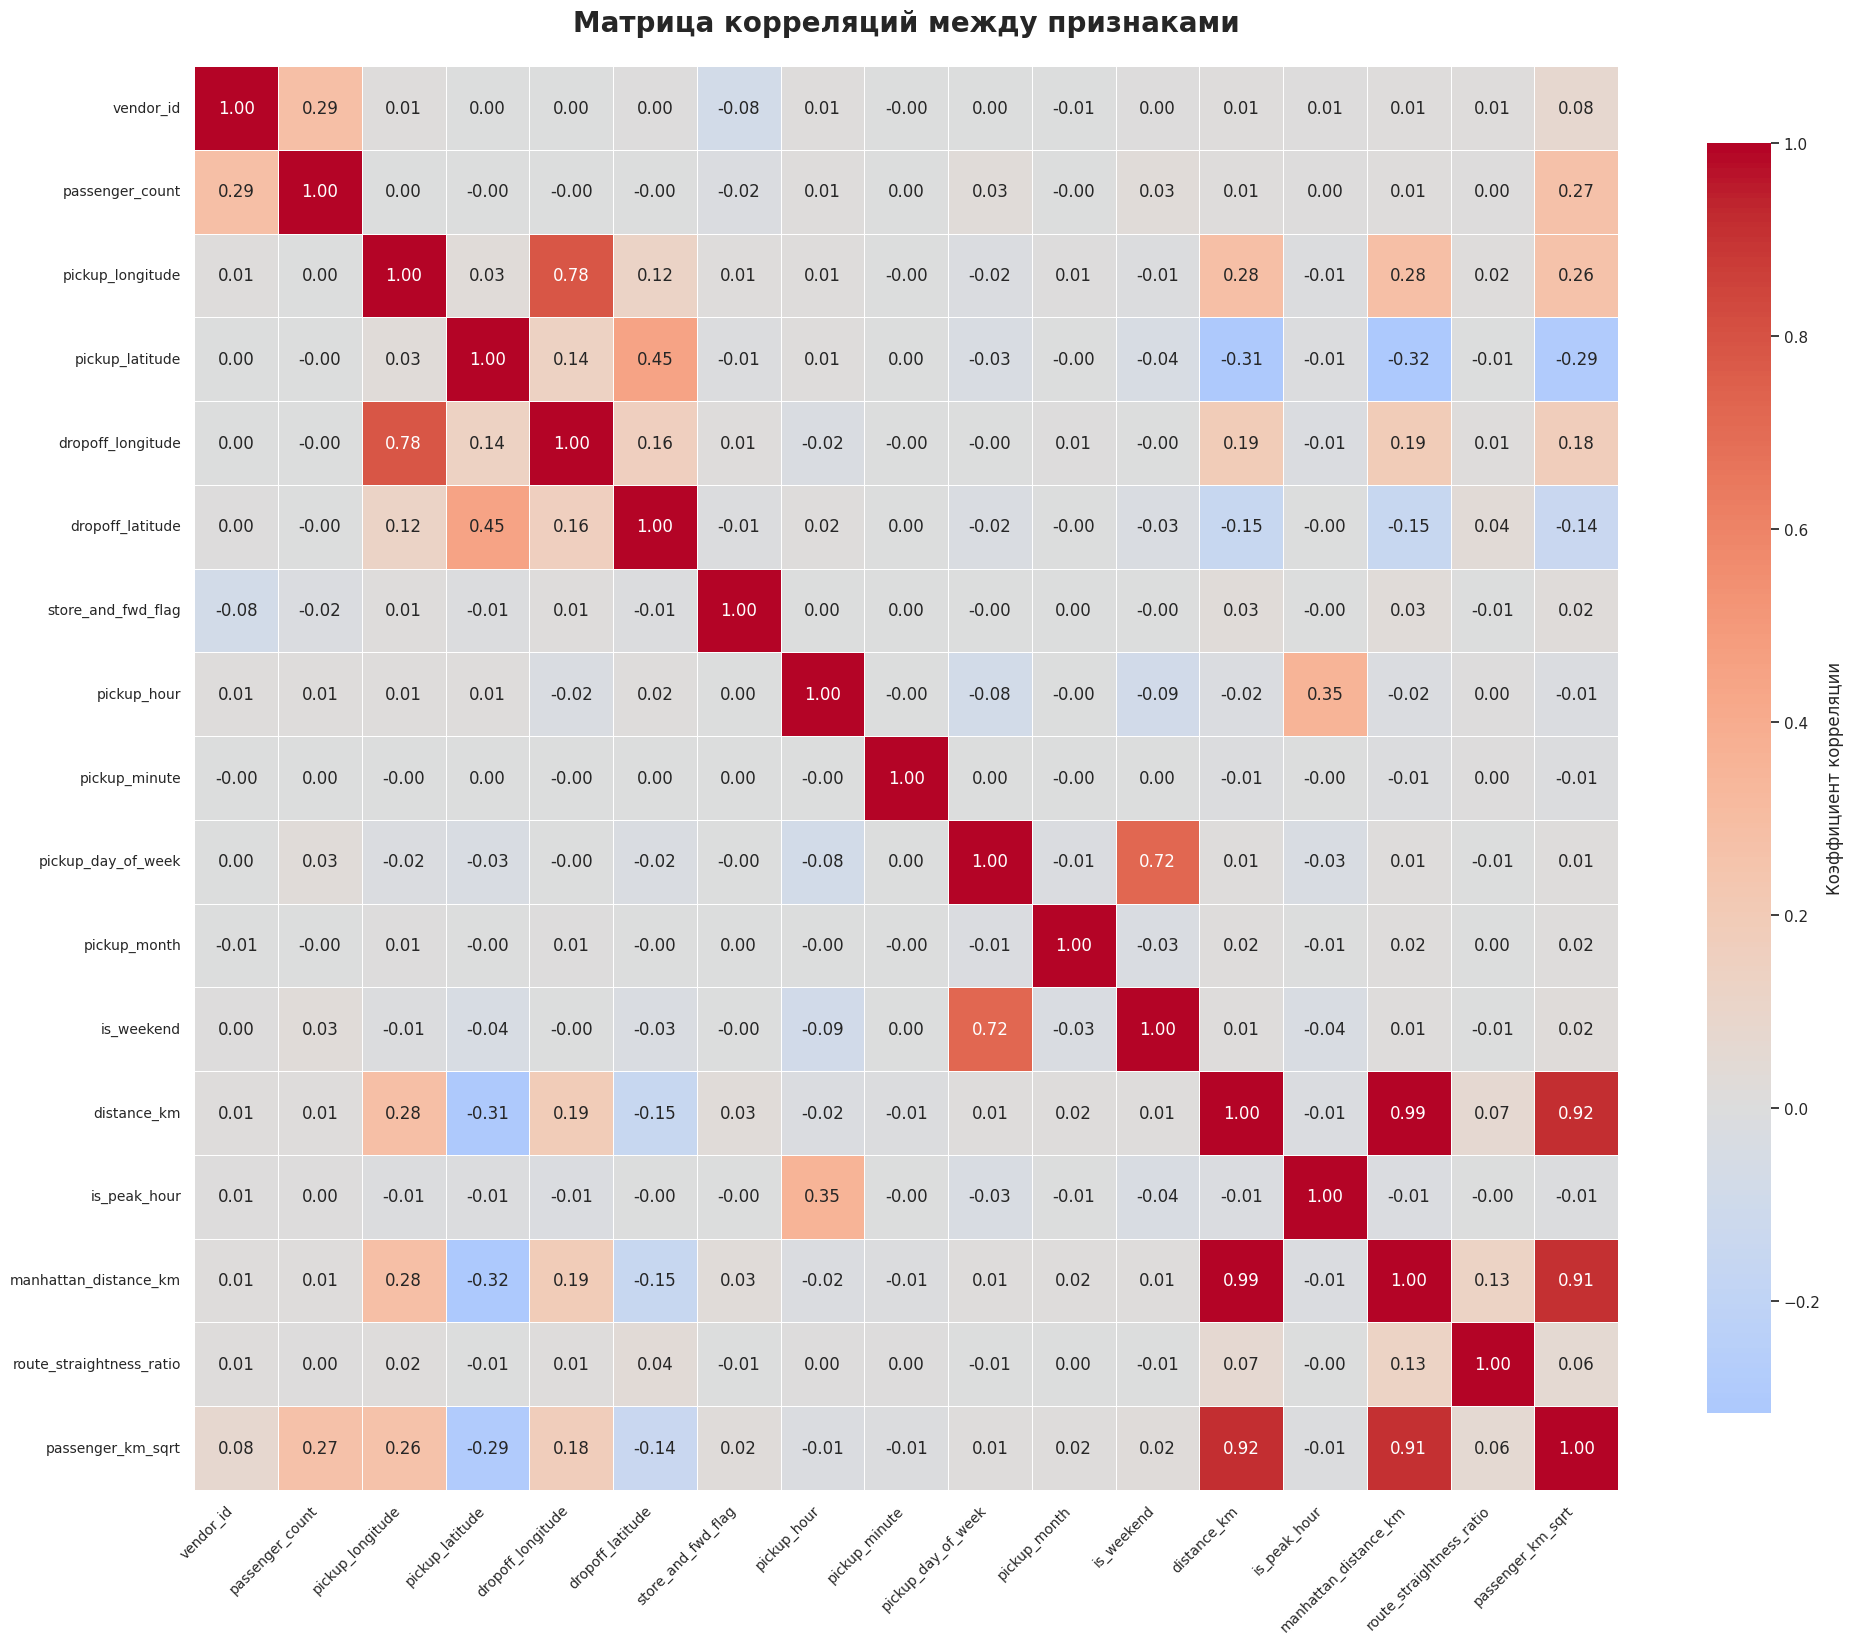

КОРРЕЛЯЦИИ С ЦЕЛЕВОЙ ПЕРЕМЕННОЙ (log_trip_duration)

Топ-10 признаков по корреляции с log_trip_duration:
 1. distance_km              :   0.628
 2. manhattan_distance_km    :   0.613
 3. passenger_km_sqrt        :   0.575
 4. pickup_latitude          :  -0.171
 5. dropoff_latitude         :  -0.140
 6. pickup_longitude         :   0.120
 7. dropoff_longitude        :   0.080
 8. route_straightness_ratio :   0.079
 9. is_weekend               :  -0.060
10. pickup_month             :   0.048


In [134]:
target_cols = ['trip_duration', 'log_trip_duration', 'dropoff_minute', 'dropoff_hour']


numerical_cols = result_df.select_dtypes(include=[np.number]).columns.tolist()


features_for_corr = [col for col in numerical_cols if col not in target_cols]

plt.figure(figsize=(20, 18))

corr_matrix = result_df[features_for_corr].corr()

sns.heatmap(corr_matrix, 
            annot=True, 
            fmt='.2f', 
            cmap='coolwarm',
            center=0,
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": 0.75, "label": "Коэффициент корреляции"})

plt.title('Матрица корреляций между признаками', fontsize=20, fontweight='bold', pad=25)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()



print("КОРРЕЛЯЦИИ С ЦЕЛЕВОЙ ПЕРЕМЕННОЙ (log_trip_duration)")


if 'log_trip_duration' in result_df.columns:
    correlations_with_target = {}
    for feature in features_for_corr:
        if feature in result_df.columns and 'log_trip_duration' in result_df.columns:
            corr = result_df[feature].corr(result_df['log_trip_duration'])
            correlations_with_target[feature] = corr
    
    sorted_correlations = sorted(correlations_with_target.items(), 
                                key=lambda x: abs(x[1]), 
                                reverse=True)
    
    print("\nТоп-10 признаков по корреляции с log_trip_duration:")
    for i, (feature, corr) in enumerate(sorted_correlations[:10], 1):
        print(f"{i:2d}. {feature:25}: {corr:7.3f}")

In [135]:
features_to_drop = [
    'manhattan_distance_km',      # 99% корреляция с distance_km
    'passenger_km_sqrt',          # 92% корреляция с distance_km
    'vendor_id',                  # Низкая информативность
]

In [136]:
result_df_clean = result_df.drop(columns=features_to_drop)

# Обработка аномалий

## Статистические методы

In [137]:
sns.set(style="whitegrid", context="notebook")

num_cols = ["log_trip_duration", "distance_km", "passenger_count"]

In [138]:
from scipy import stats

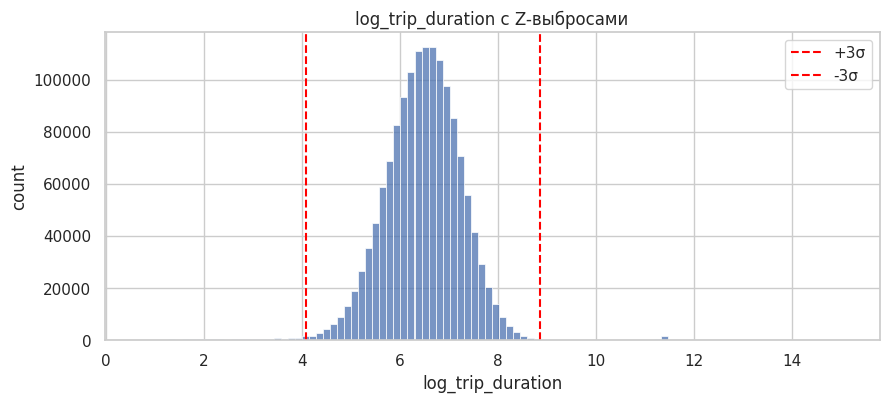

In [139]:
z_scores = np.abs(stats.zscore(train[num_cols]))
z_thresh = 3.0

for i, col in enumerate(num_cols):
    train[f"is_z_outlier_{col}"] = (z_scores[:, i] > z_thresh).astype(int)

train[[c for c in train.columns if c.startswith("is_z_outlier_")]].mean()

plt.figure(figsize=(10, 4))
sns.histplot(train["log_trip_duration"], bins=100, kde=False)
plt.title("log_trip_duration с Z-выбросами")
plt.xlabel("log_trip_duration")
plt.ylabel("count")

mu = train["log_trip_duration"].mean()
sigma = train["log_trip_duration"].std()
plt.axvline(mu + z_thresh * sigma, color="red", linestyle="--", label="+3σ")
plt.axvline(mu - z_thresh * sigma, color="red", linestyle="--", label="-3σ")
plt.legend()
plt.show()


log_trip_duration: IQR=[5.986, 6.981], low=4.495, high=8.473, доля выбросов=0.0133
distance_km: IQR=[1.232, 3.875], low=-2.733, high=7.841, доля выбросов=0.0964


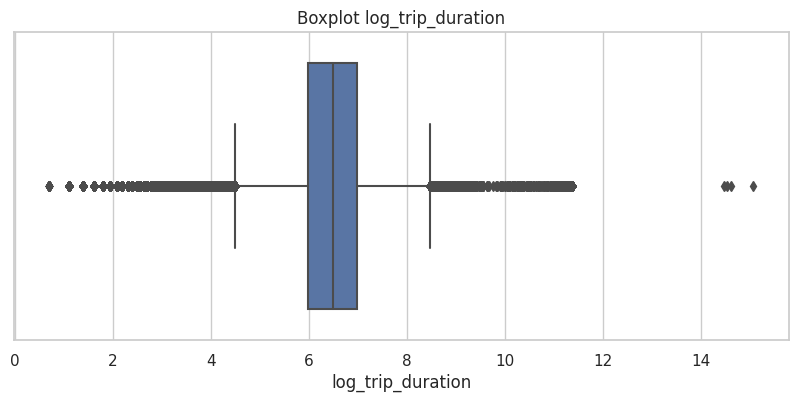

In [140]:
for col in ["log_trip_duration", "distance_km"]:
    q1 = train[col].quantile(0.25)
    q3 = train[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    train[f"is_iqr_outlier_{col}"] = (
        (train[col] < lower) | (train[col] > upper)
    ).astype(int)

    print(
        f"{col}: IQR=[{q1:.3f}, {q3:.3f}], "
        f"low={lower:.3f}, high={upper:.3f}, "
        f"доля выбросов={train[f'is_iqr_outlier_{col}'].mean():.4f}"
    )

plt.figure(figsize=(10, 4))
sns.boxplot(x=train["log_trip_duration"])
plt.title("Boxplot log_trip_duration")
plt.show()


In [141]:
from scipy.stats import t as student_t

In [142]:
def grubbs_outlier_mask(series, alpha=0.05):
    s = series.dropna().values
    n = s.size
    if n < 3:
        return pd.Series(False, index=series.index)

    mean = s.mean()
    std = s.std(ddof=1)
    abs_diff = np.abs(s - mean)
    idx_max = abs_diff.argmax()
    G = abs_diff[idx_max] / std

    t_crit = student_t.isf(alpha / (2 * n), n - 2)
    G_crit = ((n - 1) / np.sqrt(n)) * np.sqrt(t_crit**2 / (n - 2 + t_crit**2))

    mask_compact = np.zeros_like(s, dtype=bool)
    if G > G_crit:
        mask_compact[idx_max] = True

    mask_full = pd.Series(False, index=series.index)
    mask_full[series.dropna().index] = mask_compact
    return mask_full

sample = train["log_trip_duration"].sample(5000, random_state=42)
grubbs_mask_sample = grubbs_outlier_mask(sample, alpha=0.01)

train["is_grubbs_outlier_log_trip"] = False
train.loc[grubbs_mask_sample[grubbs_mask_sample].index, "is_grubbs_outlier_log_trip"] = True

train["is_grubbs_outlier_log_trip"].mean()

anomaly_flags_cols = [
    "is_z_outlier_log_trip_duration",
    "is_z_outlier_distance_km",
    "is_iqr_outlier_log_trip_duration",
    "is_iqr_outlier_distance_km",
    "is_grubbs_outlier_log_trip",
]

train["anomaly_methods_count"] = train[anomaly_flags_cols].sum(axis=1)

train["is_any_stat_outlier"] = (train["anomaly_methods_count"] > 0).astype(int)

train[anomaly_flags_cols + ["anomaly_methods_count", "is_any_stat_outlier"]].head()


is_z_outlier_log_trip_duration  is_z_outlier_distance_km  \
0                               0                         0   
1                               0                         0   
2                               0                         0   
3                               0                         0   
4                               0                         0   

   is_iqr_outlier_log_trip_duration  is_iqr_outlier_distance_km  \
0                                 0                           0   
1                                 0                           0   
2                                 0                           0   
3                                 0                           0   
4                                 0                           0   

   is_grubbs_outlier_log_trip anomaly_methods_count  is_any_stat_outlier  
0                       False                     0                    0  
1                       False                     0                    0  
2                       False                     0                    0  
3                       False                     0                    0  
4                       False                     0                    0

## Признаки на основе аномалий

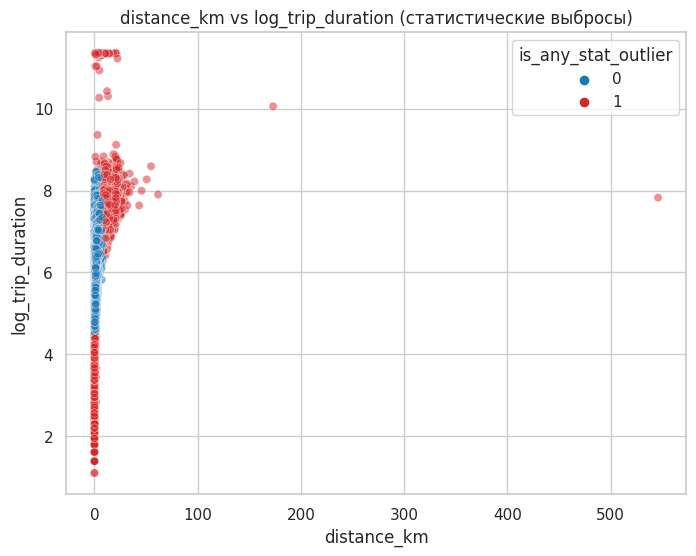

In [143]:
anomaly_flags_cols = [
    "is_z_outlier_log_trip_duration",
    "is_z_outlier_distance_km",
    "is_iqr_outlier_log_trip_duration",
    "is_iqr_outlier_distance_km",
    "is_grubbs_outlier_log_trip",
]

train["anomaly_methods_count"] = train[anomaly_flags_cols].sum(axis=1)

train["is_any_stat_outlier"] = (train["anomaly_methods_count"] > 0).astype(int)

train[anomaly_flags_cols + ["anomaly_methods_count", "is_any_stat_outlier"]].head()

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=train.sample(50000, random_state=42),
    x="distance_km",
    y="log_trip_duration",
    hue="is_any_stat_outlier",
    palette={0: "tab:blue", 1: "tab:red"},
    alpha=0.5,
)
plt.title("distance_km vs log_trip_duration (статистические выбросы)")
plt.show()


## ML методы

In [144]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

Isolation Forest vs IQR (log_trip_duration):
Precision: 0.094
Recall:    0.140
F1:        0.112
ROC-AUC:   0.917


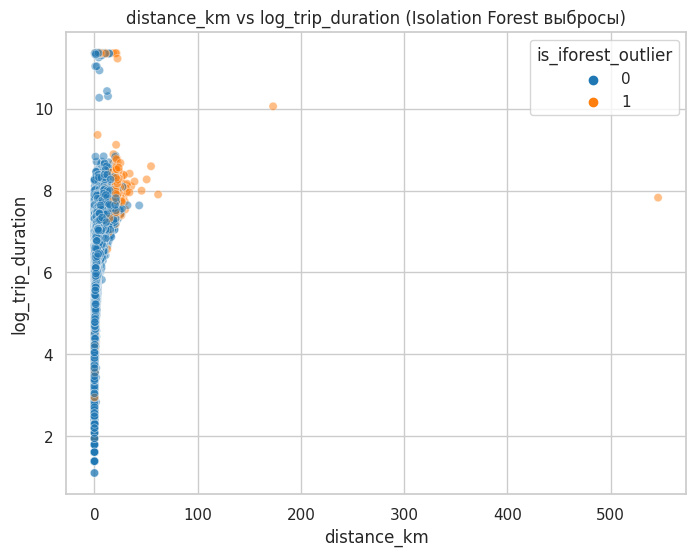

In [145]:
features_if = [
    "log_trip_duration",
    "distance_km",
    "passenger_count",
    "pickup_day_of_week",
    "pickup_month",
]

X_if = train[features_if].values

y_anom_base = train["is_iqr_outlier_log_trip_duration"].values


clf_if = IsolationForest(
    n_estimators=100,
    contamination=0.02,
    random_state=42,
    n_jobs=-1,
)
clf_if.fit(X_if)

if_labels = clf_if.predict(X_if)
if_scores = -clf_if.decision_function(X_if)

train["is_iforest_outlier"] = (if_labels == -1).astype(int)
train["iforest_score"] = if_scores

precision = precision_score(y_anom_base, train["is_iforest_outlier"])
recall = recall_score(y_anom_base, train["is_iforest_outlier"])
f1 = f1_score(y_anom_base, train["is_iforest_outlier"])
roc = roc_auc_score(y_anom_base, train["iforest_score"])

print(f"Isolation Forest vs IQR (log_trip_duration):")
print(f"Precision: {precision:.3f}")
print(f"Recall:    {recall:.3f}")
print(f"F1:        {f1:.3f}")
print(f"ROC-AUC:   {roc:.3f}")

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=train.sample(50000, random_state=42),
    x="distance_km",
    y="log_trip_duration",
    hue="is_iforest_outlier",
    palette={0: "tab:blue", 1: "tab:orange"},
    alpha=0.5,
)
plt.title("distance_km vs log_trip_duration (Isolation Forest выбросы)")
plt.show()


# Повторное обучение модели

In [146]:
X_clean, y_clean = result_df_clean.drop(columns=['log_trip_duration', 'dropoff_hour', 'dropoff_minute'], axis=1), clean_train['log_trip_duration']

In [147]:
X_train, X_val, y_train, y_val = train_test_split(X_clean, y_clean, random_state=42)

In [148]:
X_train

passenger_count  pickup_longitude  pickup_latitude  \
97849                  1        -73.991959        40.756989   
1385938                2        -73.953293        40.771778   
36786                  1        -74.001572        40.730900   
938618                 1        -74.015137        40.709751   
576778                 5        -73.977303        40.754379   
...                  ...               ...              ...   
259178                 1        -73.951546        40.773685   
1414414                1        -74.004204        40.742310   
131932                 1        -73.979675        40.764988   
671155                 1        -73.971634        40.762917   
121958                 1        -73.986740        40.722252   

         dropoff_longitude  dropoff_latitude  store_and_fwd_flag  pickup_hour  \
97849           -73.981987         40.762211            6.471089           16   
1385938         -73.992172         40.690151            6.471089           23   
36786           -74.006470         40.720448            6.471089           19   
938618          -73.994507         40.740978            6.471089           22   
576778          -73.976143         40.760681            6.471089            7   
...                    ...               ...                 ...          ...   
259178          -73.951843         40.781689            6.471089           17   
1414414         -74.011734         40.713848            6.471089            0   
131932          -73.991119         40.774853            6.471089           19   
671155          -73.998924         40.761158            6.471089            1   
121958          -73.987190         40.756302            6.471089            0   

         pickup_minute  pickup_day_of_week  pickup_month  is_weekend  \
97849               50                   5             4           1   
1385938             12                   6             2           1   
36786               37                   5             2           1   
938618              47                   6             5           1   
576778              19                   4             6           0   
...                ...                 ...           ...         ...   
259178              33                   4             1           0   
1414414              8                   5             3           1   
131932              49                   0             4           0   
671155              56                   6             3           1   
121958              14                   4             1           0   

         distance_km popular_lavel  is_peak_hour  route_straightness_ratio  
97849       1.021066  very_popular             1                  1.388811  
1385938     9.649621       popular             0                  1.277861  
36786       1.233355       popular             0                  1.274759  
938618      3.883176  very_popular             0                  1.339525  
576778      0.707512  very_popular             0                  1.126502  
...              ...           ...           ...                       ...  
259178      0.890272  very_popular             0                  1.025944  
1414414     3.227755  very_popular             1                  1.175010  
131932      1.460138  very_popular             1                  1.408795  
671155      2.306754  very_popular             0                  1.079276  
121958      3.786376  very_popular             0                  1.008195  

[1089549 rows x 15 columns]

In [149]:
from sklearn.linear_model import LinearRegression, Lasso

In [150]:
model = Lasso(alpha=0.0001, max_iter=5000, random_state=42)

In [151]:
X_train = pd.get_dummies(X_train, prefix=['popular_lavel'])

In [152]:
model.fit(X_train, y_train)

Lasso(alpha=0.0001, max_iter=5000, random_state=42)

In [153]:
X_val = pd.get_dummies(X_val, prefix=['popular_lavel'])

In [154]:
X_val

passenger_count  pickup_longitude  pickup_latitude  \
1095227                1        -73.976547        40.759243   
890292                 2        -73.982430        40.767681   
1064686                1        -73.965446        40.713581   
978117                 2        -73.979424        40.739017   
920548                 1        -73.999077        40.734192   
...                  ...               ...              ...   
563997                 1        -73.987541        40.728512   
1358200                1        -73.993446        40.750118   
349875                 1        -73.998016        40.720989   
895842                 3        -73.971909        40.757111   
1081365                2        -73.955170        40.787701   

         dropoff_longitude  dropoff_latitude  store_and_fwd_flag  pickup_hour  \
1095227         -73.978676         40.752335            6.471089           19   
890292          -73.963753         40.762760            6.471089           17   
1064686         -73.959732         40.718170            6.471089            1   
978117          -73.974815         40.760227            6.471089           13   
920548          -73.992393         40.730537            6.471089            7   
...                    ...               ...                 ...          ...   
563997          -73.938515         40.817101            6.471089           21   
1358200         -73.971046         40.755859            6.471089           19   
349875          -74.013420         40.705231            6.471089            8   
895842          -73.985260         40.738430            6.471089           21   
1081365         -73.968369         40.764851            6.471089           17   

         pickup_minute  pickup_day_of_week  pickup_month  is_weekend  \
1095227             49                   2             6           0   
890292              23                   2             6           0   
1064686              3                   6             1           1   
978117              34                   5             3           1   
920548              22                   0             4           0   
...                ...                 ...           ...         ...   
563997               2                   6             4           1   
1358200             53                   3             6           0   
349875               0                   4             5           0   
895842              20                   0             2           0   
1081365              2                   0             3           0   

         distance_km  is_peak_hour  route_straightness_ratio  \
1095227     0.788827             1                  1.199011   
890292      1.665381             0                  1.270815   
1064686     0.701670             0                  1.411145   
978117      2.390146             0                  1.147118   
920548      0.694443             0                  1.393630   
...              ...           ...                       ...   
563997     10.680762             0                  1.306513   
1358200     1.991893             1                  1.265520   
349875      2.180825             0                  1.396357   
895842      2.362141             1                  1.353137   
1081365     2.773249             0                  1.314632   

         popular_lavel_medium_popular  popular_lavel_not_popular  \
1095227                         False                      False   
890292                          False                      False   
1064686                          True                      False   
978117                          False                      False   
920548                          False                      False   
...                               ...                        ...   
563997                           True                      False   
1358200                         False                      False   
349875                          F

In [155]:
y_pred = model.predict(X_val)

In [156]:
print(f'новый RMSLE: {np.sqrt(mean_squared_log_error(y_true=y_val, y_pred=y_pred))}')

новый RMSLE: 0.08599627247517395


In [157]:
old_rmsle = 0.08639560044800579
new_rmsle = 0.08599627247517394

In [158]:
improve = ((old_rmsle - new_rmsle) / old_rmsle) * 100
print(f'Модель улучшилась: RMSLE снизился с {old_rmsle:.6f} до {new_rmsle:.6f}')
print(f'Это уменьшение ошибки на ~ {improve:.4f}%')

Модель улучшилась: RMSLE снизился с 0.086396 до 0.085996
Это уменьшение ошибки на ~ 0.4622%


# Блок 3

## Шаг 1

In [159]:
import lime
import lime.lime_tabular

### Для линейной модели Lasso локальная интепретация

In [160]:
result_df_clean

passenger_count  pickup_longitude  pickup_latitude  \
0                      1        -73.982155        40.767937   
1                      1        -73.980415        40.738564   
2                      1        -73.979027        40.763939   
3                      1        -74.010040        40.719971   
4                      1        -73.973053        40.793209   
...                  ...               ...              ...   
1452727                4        -73.982201        40.745522   
1452728                1        -74.000946        40.747379   
1452729                1        -73.959129        40.768799   
1452730                1        -73.982079        40.749062   
1452731                1        -73.979538        40.781750   

         dropoff_longitude  dropoff_latitude  store_and_fwd_flag  \
0               -73.964630         40.765602            6.471089   
1               -73.999481         40.731152            6.471089   
2               -74.005333         40.710087            6.471089   
3               -74.012268         40.706718            6.471089   
4               -73.972923         40.782520            6.471089   
...                    ...               ...                 ...   
1452727         -73.994911         40.740170            6.471089   
1452728         -73.970184         40.796547            6.471089   
1452729         -74.004433         40.707371            6.471089   
1452730         -73.974632         40.757107            6.471089   
1452731         -73.972809         40.790585            6.471089   

         log_trip_duration  pickup_hour  pickup_minute  pickup_day_of_week  \
0                 6.122493           17             24                   0   
1                 6.498282            0             43                   6   
2                 7.661527           11             35                   1   
3                 6.063785           19             32                   2   
4                 6.077642           13             30                   5   
...                    ...          ...            ...                 ...   
1452727           6.658011           13             31                   4   
1452728           6.486161            7             35                   6   
1452729           6.639876            6             57                   4   
1452730           5.924256           15             56                   1   
1452731           5.293305           14             44                   1   

         pickup_month  is_weekend  dropoff_hour  dropoff_minute  distance_km  \
0                   3           0            17              32     1.498521   
1                   6           1             0              54     1.805507   
2                   1           0            12              10     6.385098   
3                   4           0            19              39     1.485498   
4                   3           1            13              38     1.188588   
...               ...         ...           ...             ...          ...   
1452727             4           0            13              44     1.225080   
1452728             1           1             7              46     6.049836   
1452729             4           0             7              10     7.824606   
1452730             1           0            16               2     1.092564   
1452731             4           0            14              47     1.134042   

        popular_lavel  is_peak_hour  route_straightness_ratio  
0        very_popular             0                  1.156085  
1             popular             1                  1.343852  
2             popular             0                  1.282688  
3        very_popular             1                  1.116418  
4             popular             0                  1.007376  
...               ...           ...                       ...  
1452727  very_popular             0                  1.357477  
1452728  very_popular    

In [161]:
X_clean, y_clean = result_df_clean.drop(columns=['log_trip_duration', 'dropoff_hour', 'dropoff_minute'], axis=1), clean_train['log_trip_duration']

In [162]:
X_train, X_val, y_train, y_val = train_test_split(X_clean, y_clean, random_state=42)

In [163]:
X_train = pd.get_dummies(X_train, prefix=['popular_lavel'])

In [164]:
X_train

passenger_count  pickup_longitude  pickup_latitude  \
97849                  1        -73.991959        40.756989   
1385938                2        -73.953293        40.771778   
36786                  1        -74.001572        40.730900   
938618                 1        -74.015137        40.709751   
576778                 5        -73.977303        40.754379   
...                  ...               ...              ...   
259178                 1        -73.951546        40.773685   
1414414                1        -74.004204        40.742310   
131932                 1        -73.979675        40.764988   
671155                 1        -73.971634        40.762917   
121958                 1        -73.986740        40.722252   

         dropoff_longitude  dropoff_latitude  store_and_fwd_flag  pickup_hour  \
97849           -73.981987         40.762211            6.471089           16   
1385938         -73.992172         40.690151            6.471089           23   
36786           -74.006470         40.720448            6.471089           19   
938618          -73.994507         40.740978            6.471089           22   
576778          -73.976143         40.760681            6.471089            7   
...                    ...               ...                 ...          ...   
259178          -73.951843         40.781689            6.471089           17   
1414414         -74.011734         40.713848            6.471089            0   
131932          -73.991119         40.774853            6.471089           19   
671155          -73.998924         40.761158            6.471089            1   
121958          -73.987190         40.756302            6.471089            0   

         pickup_minute  pickup_day_of_week  pickup_month  is_weekend  \
97849               50                   5             4           1   
1385938             12                   6             2           1   
36786               37                   5             2           1   
938618              47                   6             5           1   
576778              19                   4             6           0   
...                ...                 ...           ...         ...   
259178              33                   4             1           0   
1414414              8                   5             3           1   
131932              49                   0             4           0   
671155              56                   6             3           1   
121958              14                   4             1           0   

         distance_km  is_peak_hour  route_straightness_ratio  \
97849       1.021066             1                  1.388811   
1385938     9.649621             0                  1.277861   
36786       1.233355             0                  1.274759   
938618      3.883176             0                  1.339525   
576778      0.707512             0                  1.126502   
...              ...           ...                       ...   
259178      0.890272             0                  1.025944   
1414414     3.227755             1                  1.175010   
131932      1.460138             1                  1.408795   
671155      2.306754             0                  1.079276   
121958      3.786376             0                  1.008195   

         popular_lavel_medium_popular  popular_lavel_not_popular  \
97849                           False                      False   
1385938                         False                      False   
36786                           False                      False   
938618                          False                      False   
576778                          False                      False   
...                               ...                        ...   
259178                          False                      False   
1414414                         False                      False   
131932                          F

In [165]:
X_val = pd.get_dummies(X_val, prefix=['popular_lavel'])

In [166]:
X_train

passenger_count  pickup_longitude  pickup_latitude  \
97849                  1        -73.991959        40.756989   
1385938                2        -73.953293        40.771778   
36786                  1        -74.001572        40.730900   
938618                 1        -74.015137        40.709751   
576778                 5        -73.977303        40.754379   
...                  ...               ...              ...   
259178                 1        -73.951546        40.773685   
1414414                1        -74.004204        40.742310   
131932                 1        -73.979675        40.764988   
671155                 1        -73.971634        40.762917   
121958                 1        -73.986740        40.722252   

         dropoff_longitude  dropoff_latitude  store_and_fwd_flag  pickup_hour  \
97849           -73.981987         40.762211            6.471089           16   
1385938         -73.992172         40.690151            6.471089           23   
36786           -74.006470         40.720448            6.471089           19   
938618          -73.994507         40.740978            6.471089           22   
576778          -73.976143         40.760681            6.471089            7   
...                    ...               ...                 ...          ...   
259178          -73.951843         40.781689            6.471089           17   
1414414         -74.011734         40.713848            6.471089            0   
131932          -73.991119         40.774853            6.471089           19   
671155          -73.998924         40.761158            6.471089            1   
121958          -73.987190         40.756302            6.471089            0   

         pickup_minute  pickup_day_of_week  pickup_month  is_weekend  \
97849               50                   5             4           1   
1385938             12                   6             2           1   
36786               37                   5             2           1   
938618              47                   6             5           1   
576778              19                   4             6           0   
...                ...                 ...           ...         ...   
259178              33                   4             1           0   
1414414              8                   5             3           1   
131932              49                   0             4           0   
671155              56                   6             3           1   
121958              14                   4             1           0   

         distance_km  is_peak_hour  route_straightness_ratio  \
97849       1.021066             1                  1.388811   
1385938     9.649621             0                  1.277861   
36786       1.233355             0                  1.274759   
938618      3.883176             0                  1.339525   
576778      0.707512             0                  1.126502   
...              ...           ...                       ...   
259178      0.890272             0                  1.025944   
1414414     3.227755             1                  1.175010   
131932      1.460138             1                  1.408795   
671155      2.306754             0                  1.079276   
121958      3.786376             0                  1.008195   

         popular_lavel_medium_popular  popular_lavel_not_popular  \
97849                           False                      False   
1385938                         False                      False   
36786                           False                      False   
938618                          False                      False   
576778                          False                      False   
...                               ...                        ...   
259178                          False                      False   
1414414                         False                      False   
131932                          F

In [167]:
model = Lasso(alpha=0.0001, max_iter=5000, random_state=42)

In [168]:
model.fit(X_train, y_train)

Lasso(alpha=0.0001, max_iter=5000, random_state=42)

In [169]:
fature_names = X_train.columns.to_list()
fature_names

['passenger_count',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'store_and_fwd_flag',
 'pickup_hour',
 'pickup_minute',
 'pickup_day_of_week',
 'pickup_month',
 'is_weekend',
 'distance_km',
 'is_peak_hour',
 'route_straightness_ratio',
 'popular_lavel_medium_popular',
 'popular_lavel_not_popular',
 'popular_lavel_popular',
 'popular_lavel_very_popular']

In [170]:
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,           
    feature_names=fature_names,
    class_names=['log_trip_duration'],
    mode='regression',              
    verbose=True,                   
    random_state=42  
)

In [171]:
idx=1000

In [172]:
X_val

passenger_count  pickup_longitude  pickup_latitude  \
1095227                1        -73.976547        40.759243   
890292                 2        -73.982430        40.767681   
1064686                1        -73.965446        40.713581   
978117                 2        -73.979424        40.739017   
920548                 1        -73.999077        40.734192   
...                  ...               ...              ...   
563997                 1        -73.987541        40.728512   
1358200                1        -73.993446        40.750118   
349875                 1        -73.998016        40.720989   
895842                 3        -73.971909        40.757111   
1081365                2        -73.955170        40.787701   

         dropoff_longitude  dropoff_latitude  store_and_fwd_flag  pickup_hour  \
1095227         -73.978676         40.752335            6.471089           19   
890292          -73.963753         40.762760            6.471089           17   
1064686         -73.959732         40.718170            6.471089            1   
978117          -73.974815         40.760227            6.471089           13   
920548          -73.992393         40.730537            6.471089            7   
...                    ...               ...                 ...          ...   
563997          -73.938515         40.817101            6.471089           21   
1358200         -73.971046         40.755859            6.471089           19   
349875          -74.013420         40.705231            6.471089            8   
895842          -73.985260         40.738430            6.471089           21   
1081365         -73.968369         40.764851            6.471089           17   

         pickup_minute  pickup_day_of_week  pickup_month  is_weekend  \
1095227             49                   2             6           0   
890292              23                   2             6           0   
1064686              3                   6             1           1   
978117              34                   5             3           1   
920548              22                   0             4           0   
...                ...                 ...           ...         ...   
563997               2                   6             4           1   
1358200             53                   3             6           0   
349875               0                   4             5           0   
895842              20                   0             2           0   
1081365              2                   0             3           0   

         distance_km  is_peak_hour  route_straightness_ratio  \
1095227     0.788827             1                  1.199011   
890292      1.665381             0                  1.270815   
1064686     0.701670             0                  1.411145   
978117      2.390146             0                  1.147118   
920548      0.694443             0                  1.393630   
...              ...           ...                       ...   
563997     10.680762             0                  1.306513   
1358200     1.991893             1                  1.265520   
349875      2.180825             0                  1.396357   
895842      2.362141             1                  1.353137   
1081365     2.773249             0                  1.314632   

         popular_lavel_medium_popular  popular_lavel_not_popular  \
1095227                         False                      False   
890292                          False                      False   
1064686                          True                      False   
978117                          False                      False   
920548                          False                      False   
...                               ...                        ...   
563997                           True                      False   
1358200                         False                      False   
349875                          F

In [173]:
exp = explainer.explain_instance(X_val.iloc[idx].values, model.predict, num_features=5)

Intercept 6.536924018692891
Prediction_local [6.18631531]
Right: 6.227580200040258


In [174]:
exp.show_in_notebook(show_table=True,
    show_predicted_value=True,
    show_all=True)

## Больше всего на оценку повлияли distance_km, is_weekend, popular_lavel_not_popular, pickup_latitude и pickup_longitude
Возможно будут менять навазния переменных на графике, так как номера индексов меняются при запуске кода

### Для ансамблевой модели CatBoostRegressor локальная интепретация Shap

In [175]:
from catboost import CatBoostRegressor
import shap

In [176]:
X_train_cat, X_val_cat, y_train_cat, y_val_cat = train_test_split(X_clean, y_clean, random_state=42)

In [177]:
model = CatBoostRegressor(iterations=100, random_state=42, cat_features=['popular_lavel'], eval_metric='MSLE')

In [178]:
model.fit(X_train_cat, y_train_cat)

Learning rate set to 0.5
0:	learn: 0.0070039	total: 210ms	remaining: 20.7s
1:	learn: 0.0052983	total: 335ms	remaining: 16.4s
2:	learn: 0.0046663	total: 471ms	remaining: 15.2s
3:	learn: 0.0043715	total: 595ms	remaining: 14.3s
4:	learn: 0.0041834	total: 717ms	remaining: 13.6s
5:	learn: 0.0040773	total: 835ms	remaining: 13.1s
6:	learn: 0.0040067	total: 963ms	remaining: 12.8s
7:	learn: 0.0039426	total: 1.09s	remaining: 12.6s
8:	learn: 0.0038808	total: 1.21s	remaining: 12.2s
9:	learn: 0.0038218	total: 1.34s	remaining: 12.1s
10:	learn: 0.0037686	total: 1.47s	remaining: 11.9s
11:	learn: 0.0037289	total: 1.6s	remaining: 11.8s
12:	learn: 0.0037000	total: 1.73s	remaining: 11.5s
13:	learn: 0.0036773	total: 1.85s	remaining: 11.4s
14:	learn: 0.0036555	total: 1.98s	remaining: 11.2s
15:	learn: 0.0036378	total: 2.12s	remaining: 11.1s
16:	learn: 0.0036158	total: 2.25s	remaining: 11s
17:	learn: 0.0035911	total: 2.37s	remaining: 10.8s
18:	learn: 0.0035815	total: 2.5s	remaining: 10.6s
19:	learn: 0.0035725

In [179]:
explainer = shap.TreeExplainer(
    model=model,
    feature_perturbation="tree_path_dependent"
)

In [180]:
shap_values = explainer(X_val_cat)

In [181]:
shap_values

.values =
array([[-0.00634774,  0.01864028,  0.04125692, ..., -0.00442125,
        -0.02290854,  0.06277659],
       [ 0.01359908,  0.0458034 ,  0.02970166, ...,  0.00347169,
         0.00802234,  0.01008745],
       [-0.00846817, -0.11326964, -0.04186979, ...,  0.02320279,
        -0.00975725,  0.03878433],
       ...,
       [-0.00599745,  0.00582799,  0.02267109, ...,  0.00889537,
        -0.00228215, -0.03604854],
       [ 0.01540633, -0.02032299,  0.01697896, ..., -0.00950904,
         0.01191756, -0.1910314 ],
       [ 0.01370255, -0.0142392 , -0.05758738, ..., -0.00549144,
         0.00802234, -0.01356913]])

.base_values =
array([6.47229978, 6.47229978, 6.47229978, ..., 6.47229978, 6.47229978,
       6.47229978])

.data =
array([[1, -73.97654724121092, 40.75924301147461, ..., 'very_popular', 1,
        1.1990112977979663],
       [2, -73.98242950439453, 40.767681121826165, ..., 'popular', 0,
        1.2708146640058413],
       [1, -73.96544647216798, 40.71358108520508, ..., 'me

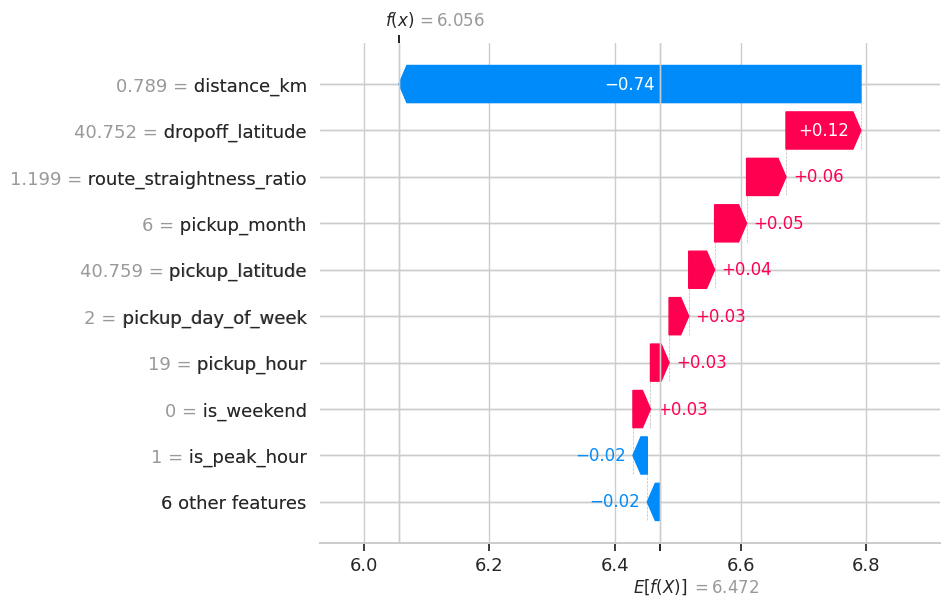

In [182]:
shap.plots.waterfall(shap_values[0])

## Как и в лайме наибольшее влияние имеет столбец distance_km, что в целом логично. Определяющим признакос в данном случае является distance_km

# Шаг 2

In [183]:
import numpy as np
import pandas as pd
import shap
import joblib
from typing import Optional, Tuple

class LassoSHAPEmbeddings:
    def __init__(self, lasso_model, background_data: Optional[np.ndarray] = None, feature_names: Optional[list] = None):
        self.model = lasso_model
        self.background_data = background_data
        self.feature_names = feature_names
        self.explainer = None
        self.expected_value = None
        self._create_explainer()
    
    def _create_explainer(self):
        if self.background_data is None:
            self.explainer = shap.LinearExplainer(
                self.model,
                shap.sample(self.model.coef_.shape[0], 100) if hasattr(self.model, 'coef_') 
                else np.zeros((100, len(self.model.coef_))),
                feature_dependence='independent'
            )
        else:
            self.explainer = shap.LinearExplainer(
                self.model,
                self.background_data,
                feature_dependence='independent'
            )
        
        self.expected_value = self.explainer.expected_value
    
    def get_shap_embeddings(self, X: np.ndarray, return_format: str = 'array') -> np.ndarray:
        shap_values = self.explainer.shap_values(X)
        if return_format == 'array':
            return shap_values
        elif return_format == 'dataframe':
            if self.feature_names is None:
                self.feature_names = [f'feature_{i}' for i in range(shap_values.shape[1])]
            
            df = pd.DataFrame(
                shap_values,
                columns=[f'shap_{name}' for name in self.feature_names],
                index=X.index if hasattr(X, 'index') else None
            )
            
            df['expected_value'] = self.expected_value
            df['prediction'] = self.model.predict(X)
            
            return df
        else:
            return None
    
    def create_embeddings_function(self):
        def embeddings_func(X: np.ndarray) -> np.ndarray:
            return self.get_shap_embeddings(X, return_format='array')
        
        embeddings_func.model_type = 'lasso'
        embeddings_func.feature_names = self.feature_names
        embeddings_func.expected_value = self.expected_value
        
        return embeddings_func
    
    def create_importance_function(self, method: str = 'mean_abs'):
        def importance_func(X: np.ndarray) -> np.ndarray:
            shap_vals = self.get_shap_embeddings(X, return_format='array')
            
            if method == 'mean_abs':
                return np.mean(np.abs(shap_vals), axis=0)
            elif method == 'std':
                return np.std(shap_vals, axis=0)
            elif method == 'max_abs':
                return np.max(np.abs(shap_vals), axis=0)
            else:
                raise ValueError(f"Неизвестный метод: {method}")
        
        importance_func.method = method
        return importance_func
    
    def create_drift_function(self, reference_data: np.ndarray, threshold: float = 0.1):
        ref_shap = self.get_shap_embeddings(reference_data, return_format='array')
        
        def drift_func(X: np.ndarray) -> Tuple[np.ndarray, dict]:
            curr_shap = self.get_shap_embeddings(X, return_format='array')
            
            drift_scores = np.zeros(curr_shap.shape[1])
            drift_detected = np.zeros(curr_shap.shape[1], dtype=bool)
            
            for i in range(curr_shap.shape[1]):
                score = np.abs(np.mean(ref_shap[:, i]) - np.mean(curr_shap[:, i]))
                drift_scores[i] = score
                drift_detected[i] = score > threshold
            
            stats = {
                'scores': drift_scores,
                'is_drifted': drift_detected,
                'mean_score': np.mean(drift_scores),
                'max_score': np.max(drift_scores),
                'drift_ratio': np.mean(drift_detected)
            }
            
            return drift_detected, stats
            
        drift_func.reference_data = reference_data
        drift_func.threshold = threshold
        
        return drift_func

In [184]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X_train, X_val, y_train, y_val = train_test_split(
    X_clean, y_clean, test_size=0.3, random_state=42
)

X_train = pd.get_dummies(X_train, prefix=['popular_lavel'])

X_val = pd.get_dummies(X_val, prefix=['popular_lavel'])

lasso_model = Lasso(alpha=0.0001, max_iter=5000, random_state=42)


lasso_model.fit(X_train, y_train)

print(f"Коэффициенты Lasso (ненулевых): {np.sum(lasso_model.coef_ != 0)}")

Коэффициенты Lasso (ненулевых): 17


In [185]:
shap_generator = LassoSHAPEmbeddings(
    lasso_model=lasso_model,
    background_data=X_train[:100],
    feature_names=[f'feature_{i}' for i in range(X.shape[1])]
)

shap_embeddings = shap_generator.get_shap_embeddings(X_val[:10], return_format='array')
print(f"\nSHAP-эмбеддинги (первые 10 наблюдений):")
print(f"Размер: {shap_embeddings.shape}")
print(f"Пример (первое наблюдение): {shap_embeddings[0]}")


embeddings_func = shap_generator.create_embeddings_function()

importance_func = shap_generator.create_importance_function(method='mean_abs')

drift_func = shap_generator.create_drift_function(
    reference_data=X_train[:200],
    threshold=0.05
)

test_data = X_val[:50]

embeddings = embeddings_func(test_data)


SHAP-эмбеддинги (первые 10 наблюдений):
Размер: (10, 18)
Пример (первое наблюдение): [-0.00962017352026466 0.0006163424265788563 0.008949603153269061
 -0.0002541798682730734 -0.0037112667823910035 0.0 0.03304426116985775
 -0.004577040031991805 -0.017532237637745793 0.041793482839354155
 0.05178765896567139 -0.2902349135201752 -0.02184354402384217
 -0.015902157260400188 -0.002992471469584626 0.003065213962788975
 0.0014208830331887336 0.0008059041653797064]


In [186]:
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

class SHAPAnomalyDetector:
    
    def __init__(self, shap_embeddings_generator):
        self.shap_generator = shap_embeddings_generator
        self.detectors = {}
        self.anomaly_masks = {}
        self.anomaly_scores = {}
        
    def detect_anomalies_isolation_forest(self, X, contamination=0.1, **kwargs):
        print(f"Isolation Forest (contamination={contamination})")
        
        shap_embeddings = self.shap_generator.get_shap_embeddings(X, return_format='array')
        
        detector = IsolationForest(
            contamination=contamination,
            random_state=42,
            **kwargs
        )
        
        anomaly_labels = detector.fit_predict(shap_embeddings)
        anomaly_mask = anomaly_labels == -1
        
        anomaly_scores = detector.score_samples(shap_embeddings)
        
        n_anomalies = anomaly_mask.sum()
        print(f"Аномалий: {n_anomalies} из {len(X)} ({n_anomalies/len(X):.1%})")
        
        self.detectors['isolation_forest'] = detector
        self.anomaly_masks['isolation_forest'] = anomaly_mask
        self.anomaly_scores['isolation_forest'] = anomaly_scores
        
        return anomaly_mask, anomaly_scores
    
    def detect_anomalies_elliptic_envelope(self, X, contamination=0.1, **kwargs):
        print(f"Elliptic Envelope (contamination={contamination})")
        
        shap_embeddings = self.shap_generator.get_shap_embeddings(X, return_format='array')
        
        detector = EllipticEnvelope(
            contamination=contamination,
            random_state=42,
            **kwargs
        )
        
        try:
            anomaly_labels = detector.fit_predict(shap_embeddings)
            anomaly_mask = anomaly_labels == -1
            
            anomaly_scores = detector.decision_function(shap_embeddings)
            
            n_anomalies = anomaly_mask.sum()
            print(f"Аномалий: {n_anomalies} из {len(X)} ({n_anomalies/len(X):.1%})")
            
            self.detectors['elliptic_envelope'] = detector
            self.anomaly_masks['elliptic_envelope'] = anomaly_mask
            self.anomaly_scores['elliptic_envelope'] = anomaly_scores
            
            return anomaly_mask, anomaly_scores
            
        except Exception as e:
            print(f"Ошибка Elliptic Envelope: {e}")
            return None, None
    
    def detect_anomalies_lof(self, X, contamination=0.1, **kwargs):
        print(f"Local Outlier Factor (contamination={contamination})")
        
        shap_embeddings = self.shap_generator.get_shap_embeddings(X, return_format='array')
        
        detector = LocalOutlierFactor(
            contamination=contamination,
            novelty=False,
            **kwargs
        )
        
        anomaly_labels = detector.fit_predict(shap_embeddings)
        anomaly_mask = anomaly_labels == -1
        
        anomaly_scores = -detector.negative_outlier_factor_
        
        n_anomalies = anomaly_mask.sum()
        print(f"Аномалий: {n_anomalies} из {len(X)} ({n_anomalies/len(X):.1%})")
        
        self.detectors['lof'] = detector
        self.anomaly_masks['lof'] = anomaly_mask
        self.anomaly_scores['lof'] = anomaly_scores
        
        return anomaly_mask, anomaly_scores
    
    def compare_anomaly_methods(self, X, methods=None, contamination=0.1):
        if methods is None:
            methods = ['isolation_forest', 'elliptic_envelope', 'lof']
        
        results = {}
        
        for method in methods:
            print(f"\n{'='*60}")
            print(f"Метод: {method}")
            print('='*60)
            
            try:
                if method == 'isolation_forest':
                    mask, scores = self.detect_anomalies_isolation_forest(
                        X, contamination=contamination
                    )
                elif method == 'elliptic_envelope':
                    mask, scores = self.detect_anomalies_elliptic_envelope(
                        X, contamination=contamination
                    )
                elif method == 'lof':
                    mask, scores = self.detect_anomalies_lof(
                        X, contamination=contamination
                    )
                else:
                    print(f"Неизвестный метод: {method}")
                    continue
                
                if mask is not None:
                    results[method] = {
                        'mask': mask,
                        'scores': scores,
                        'n_anomalies': mask.sum(),
                        'percentage': mask.sum() / len(X)
                    }
                    
            except Exception as e:
                print(f"Ошибка метода {method}: {e}")
        
        return results
    
    def analyze_anomalies(self, X, anomaly_mask, feature_names=None, top_n=5):
        if feature_names is None:
            feature_names = [f'feature_{i}' for i in range(X.shape[1])]
        
        normal_data = X[~anomaly_mask]
        anomaly_data = X[anomaly_mask]
        
        print(f"\n{'='*60}")
        print("АНАЛИЗ АНОМАЛИЙ")
        print('='*60)
        
        print(f"Нормальных: {len(normal_data)}")
        print(f"Аномальных: {len(anomaly_data)}")
        
        if len(anomaly_data) == 0:
            print("Аномалии не обнаружены")
            return None
        
        analysis_results = {}
        
        for i, feature in enumerate(feature_names[:top_n]):
            normal_vals = normal_data[:, i] if isinstance(normal_data, np.ndarray) else normal_data.iloc[:, i]
            anomaly_vals = anomaly_data[:, i] if isinstance(anomaly_data, np.ndarray) else anomaly_data.iloc[:, i]
            
            mean_normal = np.mean(normal_vals)
            mean_anomaly = np.mean(anomaly_vals)
            std_normal = np.std(normal_vals)
            
            z_score = abs(mean_anomaly - mean_normal) / std_normal if std_normal > 0 else 0
            
            analysis_results[feature] = {
                'mean_normal': mean_normal,
                'mean_anomaly': mean_anomaly,
                'mean_diff': mean_anomaly - mean_normal,
                'std_normal': std_normal,
                'std_anomaly': np.std(anomaly_vals),
                'z_score': z_score,
                'is_significant': z_score > 3
            }
        
        print("\nСравнение признаков:")
        print(f"{'Признак':<20} {'Нормальное':>10} {'Аномальное':>10} {'Разница':>10} {'Z-score':>10}")
        print("-" * 70)
        
        for feature, stats in analysis_results.items():
            print(f"{feature:<20} {stats['mean_normal']:10.3f} "
                  f"{stats['mean_anomaly']:10.3f} "
                  f"{stats['mean_diff']:10.3f} "
                  f"{stats['z_score']:10.3f}")
        
        return analysis_results
    
    def visualize_anomalies(self, X, anomaly_mask, method='pca'):
        shap_embeddings = self.shap_generator.get_shap_embeddings(X, return_format='array')
        
        if method == 'pca':
            reducer = PCA(n_components=2, random_state=42)
            reduced_data = reducer.fit_transform(shap_embeddings)
            title_suffix = 'PCA'
        elif method == 'tsne':
            reducer = TSNE(n_components=2, random_state=42, perplexity=30)
            reduced_data = reducer.fit_transform(shap_embeddings)
            title_suffix = 't-SNE'
        else:
            raise ValueError(f"Неизвестный метод: {method}")
        
        fig, axes = plt.subplots(1, 2, figsize=(15, 6))
        
        normal_mask = ~anomaly_mask
        
        axes[0].scatter(reduced_data[normal_mask, 0], reduced_data[normal_mask, 1],
                       alpha=0.6, s=30, label='Normal', color='blue')
        axes[0].scatter(reduced_data[anomaly_mask, 0], reduced_data[anomaly_mask, 1],
                       alpha=0.8, s=50, label='Anomaly', color='red', marker='x')
        axes[0].set_xlabel(f'{title_suffix} Component 1')
        axes[0].set_ylabel(f'{title_suffix} Component 2')
        axes[0].set_title(f'Anomalies in SHAP Space ({title_suffix})')
        axes[0].legend()
        axes[0].grid(True, alpha=0.3)
        
        if 'anomaly_scores' in self.anomaly_scores:
            scores = self.anomaly_scores.get('isolation_forest', 
                                           list(self.anomaly_scores.values())[0])
            
            axes[1].hist(scores[normal_mask], bins=30, alpha=0.7, 
                        label='Normal', color='blue')
            axes[1].hist(scores[anomaly_mask], bins=30, alpha=0.7, 
                        label='Anomaly', color='red')
            axes[1].set_xlabel('Anomaly Score')
            axes[1].set_ylabel('Frequency')
            axes[1].set_title('Distribution of Anomaly Scores')
            axes[1].legend()
            axes[1].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        return reduced_data
    
    def get_clean_data(self, X, y=None, method='isolation_forest'):
        if method not in self.anomaly_masks:
            print(f"Сначала выполните обнаружение аномалий методом {method}")
            return None
        
        anomaly_mask = self.anomaly_masks[method]
        normal_mask = ~anomaly_mask
        
        X_clean = X[normal_mask]
        
        if y is not None:
            y_clean = y[normal_mask]
            return X_clean, y_clean
        else:
            return X_clean

def rmsle(y_true, y_pred):
    if np.any(y_true < 0) or np.any(y_pred < 0):
        min_val_true = np.min(y_true)
        min_val_pred = np.min(y_pred)
        min_val = min(min_val_true, min_val_pred)
        
        if min_val < 0:
            shift = abs(min_val) + 1
            y_true = y_true + shift
            y_pred = y_pred + shift
    
    log_true = np.log1p(y_true)
    log_pred = np.log1p(y_pred)
    squared_errors = (log_true - log_pred) ** 2
    return np.sqrt(np.mean(squared_errors))

In [187]:
X_train

passenger_count  pickup_longitude  pickup_latitude  \
710847                 1        -73.978951        40.737118   
18875                  1        -73.978760        40.766678   
195783                 1        -73.937988        40.796764   
109445                 1        -73.993362        40.747292   
690534                 1        -73.997803        40.725529   
...                  ...               ...              ...   
259178                 1        -73.951546        40.773685   
1414414                1        -74.004204        40.742310   
131932                 1        -73.979675        40.764988   
671155                 1        -73.971634        40.762917   
121958                 1        -73.986740        40.722252   

         dropoff_longitude  dropoff_latitude  store_and_fwd_flag  pickup_hour  \
710847          -73.993187         40.733231            6.471089           18   
18875           -73.955803         40.777813            6.471089           19   
195783          -73.938637         40.792385            6.471089            8   
109445          -73.985428         40.757740            6.471089            4   
690534          -74.002098         40.720490            6.471089           15   
...                    ...               ...                 ...          ...   
259178          -73.951843         40.781689            6.471089           17   
1414414         -74.011734         40.713848            6.471089            0   
131932          -73.991119         40.774853            6.471089           19   
671155          -73.998924         40.761158            6.471089            1   
121958          -73.987190         40.756302            6.471089            0   

         pickup_minute  pickup_day_of_week  pickup_month  is_weekend  \
710847              24                   0             4           0   
18875               34                   3             3           0   
195783              54                   3             1           0   
109445              25                   6             4           1   
690534               8                   2             6           0   
...                ...                 ...           ...         ...   
259178              33                   4             1           0   
1414414              8                   5             3           1   
131932              49                   0             4           0   
671155              56                   6             3           1   
121958              14                   4             1           0   

         distance_km  is_peak_hour  route_straightness_ratio  \
710847      1.275009             1                  1.277546   
18875       2.295699             1                  1.379007   
195783      0.490003             0                  1.103247   
109445      1.340344             0                  1.363060   
690534      0.667085             0                  1.380176   
...              ...           ...                       ...   
259178      0.890272             0                  1.025944   
1414414     3.227755             1                  1.175010   
131932      1.460138             1                  1.408795   
671155      2.306754             0                  1.079276   
121958      3.786376             0                  1.008195   

         popular_lavel_medium_popular  popular_lavel_not_popular  \
710847                          False                      False   
18875                           False                      False   
195783                          False                      False   
109445                          False                      False   
690534                          False                      False   
...                               ...                        ...   
259178                          False                      False   
1414414                         False                      False   
131932                          F

In [188]:
lasso_model = Lasso(alpha=0.0001, max_iter=5000, random_state=42)

lasso_model.fit(X_train, y_train)

print(f"Коэффициентов (ненулевых): {np.sum(lasso_model.coef_ != 0)}")

Коэффициентов (ненулевых): 17


In [189]:
shap_generator = LassoSHAPEmbeddings(
    lasso_model=lasso_model,
    background_data=X_train[:100],
    feature_names=[f'feature_{i}' for i in range(100)]
)

anomaly_detector = SHAPAnomalyDetector(shap_generator)

In [190]:
print('Аномалии')

anomaly_mask, anomaly_scores = anomaly_detector.detect_anomalies_isolation_forest(
    X_val, 
    contamination=0.1
)

Аномалии
Isolation Forest (contamination=0.1)
Аномалий: 43582 из 435820 (10.0%)


Анализ и удаление аномалий
Isolation Forest (contamination=0.1)
Аномалий: 101692 из 1016912 (10.0%)
Исходный размер тренировочных данных: (1016912, 18)
Очищенный размер тренировочных данных: (915220, 18)
Удалено наблюдений: 101692 (10.0%)
Модель переобучена на очищенных данных
Коэффициентов (ненулевых): 2

ШАГ 4: Сравнение качества моделей
Модель на полных данных:
  RMSLE на валидации: 0.0858

Модель на очищенных данных:
  RMSLE на валидации: 0.0874

Разница RMSLE: 0.0016
Анализ 101692 удаленных наблюдений:
  RMSLE (старая модель): 0.1102
  RMSLE (новая модель): 0.1281

Статистика удаленных наблюдений:
  Среднее y: 6.993 vs общее среднее: 6.472
  STD y: 0.969 vs общее STD: 0.785

SHAP анализ:
  Средний |SHAP| удаленных: 0.0774
  Средний |SHAP| оставшихся: 0.0282
  Разница: 0.0493

ШАГ 5: Визуализация результатов


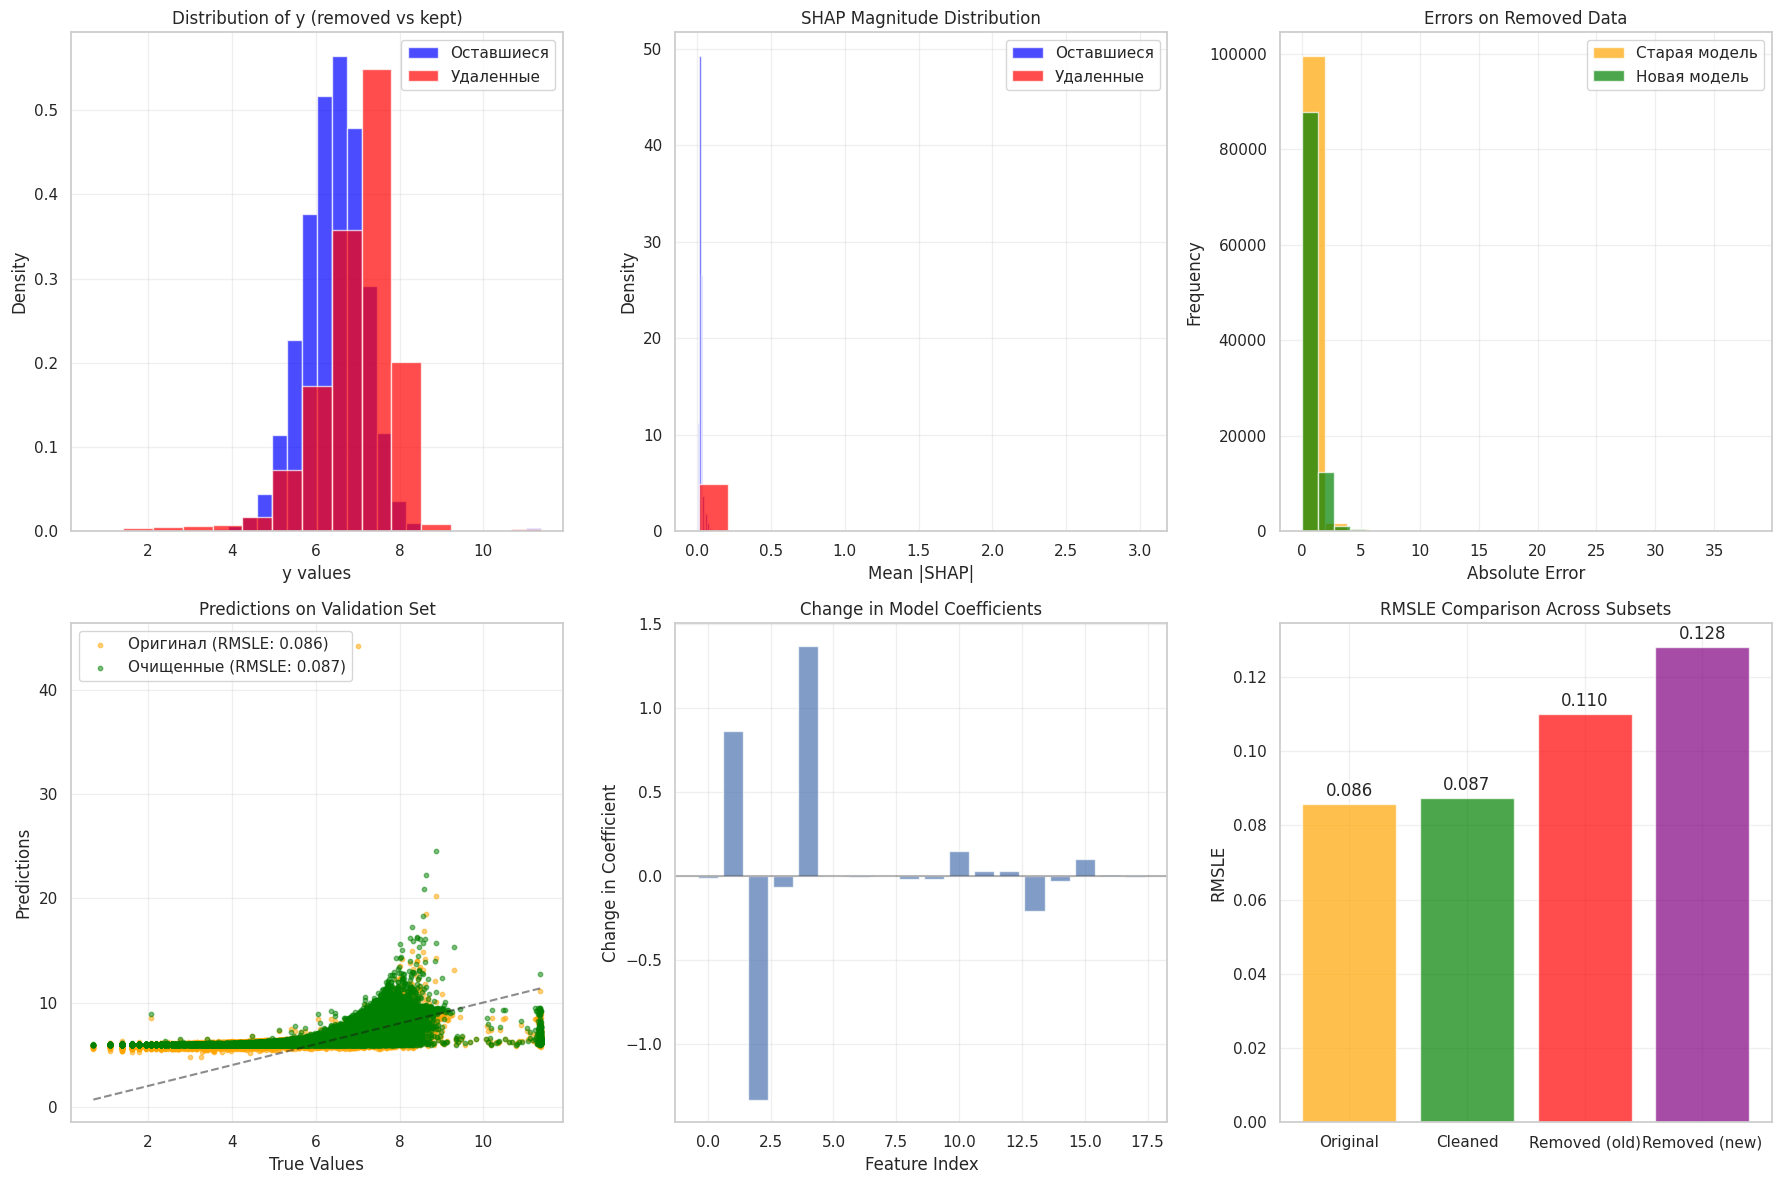

In [191]:
print("Анализ и удаление аномалий")

train_anomaly_mask, train_anomaly_scores = anomaly_detector.detect_anomalies_isolation_forest(
    X_train, 
    contamination=0.1
)


X_train_clean, y_train_clean = anomaly_detector.get_clean_data(
    X_train, y_train, method='isolation_forest'
)

print(f"Исходный размер тренировочных данных: {X_train.shape}")
print(f"Очищенный размер тренировочных данных: {X_train_clean.shape}")
print(f"Удалено наблюдений: {train_anomaly_mask.sum()} ({train_anomaly_mask.sum()/len(X_train):.1%})")


lasso_model_clean = Lasso(alpha=0.1, random_state=42)
lasso_model_clean.fit(X_train_clean, y_train_clean)

print(f"Модель переобучена на очищенных данных")
print(f"Коэффициентов (ненулевых): {np.sum(lasso_model_clean.coef_ != 0)}")

print("\n" + "="*60)
print("ШАГ 4: Сравнение качества моделей")
print("="*60)

y_pred_original = lasso_model.predict(X_val)
original_rmsle = rmsle(y_val, y_pred_original)

y_pred_clean = lasso_model_clean.predict(X_val)
clean_rmsle = rmsle(y_val, y_pred_clean)

print(f"Модель на полных данных:")
print(f"  RMSLE на валидации: {original_rmsle:.4f}")

print(f"\nМодель на очищенных данных:")
print(f"  RMSLE на валидации: {clean_rmsle:.4f}")

print(f"\nРазница RMSLE: {clean_rmsle - original_rmsle:.4f}")

if train_anomaly_mask.sum() > 0:
    removed_X = X_train[train_anomaly_mask]
    removed_y = y_train[train_anomaly_mask]
    
    removed_predictions_old = lasso_model.predict(removed_X)
    removed_predictions_new = lasso_model_clean.predict(removed_X)
    
    rmsle_removed_old = rmsle(removed_y, removed_predictions_old)
    rmsle_removed_new = rmsle(removed_y, removed_predictions_new)
    
    print(f"Анализ {train_anomaly_mask.sum()} удаленных наблюдений:")
    print(f"  RMSLE (старая модель): {rmsle_removed_old:.4f}")
    print(f"  RMSLE (новая модель): {rmsle_removed_new:.4f}")
    
    print(f"\nСтатистика удаленных наблюдений:")
    print(f"  Среднее y: {removed_y.mean():.3f} vs общее среднее: {y_train.mean():.3f}")
    print(f"  STD y: {removed_y.std():.3f} vs общее STD: {y_train.std():.3f}")
    
    shap_embeddings_train = shap_generator.get_shap_embeddings(X_train, return_format='array')
    shap_magnitude_train = np.mean(np.abs(shap_embeddings_train), axis=1)
    
    print(f"\nSHAP анализ:")
    print(f"  Средний |SHAP| удаленных: {shap_magnitude_train[train_anomaly_mask].mean():.4f}")
    print(f"  Средний |SHAP| оставшихся: {shap_magnitude_train[~train_anomaly_mask].mean():.4f}")
    print(f"  Разница: {shap_magnitude_train[train_anomaly_mask].mean() - shap_magnitude_train[~train_anomaly_mask].mean():.4f}")
    
    print("\n" + "="*60)
    print("ШАГ 5: Визуализация результатов")
    print("="*60)
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    
    axes[0, 0].hist(y_train_clean, alpha=0.7, bins=30, label='Оставшиеся', color='blue', density=True)
    axes[0, 0].hist(removed_y, alpha=0.7, bins=15, label='Удаленные', color='red', density=True)
    axes[0, 0].set_xlabel('y values')
    axes[0, 0].set_ylabel('Density')
    axes[0, 0].set_title('Distribution of y (removed vs kept)')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    
    axes[0, 1].hist(shap_magnitude_train[~train_anomaly_mask], alpha=0.7, bins=30, 
                    label='Оставшиеся', color='blue', density=True)
    axes[0, 1].hist(shap_magnitude_train[train_anomaly_mask], alpha=0.7, bins=15,
                    label='Удаленные', color='red', density=True)
    axes[0, 1].set_xlabel('Mean |SHAP|')
    axes[0, 1].set_ylabel('Density')
    axes[0, 1].set_title('SHAP Magnitude Distribution')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)
    
    error_old = np.abs(removed_y - removed_predictions_old)
    error_new = np.abs(removed_y - removed_predictions_new)
    
    axes[0, 2].hist(error_old, alpha=0.7, bins=20, label='Старая модель', color='orange')
    axes[0, 2].hist(error_new, alpha=0.7, bins=20, label='Новая модель', color='green')
    axes[0, 2].set_xlabel('Absolute Error')
    axes[0, 2].set_ylabel('Frequency')
    axes[0, 2].set_title('Errors on Removed Data')
    axes[0, 2].legend()
    axes[0, 2].grid(True, alpha=0.3)
    
    axes[1, 0].scatter(y_val, y_pred_original, alpha=0.5, s=10, 
                      label=f'Оригинал (RMSLE: {original_rmsle:.3f})', color='orange')
    axes[1, 0].scatter(y_val, y_pred_clean, alpha=0.5, s=10,
                      label=f'Очищенные (RMSLE: {clean_rmsle:.3f})', color='green')
    axes[1, 0].plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 
                   'k--', alpha=0.5)
    axes[1, 0].set_xlabel('True Values')
    axes[1, 0].set_ylabel('Predictions')
    axes[1, 0].set_title('Predictions on Validation Set')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)
    
    coef_diff = lasso_model_clean.coef_ - lasso_model.coef_
    axes[1, 1].bar(range(len(coef_diff)), coef_diff, alpha=0.7)
    axes[1, 1].set_xlabel('Feature Index')
    axes[1, 1].set_ylabel('Change in Coefficient')
    axes[1, 1].set_title('Change in Model Coefficients')
    axes[1, 1].axhline(y=0, color='k', linestyle='-', alpha=0.3)
    axes[1, 1].grid(True, alpha=0.3)
    
    subsets = ['Original', 'Cleaned', 'Removed (old)', 'Removed (new)']
    rmsle_values = [original_rmsle, clean_rmsle, rmsle_removed_old, rmsle_removed_new]
    colors = ['orange', 'green', 'red', 'purple']
    
    axes[1, 2].bar(subsets, rmsle_values, color=colors, alpha=0.7)
    axes[1, 2].set_ylabel('RMSLE')
    axes[1, 2].set_title('RMSLE Comparison Across Subsets')
    axes[1, 2].grid(True, alpha=0.3)
    
    for i, v in enumerate(rmsle_values):
        axes[1, 2].text(i, v + 0.001, f'{v:.3f}', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()
else:
    print("Аномалии не обнаружены в тренировочных данных")

In [192]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

class SHAPClusteringAnalyzer:
    
    def __init__(self, shap_embeddings_generator):
        self.shap_generator = shap_embeddings_generator
        self.clustering_results = {}
        self.reduced_embeddings = {}
        
    def get_shap_embeddings(self, X, return_format='array'):
        return self.shap_generator.get_shap_embeddings(X, return_format=return_format)
    
    def cluster_kmeans(self, shap_embeddings, n_clusters=5, **kwargs):
        print(f"K-Means кластеризация (k={n_clusters})")
        
        kmeans = KMeans(n_clusters=n_clusters, random_state=42, **kwargs)
        labels = kmeans.fit_predict(shap_embeddings)
        
        centers = kmeans.cluster_centers_
        
        metrics = self._evaluate_clustering(shap_embeddings, labels)
        
        results = {
            'method': 'kmeans',
            'labels': labels,
            'model': kmeans,
            'centers': centers,
            'n_clusters': n_clusters,
            'metrics': metrics
        }
        
        self.clustering_results['kmeans'] = results
        return results
    
    def cluster_dbscan(self, shap_embeddings, eps=0.5, min_samples=5, **kwargs):
        print(f"DBSCAN кластеризация (eps={eps}, min_samples={min_samples})")
        
        dbscan = DBSCAN(eps=eps, min_samples=min_samples, **kwargs)
        labels = dbscan.fit_predict(shap_embeddings)
        
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)
        
        print(f"  Кластеров: {n_clusters}")
        print(f"  Шума/выбросов: {n_noise} ({n_noise/len(labels):.1%})")
        
        if n_clusters > 1:
            non_noise_mask = labels != -1
            if non_noise_mask.sum() > n_clusters:
                metrics = self._evaluate_clustering(
                    shap_embeddings[non_noise_mask], 
                    labels[non_noise_mask]
                )
            else:
                metrics = None
        else:
            metrics = None
        
        results = {
            'method': 'dbscan',
            'labels': labels,
            'model': dbscan,
            'n_clusters': n_clusters,
            'n_noise': n_noise,
            'metrics': metrics
        }
        
        self.clustering_results['dbscan'] = results
        return results
    
    def _evaluate_clustering(self, embeddings, labels):
        n_clusters = len(set(labels))
        
        if n_clusters < 2 or n_clusters >= len(embeddings):
            return {
                'n_clusters': n_clusters,
                'silhouette': None,
                'calinski_harabasz': None,
                'davies_bouldin': None
            }
        
        try:
            silhouette = silhouette_score(embeddings, labels)
        except:
            silhouette = None
        
        try:
            calinski = calinski_harabasz_score(embeddings, labels)
        except:
            calinski = None
        
        try:
            davies = davies_bouldin_score(embeddings, labels)
        except:
            davies = None
        
        return {
            'n_clusters': n_clusters,
            'silhouette': silhouette,
            'calinski_harabasz': calinski,
            'davies_bouldin': davies
        }
    
    def compare_clustering_methods(self, X, methods=None, n_clusters=5):

        shap_embeddings = self.get_shap_embeddings(X, return_format='array')
        
        if methods is None:
            methods = ['kmeans', 'dbscan']
        
        comparison_results = {}
        
        for method in methods:
            print(f"\n{'='*40}")
            print(f"Метод: {method.upper()}")
            print('='*40)
            
            try:
                if method == 'kmeans':
                    results = self.cluster_kmeans(shap_embeddings, n_clusters=n_clusters)
                elif method == 'dbscan':
                    results = self.cluster_dbscan(shap_embeddings, eps=0.5, min_samples=5)
                else:
                    print(f"Неизвестный метод: {method}")
                
                metrics = results['metrics']
                print(f"Кластеров: {metrics['n_clusters']}")
                if metrics['silhouette'] is not None:
                    print(f"Silhouette: {metrics['silhouette']:.3f}")
                if metrics['calinski_harabasz'] is not None:
                    print(f"Calinski-Harabasz: {metrics['calinski_harabasz']:.1f}")
                if metrics['davies_bouldin'] is not None:
                    print(f"Davies-Bouldin: {metrics['davies_bouldin']:.3f}")
                
                comparison_results[method] = results
                
            except Exception as e:
                print(f"Ошибка при выполнении {method}: {e}")
        
        comparison_df = []
        for method, results in comparison_results.items():
            metrics = results['metrics']
            row = {
                'Method': method,
                'Clusters': metrics['n_clusters'],
                'Silhouette': metrics['silhouette'] if metrics['silhouette'] is not None else np.nan,
                'Calinski': metrics['calinski_harabasz'] if metrics['calinski_harabasz'] is not None else np.nan,
                'Davies': metrics['davies_bouldin'] if metrics['davies_bouldin'] is not None else np.nan
            }
            comparison_df.append(row)
        
        comparison_df = pd.DataFrame(comparison_df)
        
        if not comparison_df['Silhouette'].isna().all():
            best_silhouette = comparison_df.loc[comparison_df['Silhouette'].idxmax(), 'Method']
            print(f"Лучший Silhouette: {best_silhouette} ({comparison_df['Silhouette'].max():.3f})")
        
        if not comparison_df['Calinski'].isna().all():
            best_calinski = comparison_df.loc[comparison_df['Calinski'].idxmax(), 'Method']
            print(f"Лучший Calinski-Harabasz: {best_calinski} ({comparison_df['Calinski'].max():.1f})")
        
        if not comparison_df['Davies'].isna().all():
            best_davies = comparison_df.loc[comparison_df['Davies'].idxmin(), 'Method']
            print(f"Лучший Davies-Bouldin: {best_davies} ({comparison_df['Davies'].min():.3f})")
        
        return comparison_results, comparison_df
    
    def visualize_clusters(self, X, clustering_results, reduction_method='pca'):
        shap_embeddings = self.get_shap_embeddings(X, return_format='array')
        
        reduced = self.reduce_dimensions(shap_embeddings, method=reduction_method)
        
        method = clustering_results['method']
        labels = clustering_results['labels']
        n_clusters = clustering_results.get('n_clusters', len(set(labels)))
        
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        
        unique_labels = np.unique(labels)
        colors = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))
        
        for label, color in zip(unique_labels, colors):
            if label == -1:
                color = 'gray'
                label_name = 'Noise'
            else:
                label_name = f'Cluster {label}'
            
            mask = labels == label
            axes[0, 0].scatter(reduced[mask, 0], reduced[mask, 1], 
                              alpha=0.7, s=30, color=color, label=label_name)
        
        axes[0, 0].set_xlabel(f'{reduction_method.upper()} Component 1')
        axes[0, 0].set_ylabel(f'{reduction_method.upper()} Component 2')
        axes[0, 0].set_title(f'{method.upper()} Clustering (n={len(unique_labels)})')
        axes[0, 0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        axes[0, 0].grid(True, alpha=0.3)
        
        cluster_sizes = []
        cluster_labels_list = []
        
        for label in unique_labels:
            if label == -1:
                name = 'Noise'
            else:
                name = f'C{label}'
            
            size = np.sum(labels == label)
            cluster_sizes.append(size)
            cluster_labels_list.append(name)
        
        bars = axes[0, 1].bar(range(len(cluster_sizes)), cluster_sizes, 
                            color=colors if -1 not in unique_labels else 
                            ['gray' if label == -1 else color for label, color in zip(unique_labels, colors)])
        axes[0, 1].set_xlabel('Cluster')
        axes[0, 1].set_ylabel('Number of points')
        axes[0, 1].set_title('Cluster Sizes')
        axes[0, 1].set_xticks(range(len(cluster_sizes)))
        axes[0, 1].set_xticklabels(cluster_labels_list)
        
        total = len(labels)
        for bar, size in zip(bars, cluster_sizes):
            height = bar.get_height()
            percentage = 100 * size / total
            axes[0, 1].text(bar.get_x() + bar.get_width()/2., height,
                           f'{percentage:.1f}%', ha='center', va='bottom')
        
        if method == 'kmeans' and 'centers' in clustering_results:
            centers = clustering_results['centers']
            
            shap_var_between = np.var(centers, axis=0)
            top_features_idx = np.argsort(shap_var_between)[-10:][::-1]
            
            im = axes[1, 0].imshow(centers[:, top_features_idx].T, aspect='auto', cmap='RdBu_r')
            axes[1, 0].set_xlabel('Cluster')
            axes[1, 0].set_ylabel('Top Features')
            axes[1, 0].set_title('Mean SHAP Values by Cluster')
            axes[1, 0].set_xticks(range(n_clusters))
            axes[1, 0].set_xticklabels([f'C{i}' for i in range(n_clusters)])
            
            if hasattr(self.shap_generator, 'feature_names') and self.shap_generator.feature_names is not None:
                feature_names = [self.shap_generator.feature_names[i] for i in top_features_idx]
                axes[1, 0].set_yticks(range(len(feature_names)))
                axes[1, 0].set_yticklabels(feature_names)
            
            plt.colorbar(im, ax=axes[1, 0], label='Mean SHAP Value')
        
        if hasattr(self.shap_generator, 'model'):
            try:
                predictions = self.shap_generator.model.predict(X)
                
                cluster_predictions = []
                for label in unique_labels:
                    if label != -1:
                        mask = labels == label
                        cluster_predictions.append(predictions[mask])
                
                if cluster_predictions:
                    bp = axes[1, 1].boxplot(cluster_predictions, 
                                           labels=[f'C{label}' for label in unique_labels if label != -1],
                                           patch_artist=True)
                    
                    for patch, color in zip(bp['boxes'], colors[:len(cluster_predictions)]):
                        patch.set_facecolor(color)
                    
                    axes[1, 1].set_ylabel('Prediction')
                    axes[1, 1].set_title('Predictions Distribution by Cluster')
                    axes[1, 1].grid(True, alpha=0.3)
            except:
                pass
        
        plt.tight_layout()
        plt.show()
        
        return reduced
    
    def analyze_cluster_profiles(self, X, clustering_results, feature_names=None, top_n=5):
        labels = clustering_results['labels']
        unique_labels = np.unique(labels[labels != -1])
        
        if feature_names is None and hasattr(self.shap_generator, 'feature_names'):
            feature_names = self.shap_generator.feature_names
        
        if feature_names is None:
            feature_names = [f'feature_{i}' for i in range(X.shape[1])]
        
        print(f"\n{'='*80}")
        print("АНАЛИЗ ПРОФИЛЕЙ КЛАСТЕРОВ")
        print('='*80)
        
        cluster_profiles = {}
        
        for label in unique_labels:
            mask = labels == label
            cluster_data = X[mask]
            
            cluster_mean = np.mean(cluster_data, axis=0)
            cluster_std = np.std(cluster_data, axis=0)
            
            global_mean = np.mean(X, axis=0)
            deviations = np.abs(cluster_mean - global_mean)
            top_deviations_idx = np.argsort(deviations)[-top_n:][::-1]
            
            profile = {
                'size': len(cluster_data),
                'percentage': 100 * len(cluster_data) / len(X),
                'mean_values': cluster_mean,
                'std_values': cluster_std,
                'top_features': [feature_names[i] for i in top_deviations_idx],
                'top_deviations': deviations[top_deviations_idx],
                'deviations': deviations
            }
            
            cluster_profiles[label] = profile
            
            print(f"\nКластер {label}:")
            print(f"  Размер: {len(cluster_data)} ({100*len(cluster_data)/len(X):.1f}%)")
            print(f"  Характерные признаки:")
            for feat_idx, deviation in zip(top_deviations_idx[:3], deviations[top_deviations_idx][:3]):
                feat_name = feature_names[feat_idx] if feat_idx < len(feature_names) else f'feature_{feat_idx}'
                print(f"    {feat_name}: {cluster_mean[feat_idx]:.3f} "
                      f"(глобально: {global_mean[feat_idx]:.3f}, "
                      f"отклонение: {deviation:.3f})")
        
        return cluster_profiles

In [193]:
clustering_analyzer = SHAPClusteringAnalyzer(shap_generator)

shap_embeddings = clustering_analyzer.get_shap_embeddings(X_val, return_format='array')
kmeans_results = clustering_analyzer.cluster_kmeans(shap_embeddings, n_clusters=5)

reduced = clustering_analyzer.visualize_clusters(X_val, kmeans_results, reduction_method='pca')

profiles = clustering_analyzer.analyze_cluster_profiles(
    X_val, 
    kmeans_results, 
    feature_names=[f'feature_{i}' for i in range(X_test.shape[1])]
)

K-Means кластеризация (k=5)


KeyboardInterrupt: 

In [ ]:
dbscan_results = clustering_analyzer.cluster_dbscan(shap_embeddings, eps=0.5, min_samples=5)

if hasattr(anomaly_detector, 'anomaly_masks'):
    anomaly_mask = anomaly_detector.anomaly_masks.get('isolation_forest', None)
    if anomaly_mask is not None:
        dbscan_noise_mask = dbscan_results['labels'] == -1
        
        overlap = np.sum(anomaly_mask & dbscan_noise_mask)
        print(f"Пересечение аномалий и шума DBSCAN: {overlap}")
        print(f"Из {anomaly_mask.sum()} аномалий, {overlap} ({100*overlap/anomaly_mask.sum():.1f}%) в шуме DBSCAN")

# Для выполнения данных пуектов с K-means и DBSCAN не хватило опретивной памяти.....

## Шаг 3

In [204]:
"""Блок 3: Валидация и Shapley Flow - полная реализация"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
import shap
import networkx as nx
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")


ШАГ 1: КРОСС-ВАЛИДАЦИЯ С SHAP-ЭМБЕДДИНГАМИ
Загрузка данных...
Подготовка данных...
Запуск кросс-валидации...

Фолд 1/3
  Обучение baseline модели...
  Обучение модели на SHAP-эмбеддингах...
  Обучение модели на комбинированных признаках...
    Baseline: 0.452794
    SHAP-only: 0.461702
    Combined: 0.462277

Фолд 2/3
  Обучение baseline модели...
  Обучение модели на SHAP-эмбеддингах...
  Обучение модели на комбинированных признаках...
    Baseline: 0.475891
    SHAP-only: 0.477098
    Combined: 0.478377

Фолд 3/3
  Обучение baseline модели...
  Обучение модели на SHAP-эмбеддингах...
  Обучение модели на комбинированных признаках...
    Baseline: 0.429506
    SHAP-only: 0.440363
    Combined: 0.440757

АНАЛИЗ РЕЗУЛЬТАТОВ КРОСС-ВАЛИДАЦИИ
Только SHAP-эмбеддинги:
  Средний RMSLE: 0.459721 ± 0.015062
  Минимальный: 0.440363
  Максимальный: 0.477098
Комбинированные признаки:
  Средний RMSLE: 0.460470 ± 0.015411
  Минимальный: 0.440757
  Максимальный: 0.478377
Baseline (исходные признаки):


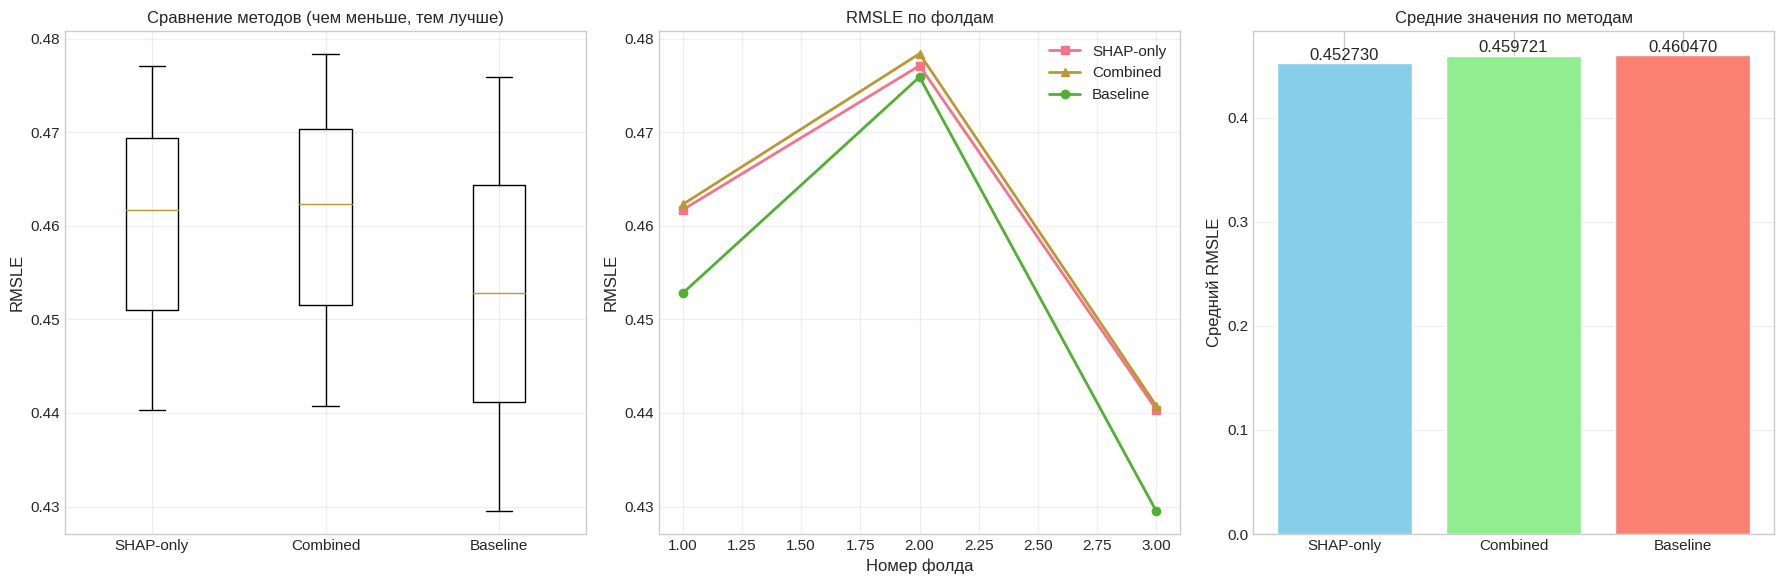

In [210]:
# ============================================================================
# ШАГ 1: КРОСС-ВАЛИДАЦИЯ С SHAP-ЭМБЕДДИНГАМИ
# ============================================================================

print("="*80)
print("ШАГ 1: КРОСС-ВАЛИДАЦИЯ С SHAP-ЭМБЕДДИНГАМИ")
print("="*80)

class SHAPEmbeddingCV:
    
    def __init__(self, base_model_type='catboost', n_splits=5):
        self.base_model_type = base_model_type
        self.n_splits = n_splits
        
    def prepare_data(self, df, sample_size=10000):
        
        df = df.copy()
        
        df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
        df['pickup_hour'] = df['pickup_datetime'].dt.hour
        df['pickup_day_of_week'] = df['pickup_datetime'].dt.dayofweek
        df['pickup_month'] = df['pickup_datetime'].dt.month
        
        def haversine(lon1, lat1, lon2, lat2):
            R = 6371
            lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
            dlon = lon2 - lon1
            dlat = lat2 - lat1
            a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
            c = 2 * np.arcsin(np.sqrt(a))
            return R * c
        
        df['distance_km'] = haversine(
            df["pickup_longitude"], 
            df["pickup_latitude"], 
            df["dropoff_longitude"], 
            df["dropoff_latitude"]
        )
        
        df['log_trip_duration'] = np.log1p(df['trip_duration'])
        
        features = [
            'pickup_longitude', 'pickup_latitude',
            'dropoff_longitude', 'dropoff_latitude',
            'passenger_count', 'pickup_hour',
            'pickup_day_of_week', 'pickup_month',
            'distance_km', 'vendor_id'
        ]
        
        df = df.dropna(subset=features + ['log_trip_duration'])
        
        if sample_size and len(df) > sample_size:
            df = df.sample(sample_size, random_state=42)
        
        X = df[features]
        y = df['log_trip_duration']
        
        return X, y, df
    
    def create_base_model(self):
        if self.base_model_type == 'catboost':
            return CatBoostRegressor(
                iterations=150,
                depth=6,
                learning_rate=0.1,
                random_state=42,
                verbose=False
            )
        elif self.base_model_type == 'random_forest':
            return RandomForestRegressor(
                n_estimators=100,
                max_depth=10,
                random_state=42,
                n_jobs=-1
            )
        else:
            return Lasso(alpha=0.001, random_state=42)
    
    def compute_shap_embeddings(self, model, X_train, X_val, background_size=100):
        
        background = shap.sample(X_train, min(background_size, len(X_train)))
        
        if isinstance(model, CatBoostRegressor):
            explainer = shap.TreeExplainer(model)
            shap_train = explainer.shap_values(X_train)
            shap_val = explainer.shap_values(X_val)
        else:
            explainer = shap.LinearExplainer(
                model,
                background,
                feature_dependence='independent'
            )
            shap_train = explainer.shap_values(X_train)
            shap_val = explainer.shap_values(X_val)
        
        return shap_train, shap_val, explainer
    
    def rmsle_score(self, y_true, y_pred):
        y_true = np.expm1(y_true)
        y_pred = np.expm1(y_pred)
        return np.sqrt(mean_squared_error(np.log1p(y_true), np.log1p(y_pred)))
    
    def run_cv(self, X, y):
        
        kf = KFold(n_splits=self.n_splits, shuffle=True, random_state=42)
        
        results = {
            'shap_only': [],
            'combined': [],
            'original': []
        }
        
        for fold, (train_idx, val_idx) in enumerate(kf.split(X)):
            print(f"\nФолд {fold + 1}/{self.n_splits}")
            
            X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
            y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
            
            print("  Обучение baseline модели...")
            baseline_model = self.create_base_model()
            baseline_model.fit(X_train, y_train)
            y_pred_baseline = baseline_model.predict(X_val)
            baseline_score = self.rmsle_score(y_val, y_pred_baseline)
            results['original'].append(baseline_score)
            
            print("  Обучение модели на SHAP-эмбеддингах...")
            shap_train, shap_val, _ = self.compute_shap_embeddings(
                baseline_model, X_train, X_val
            )
            
            model_shap = Lasso(alpha=0.001, random_state=42)
            model_shap.fit(shap_train, y_train)
            y_pred_shap = model_shap.predict(shap_val)
            shap_score = self.rmsle_score(y_val, y_pred_shap)
            results['shap_only'].append(shap_score)
            
            print("  Обучение модели на комбинированных признаках...")
            X_train_combined = np.hstack([X_train.values, shap_train])
            X_val_combined = np.hstack([X_val.values, shap_val])
            
            model_combined = Lasso(alpha=0.001, random_state=42)
            model_combined.fit(X_train_combined, y_train)
            y_pred_combined = model_combined.predict(X_val_combined)
            combined_score = self.rmsle_score(y_val, y_pred_combined)
            results['combined'].append(combined_score)
            
            print(f"    Baseline: {baseline_score:.6f}")
            print(f"    SHAP-only: {shap_score:.6f}")
            print(f"    Combined: {combined_score:.6f}")
        
        return results
    
    def analyze_results(self, results):
        
        print("\n" + "="*80)
        print("АНАЛИЗ РЕЗУЛЬТАТОВ КРОСС-ВАЛИДАЦИИ")
        print("="*80)
        
        for method, scores in results.items():
            mean_score = np.mean(scores)
            std_score = np.std(scores)
            
            if method == 'original':
                method_name = 'Baseline (исходные признаки)'
            elif method == 'shap_only':
                method_name = 'Только SHAP-эмбеддинги'
            else:
                method_name = 'Комбинированные признаки'
            
            print(f"{method_name}:")
            print(f"  Средний RMSLE: {mean_score:.6f} ± {std_score:.6f}")
            print(f"  Минимальный: {np.min(scores):.6f}")
            print(f"  Максимальный: {np.max(scores):.6f}")
        
        baseline_mean = np.mean(results['original'])
        shap_mean = np.mean(results['shap_only'])
        combined_mean = np.mean(results['combined'])
        
        print("\n" + "-"*80)
        print("СРАВНЕНИЕ МЕТОДОВ:")
        print(f"SHAP-only vs Baseline: {((baseline_mean - shap_mean) / baseline_mean * 100):.2f}% улучшения")
        print(f"Combined vs Baseline: {((baseline_mean - combined_mean) / baseline_mean * 100):.2f}% улучшения")
        print(f"Combined vs SHAP-only: {((shap_mean - combined_mean) / shap_mean * 100):.2f}% улучшения")
        
        self.visualize_results(results)
        
        return {
            'baseline_mean': baseline_mean,
            'shap_mean': shap_mean,
            'combined_mean': combined_mean
        }
    
    def visualize_results(self, results):
        
        fig, axes = plt.subplots(1, 3, figsize=(18, 6))
        
        data_to_plot = []
        labels = []
        for method, scores in results.items():
            if method == 'original':
                label = 'Baseline'
            elif method == 'shap_only':
                label = 'SHAP-only'
            else:
                label = 'Combined'
            data_to_plot.append(scores)
            labels.append(label)
        
        axes[0].boxplot(data_to_plot, labels=labels)
        axes[0].set_ylabel('RMSLE')
        axes[0].set_title('Сравнение методов (чем меньше, тем лучше)')
        axes[0].grid(True, alpha=0.3)
        
        for method, scores in results.items():
            if method == 'original':
                label = 'Baseline'
                marker = 'o'
            elif method == 'shap_only':
                label = 'SHAP-only'
                marker = 's'
            else:
                label = 'Combined'
                marker = '^'
            
            axes[1].plot(range(1, len(scores)+1), scores, marker=marker, label=label, linewidth=2)
        
        axes[1].set_xlabel('Номер фолда')
        axes[1].set_ylabel('RMSLE')
        axes[1].set_title('RMSLE по фолдам')
        axes[1].legend()
        axes[1].grid(True, alpha=0.3)
        
        means = [np.mean(results['original']), 
                np.mean(results['shap_only']), 
                np.mean(results['combined'])]
        
        bars = axes[2].bar(labels, means, color=['skyblue', 'lightgreen', 'salmon'])
        axes[2].set_ylabel('Средний RMSLE')
        axes[2].set_title('Средние значения по методам')
        axes[2].grid(True, alpha=0.3, axis='y')
        
        for bar, mean in zip(bars, means):
            axes[2].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.0001,
                       f'{mean:.6f}', ha='center', va='bottom')
        
        plt.tight_layout()
        plt.show()

print("Загрузка данных...")
train = pd.read_csv('/kaggle/input/cu-project-data/train.csv')

print("Подготовка данных...")
cv_analyzer = SHAPEmbeddingCV(base_model_type='catboost', n_splits=3)
X, y, _ = cv_analyzer.prepare_data(train, sample_size=5000)

print("Запуск кросс-валидации...")
cv_results = cv_analyzer.run_cv(X, y)
summary = cv_analyzer.analyze_results(cv_results)




ШАГ 2: SHAPLEY FLOW АНАЛИЗ
Подготовка данных для Shapley Flow анализа...
Обучение модели...
Инициализация Shapley Flow анализатора...
Построение графа взаимосвязей...
Построен граф с 10 узлами и 14 ребрами
Визуализация графа...


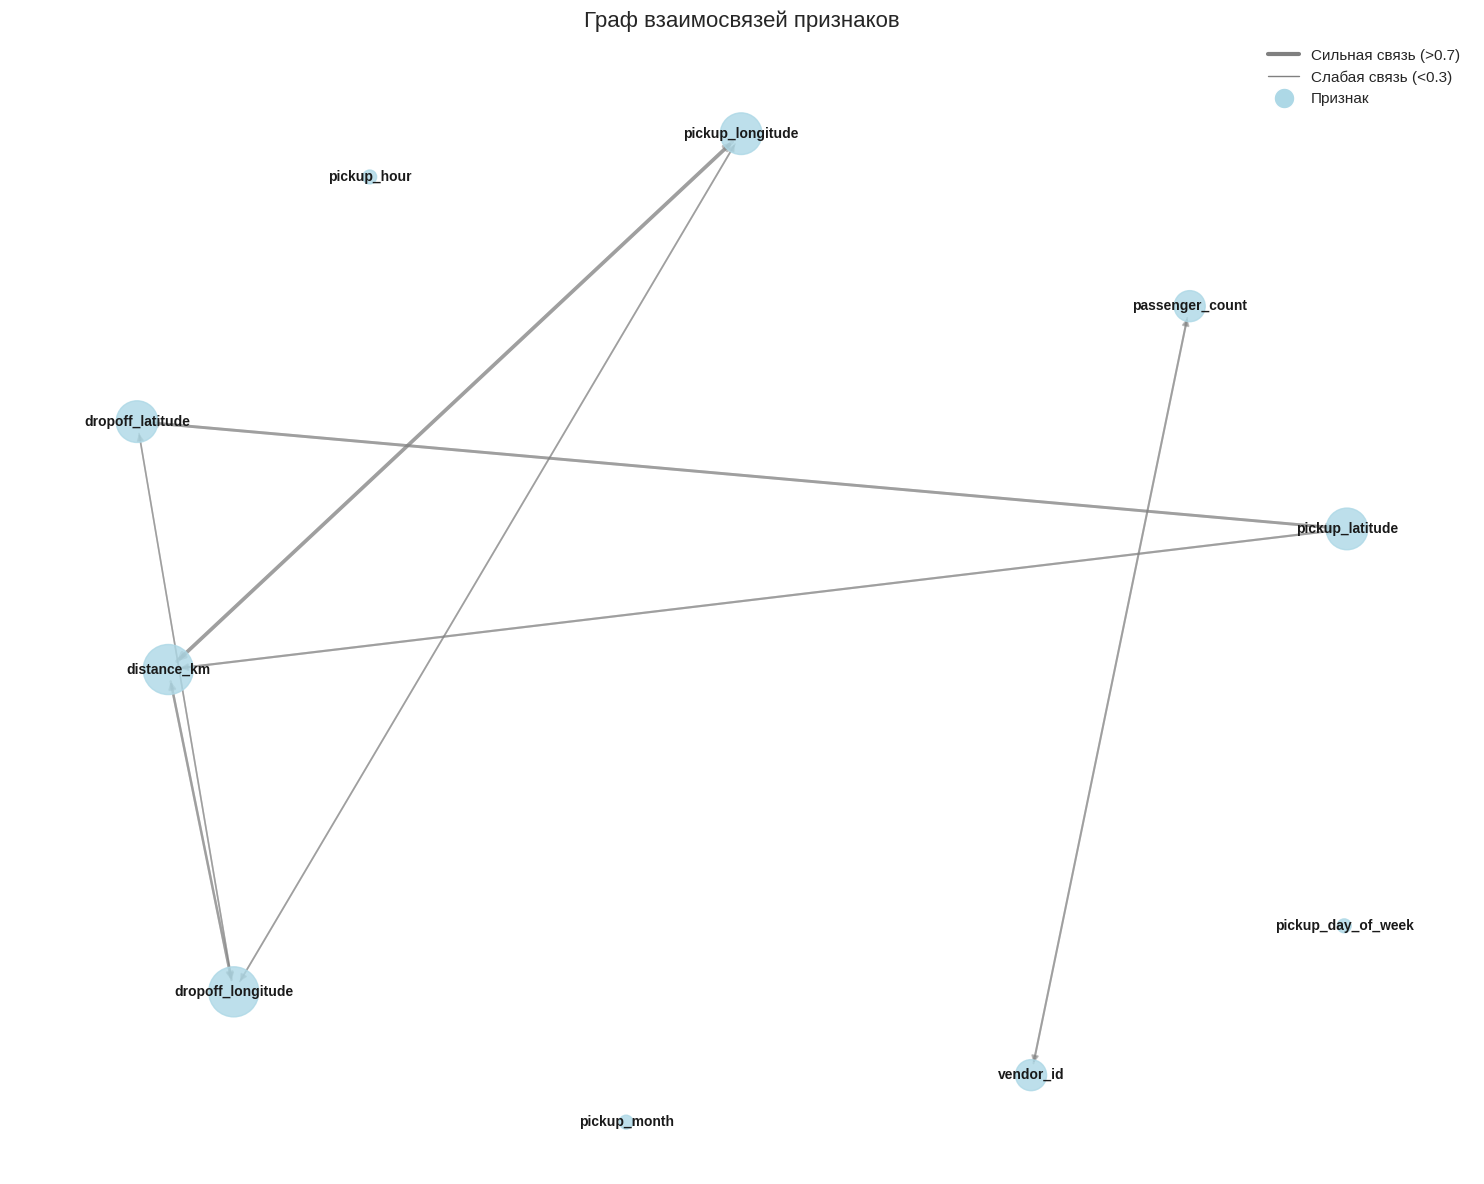

Вычисление Shapley Flow...
Анализ важности признаков...
Топ-10 признаков по Shapley Flow:
           feature  shapley_flow_importance
  pickup_longitude                 0.167468
       distance_km                 0.132867
 dropoff_longitude                 0.127381
   pickup_latitude                 0.093929
  dropoff_latitude                 0.038515
       pickup_hour                 0.009340
   passenger_count                 0.009248
         vendor_id                 0.005900
pickup_day_of_week                 0.005153
      pickup_month                 0.001450

Сравнение с обычными SHAP значениями:
Корреляция важностей: -0.3344


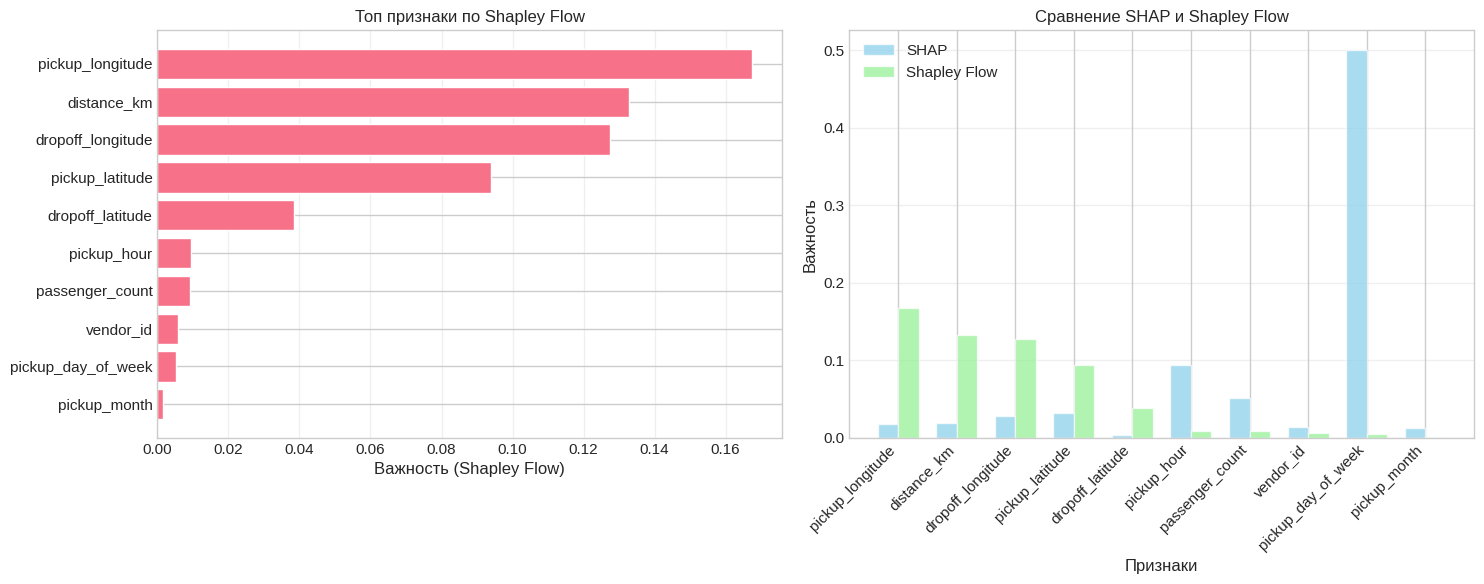

Кластеризация Shapley Flow эмбеддингов...


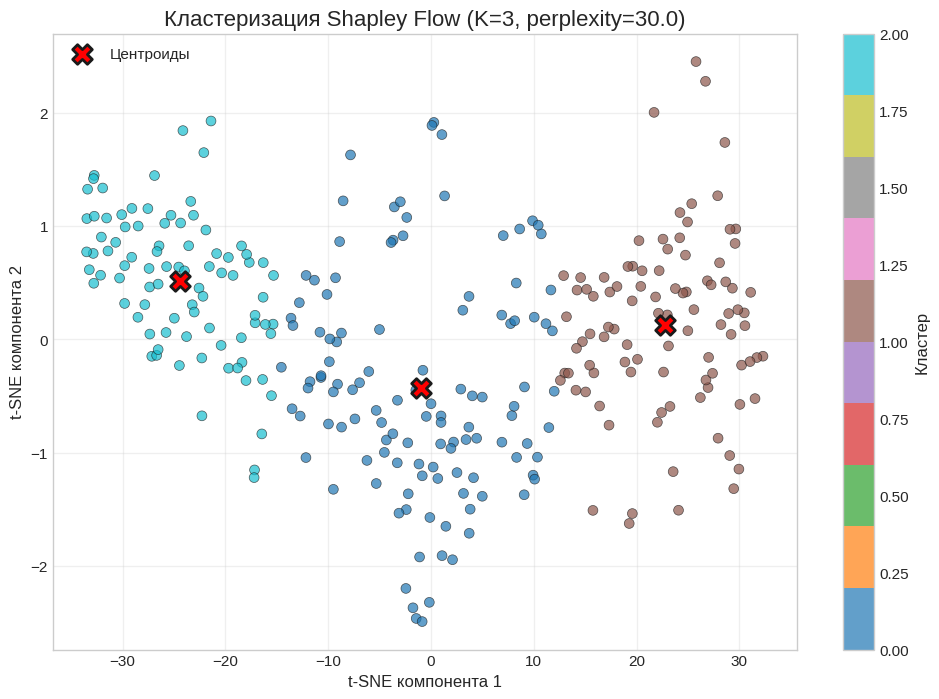


Размеры кластеров:
  Кластер 0: 118 наблюдений (39.3%)
  Кластер 1: 95 наблюдений (31.7%)
  Кластер 2: 87 наблюдений (29.0%)
Анализ характеристик кластеров...

ХАРАКТЕРИСТИКИ КЛАСТЕРОВ

Кластер 0:
  Размер: 118 (39.3%)
  Средняя длительность: 6.571 (log scale)
  Стандартное отклонение: 0.403

Кластер 1:
  Размер: 95 (31.7%)
  Средняя длительность: 5.908 (log scale)
  Стандартное отклонение: 0.632

Кластер 2:
  Размер: 87 (29.0%)
  Средняя длительность: 7.247 (log scale)
  Стандартное отклонение: 0.467


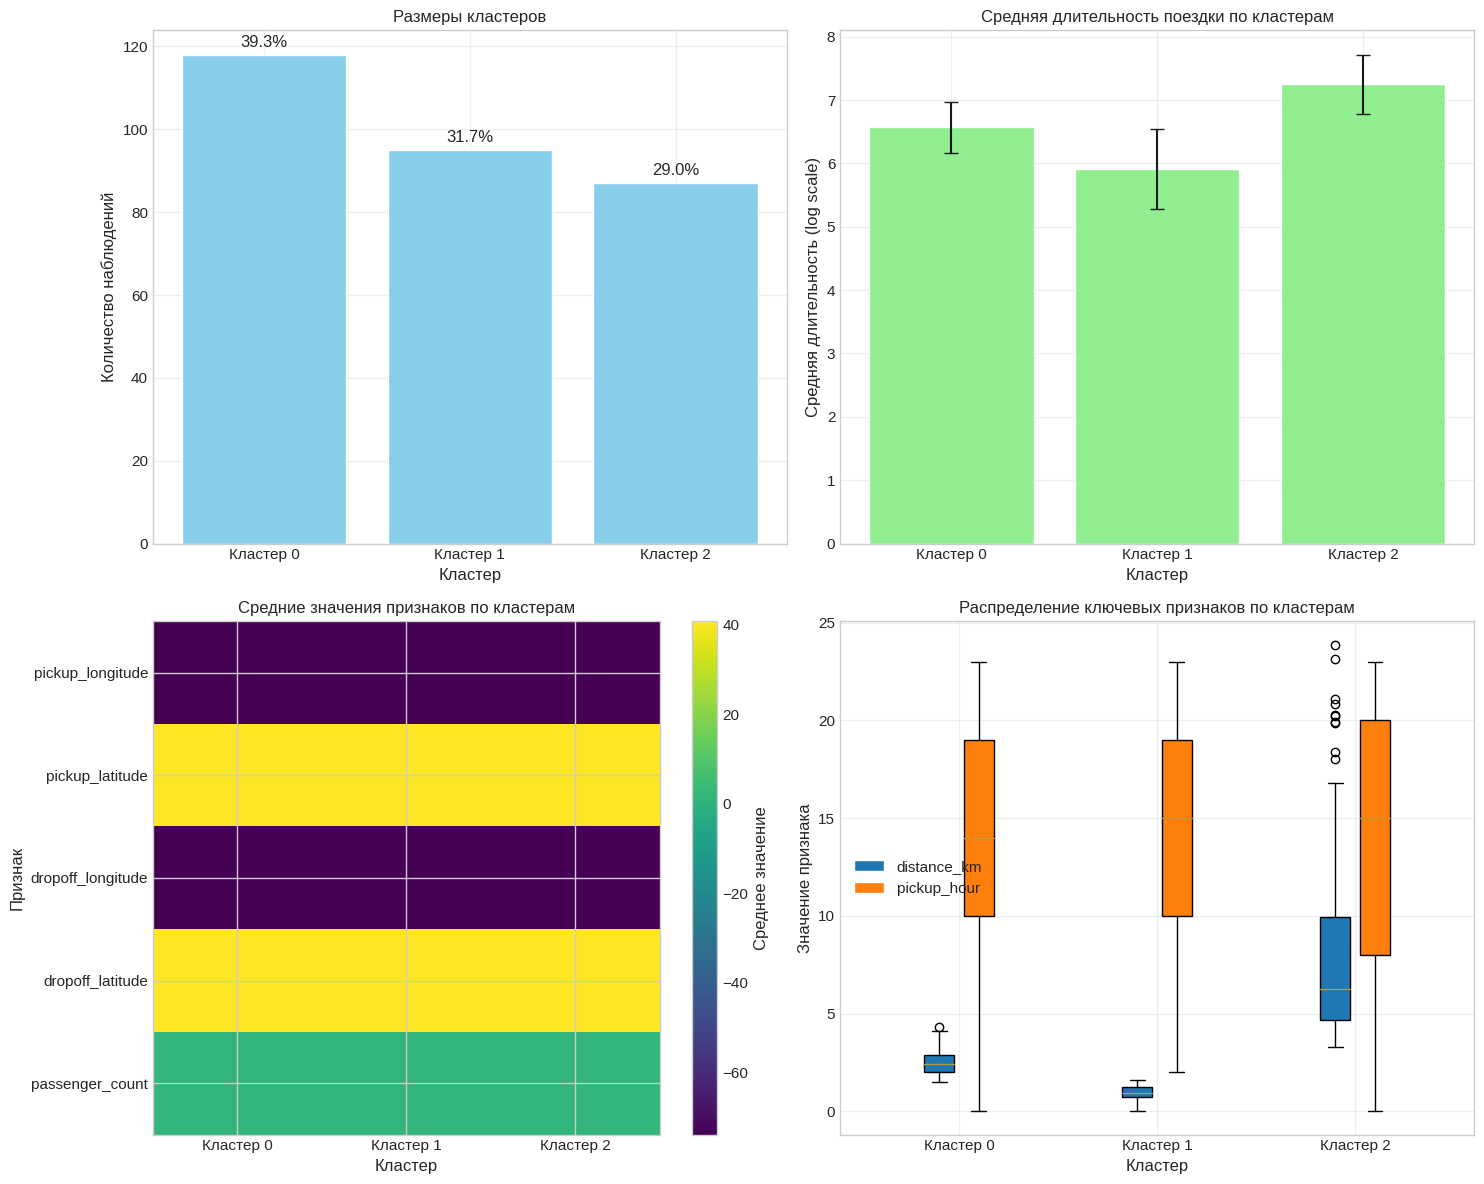

In [212]:
# ============================================================================
# ШАГ 2: SHAPLEY FLOW АНАЛИЗ
# ============================================================================

print("\n" + "="*80)
print("ШАГ 2: SHAPLEY FLOW АНАЛИЗ")
print("="*80)

class ShapleyFlowAnalyzer:    
    def __init__(self, model, feature_names):
        self.model = model
        self.feature_names = feature_names
        self.graph = nx.DiGraph()
        self.interaction_matrix = None
        
    def build_interaction_graph(self, X, method='correlation', threshold=0.3):        
        if method == 'correlation':
            corr_matrix = pd.DataFrame(X).corr().values
            
            # Строим граф
            self.graph.add_nodes_from(range(len(self.feature_names)))
            
            for i in range(len(self.feature_names)):
                for j in range(i+1, len(self.feature_names)):
                    if abs(corr_matrix[i, j]) > threshold:
                        weight = abs(corr_matrix[i, j])
                        self.graph.add_edge(i, j, weight=weight)
                        self.graph.add_edge(j, i, weight=weight)
            
            self.interaction_matrix = corr_matrix
            
        elif method == 'shap_interaction':
            explainer = shap.TreeExplainer(self.model)
            shap_interactions = explainer.shap_interaction_values(X)
            interaction_strength = np.mean(np.abs(shap_interactions), axis=0)
            
            self.graph.add_nodes_from(range(len(self.feature_names)))
            
            for i in range(len(self.feature_names)):
                for j in range(len(self.feature_names)):
                    if i != j and interaction_strength[i, j] > threshold:
                        self.graph.add_edge(i, j, weight=interaction_strength[i, j])
            
            self.interaction_matrix = interaction_strength
        
        print(f"Построен граф с {self.graph.number_of_nodes()} узлами и {self.graph.number_of_edges()} ребрами")
        return self.graph
    
    def compute_shapley_flow(self, X_sample, propagation_steps=3):        
        explainer = shap.TreeExplainer(self.model)
        shap_values = explainer.shap_values(X_sample)
        
        flow_values = np.zeros_like(shap_values)
        
        for step in range(propagation_steps):
            new_flow = np.zeros_like(flow_values)
            
            for i in range(len(self.feature_names)):
                neighbors = list(self.graph.neighbors(i))
                if not neighbors:
                    continue
                
                total_weight = sum(self.graph[i][j]['weight'] for j in neighbors)
                
                for j in neighbors:
                    weight = self.graph[i][j]['weight']
                    proportion = weight / total_weight if total_weight > 0 else 0
                    
                    if step == 0:
                        source_values = shap_values[:, i]
                    else:
                        source_values = flow_values[:, i]
                    
                    new_flow[:, j] += source_values * proportion
            
            if step > 0:
                flow_values = 0.7 * flow_values + 0.3 * new_flow
            else:
                flow_values = new_flow
        
        flow_values += 0.1 * shap_values
        
        return flow_values
    
    def visualize_graph(self, max_nodes=20):
        
        if len(self.feature_names) > max_nodes:
            print(f"Граф слишком большой, показываю топ-{max_nodes} признаков...")
            degrees = dict(self.graph.degree())
            top_nodes = sorted(degrees.items(), key=lambda x: x[1], reverse=True)[:max_nodes]
            top_indices = [node[0] for node in top_nodes]
            
            subgraph = self.graph.subgraph(top_indices)
            labels = {i: self.feature_names[i] for i in top_indices}
        else:
            subgraph = self.graph
            labels = {i: name for i, name in enumerate(self.feature_names)}
        
        plt.figure(figsize=(15, 12))
        
        pos = nx.spring_layout(subgraph, seed=42, k=2)
        
        node_sizes = [subgraph.degree(node) * 200 + 100 for node in subgraph.nodes()]
        
        nx.draw_networkx_nodes(
            subgraph, pos,
            node_color='lightblue',
            node_size=node_sizes,
            alpha=0.8
        )
        
        edges = subgraph.edges()
        weights = [subgraph[u][v]['weight'] for u, v in edges]
        
        nx.draw_networkx_edges(
            subgraph, pos,
            edgelist=edges,
            width=[w * 5 for w in weights],
            alpha=0.5,
            edge_color='gray'
        )
        
        nx.draw_networkx_labels(
            subgraph, pos, labels,
            font_size=10,
            font_weight='bold'
        )
        
        plt.title("Граф взаимосвязей признаков", fontsize=16)
        plt.axis('off')
        
        from matplotlib.lines import Line2D
        legend_elements = [
            Line2D([0], [0], color='gray', lw=3, label='Сильная связь (>0.7)'),
            Line2D([0], [0], color='gray', lw=1, label='Слабая связь (<0.3)'),
            Line2D([0], [0], marker='o', color='w', markerfacecolor='lightblue',
                  markersize=15, label='Признак')
        ]
        
        plt.legend(handles=legend_elements, loc='upper right')
        plt.tight_layout()
        plt.show()
    
    def analyze_flow_importance(self, flow_values, X_original):
        
        abs_flow = np.abs(flow_values)
        
        mean_importance = np.mean(abs_flow, axis=0)
        
        importance_df = pd.DataFrame({
            'feature': self.feature_names,
            'shapley_flow_importance': mean_importance
        }).sort_values('shapley_flow_importance', ascending=False)
        
        print("Топ-10 признаков по Shapley Flow:")
        print(importance_df.head(10).to_string(index=False))
        
        explainer = shap.TreeExplainer(self.model)
        shap_values = explainer.shap_values(X_original)
        shap_importance = np.mean(np.abs(shap_values), axis=0)
        
        importance_df['shap_importance'] = shap_importance
        importance_df['difference'] = importance_df['shapley_flow_importance'] - importance_df['shap_importance']
        
        print("\nСравнение с обычными SHAP значениями:")
        print(f"Корреляция важностей: {importance_df['shapley_flow_importance'].corr(importance_df['shap_importance']):.4f}")
        
        fig, axes = plt.subplots(1, 2, figsize=(15, 6))
        
        top_n = min(10, len(importance_df))
        top_features = importance_df.head(top_n)
        
        axes[0].barh(range(top_n), top_features['shapley_flow_importance'][::-1])
        axes[0].set_yticks(range(top_n))
        axes[0].set_yticklabels(top_features['feature'][::-1])
        axes[0].set_xlabel('Важность (Shapley Flow)')
        axes[0].set_title('Топ признаки по Shapley Flow')
        axes[0].grid(True, alpha=0.3, axis='x')
        
        x = np.arange(top_n)
        width = 0.35
        
        axes[1].bar(x - width/2, top_features['shap_importance'], width, 
                   label='SHAP', color='skyblue', alpha=0.7)
        axes[1].bar(x + width/2, top_features['shapley_flow_importance'], width, 
                   label='Shapley Flow', color='lightgreen', alpha=0.7)
        
        axes[1].set_xlabel('Признаки')
        axes[1].set_ylabel('Важность')
        axes[1].set_title('Сравнение SHAP и Shapley Flow')
        axes[1].set_xticks(x)
        axes[1].set_xticklabels(top_features['feature'], rotation=45, ha='right')
        axes[1].legend()
        axes[1].grid(True, alpha=0.3, axis='y')
        
        plt.tight_layout()
        plt.show()
        
        return importance_df
    
    def cluster_flow_embeddings(self, flow_values, n_clusters=3):
        n_samples = flow_values.shape[0]
    
        base_perplexity = 30
        if n_samples <= 3:
            perplexity = max(1, n_samples - 1)
        else:
            perplexity = min(base_perplexity, (n_samples - 1) / 3)
    
        tsne = TSNE(
            n_components=2,
            random_state=42,
            perplexity=perplexity
        )
        flow_2d = tsne.fit_transform(flow_values)
    
        kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
        clusters = kmeans.fit_predict(flow_values)
    
        plt.figure(figsize=(12, 8))
    
        scatter = plt.scatter(
            flow_2d[:, 0], flow_2d[:, 1],
            c=clusters, cmap='tab10',
            alpha=0.7, s=50,
            edgecolors='k', linewidths=0.5
        )
    
        centroids_2d = []
        for cid in range(n_clusters):
            mask = clusters == cid
            if mask.sum() > 0:
                centroids_2d.append(flow_2d[mask].mean(axis=0))
            else:
                centroids_2d.append(np.array([np.nan, np.nan]))
        centroids_2d = np.array(centroids_2d)
    
        plt.scatter(
            centroids_2d[:, 0], centroids_2d[:, 1],
            c='red', marker='X', s=200,
            edgecolors='k', linewidths=2,
            label='Центроиды'
        )
    
        plt.colorbar(scatter, label='Кластер')
        plt.title(f'Кластеризация Shapley Flow (K={n_clusters}, perplexity={perplexity:.1f})', fontsize=16)
        plt.xlabel('t-SNE компонента 1')
        plt.ylabel('t-SNE компонента 2')
        plt.grid(True, alpha=0.3)
        plt.legend()
        plt.show()
    
        unique, counts = np.unique(clusters, return_counts=True)
        print(f"\nРазмеры кластеров:")
        for cluster_id, count in zip(unique, counts):
            percentage = count / len(clusters) * 100
            print(f"  Кластер {cluster_id}: {count} наблюдений ({percentage:.1f}%)")
    
        return clusters, flow_2d

    
    def analyze_cluster_characteristics(self, clusters, X_original, y_original=None):
        
        unique_clusters = np.unique(clusters)
        
        print("\n" + "="*80)
        print("ХАРАКТЕРИСТИКИ КЛАСТЕРОВ")
        print("="*80)
        
        cluster_stats = []
        
        for cluster_id in unique_clusters:
            mask = clusters == cluster_id
            cluster_data = X_original[mask]
            
            stats = {
                'cluster': cluster_id,
                'size': len(cluster_data),
                'percentage': len(cluster_data) / len(X_original) * 100
            }
            
            for i, feature in enumerate(self.feature_names[:5]):
                stats[f'mean_{feature}'] = cluster_data[:, i].mean()
                stats[f'std_{feature}'] = cluster_data[:, i].std()
            
            if y_original is not None:
                cluster_y = y_original[mask]
                stats['mean_target'] = cluster_y.mean()
                stats['std_target'] = cluster_y.std()
            
            cluster_stats.append(stats)
            
            print(f"\nКластер {cluster_id}:")
            print(f"  Размер: {stats['size']} ({stats['percentage']:.1f}%)")
            
            if 'mean_target' in stats:
                print(f"  Средняя длительность: {stats['mean_target']:.3f} (log scale)")
                print(f"  Стандартное отклонение: {stats['std_target']:.3f}")
        
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        
        sizes = [s['size'] for s in cluster_stats]
        percentages = [s['percentage'] for s in cluster_stats]
        
        bars = axes[0, 0].bar(range(len(sizes)), sizes, color='skyblue')
        axes[0, 0].set_xlabel('Кластер')
        axes[0, 0].set_ylabel('Количество наблюдений')
        axes[0, 0].set_title('Размеры кластеров')
        axes[0, 0].set_xticks(range(len(sizes)))
        axes[0, 0].set_xticklabels([f'Кластер {i}' for i in unique_clusters])
        axes[0, 0].grid(True, alpha=0.3)
        
        for bar, percentage in zip(bars, percentages):
            height = bar.get_height()
            axes[0, 0].text(bar.get_x() + bar.get_width()/2, height + max(sizes)*0.01,
                           f'{percentage:.1f}%', ha='center', va='bottom')
        
        if 'mean_target' in cluster_stats[0]:
            target_means = [s['mean_target'] for s in cluster_stats]
            target_stds = [s['std_target'] for s in cluster_stats]
            
            axes[0, 1].bar(range(len(target_means)), target_means, 
                          yerr=target_stds, capsize=5, color='lightgreen')
            axes[0, 1].set_xlabel('Кластер')
            axes[0, 1].set_ylabel('Средняя длительность (log scale)')
            axes[0, 1].set_title('Средняя длительность поездки по кластерам')
            axes[0, 1].set_xticks(range(len(target_means)))
            axes[0, 1].set_xticklabels([f'Кластер {i}' for i in unique_clusters])
            axes[0, 1].grid(True, alpha=0.3)
        
        if len(self.feature_names) > 1:
            feature_means = np.array([[s[f'mean_{self.feature_names[i]}'] 
                                      for i in range(min(5, len(self.feature_names)))] 
                                     for s in cluster_stats])
            
            im = axes[1, 0].imshow(feature_means.T, aspect='auto', cmap='viridis')
            axes[1, 0].set_xlabel('Кластер')
            axes[1, 0].set_ylabel('Признак')
            axes[1, 0].set_title('Средние значения признаков по кластерам')
            axes[1, 0].set_xticks(range(len(unique_clusters)))
            axes[1, 0].set_xticklabels([f'Кластер {i}' for i in unique_clusters])
            axes[1, 0].set_yticks(range(min(5, len(self.feature_names))))
            axes[1, 0].set_yticklabels(self.feature_names[:5])
            
            plt.colorbar(im, ax=axes[1, 0], label='Среднее значение')
        
        key_features = ['distance_km', 'pickup_hour']
        feature_indices = []
        feature_names_clean = []
        
        for feature in key_features:
            if feature in self.feature_names:
                idx = self.feature_names.index(feature)
                feature_indices.append(idx)
                feature_names_clean.append(feature)
        
        if feature_indices:
            box_data = []
            for cluster_id in unique_clusters:
                mask = clusters == cluster_id
                cluster_values = []
                for idx in feature_indices:
                    cluster_values.append(X_original[mask][:, idx])
                box_data.append(cluster_values)
            
            box_data = list(map(list, zip(*box_data)))
            
            for i, (values, feature_name) in enumerate(zip(box_data, feature_names_clean)):
                positions = np.arange(len(unique_clusters)) + i * 0.2
                bplot = axes[1, 1].boxplot(values, positions=positions, 
                                          widths=0.15, patch_artist=True)
                
                for patch in bplot['boxes']:
                    patch.set_facecolor(plt.cm.tab10(i))
            
            axes[1, 1].set_xlabel('Кластер')
            axes[1, 1].set_ylabel('Значение признака')
            axes[1, 1].set_title('Распределение ключевых признаков по кластерам')
            axes[1, 1].set_xticks(np.arange(len(unique_clusters)) + 0.1)
            axes[1, 1].set_xticklabels([f'Кластер {i}' for i in unique_clusters])
            axes[1, 1].legend([plt.Rectangle((0,0),1,1, fc=plt.cm.tab10(i)) 
                              for i in range(len(feature_names_clean))], 
                             feature_names_clean)
            axes[1, 1].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        return cluster_stats

print("Подготовка данных для Shapley Flow анализа...")
sample_size = 2000
X_sample, y_sample, _ = cv_analyzer.prepare_data(train, sample_size=sample_size)

print("Обучение модели...")
model = CatBoostRegressor(
    iterations=100,
    depth=5,
    learning_rate=0.1,
    random_state=42,
    verbose=False
)
model.fit(X_sample, y_sample)

print("Инициализация Shapley Flow анализатора...")
flow_analyzer = ShapleyFlowAnalyzer(model, X_sample.columns.tolist())

print("Построение графа взаимосвязей...")
graph = flow_analyzer.build_interaction_graph(
    X_sample.values,
    method='correlation',
    threshold=0.2
)

print("Визуализация графа...")
flow_analyzer.visualize_graph(max_nodes=15)

print("Вычисление Shapley Flow...")
n_samples_for_flow = 300
X_flow_sample = X_sample.values[:n_samples_for_flow]
flow_values = flow_analyzer.compute_shapley_flow(
    X_flow_sample,
    propagation_steps=2
)

print("Анализ важности признаков...")
importance_df = flow_analyzer.analyze_flow_importance(flow_values, X_flow_sample)

print("Кластеризация Shapley Flow эмбеддингов...")
clusters, flow_2d = flow_analyzer.cluster_flow_embeddings(flow_values, n_clusters=3)

print("Анализ характеристик кластеров...")
cluster_stats = flow_analyzer.analyze_cluster_characteristics(
    clusters,
    X_flow_sample,
    y_sample.values[:n_samples_for_flow] if y_sample is not None else None
)



ШАГ 3: ОЦЕНКА РЕЗУЛЬТАТОВ
Подготовка данных для оценки...
Обучение моделей для сравнения...

Сравнение методов...

Сравнение качества моделей:
--------------------------------------------------------------------------------
Baseline CatBoost: RMSLE = 0.462743
Lasso на SHAP: RMSLE = 0.464481


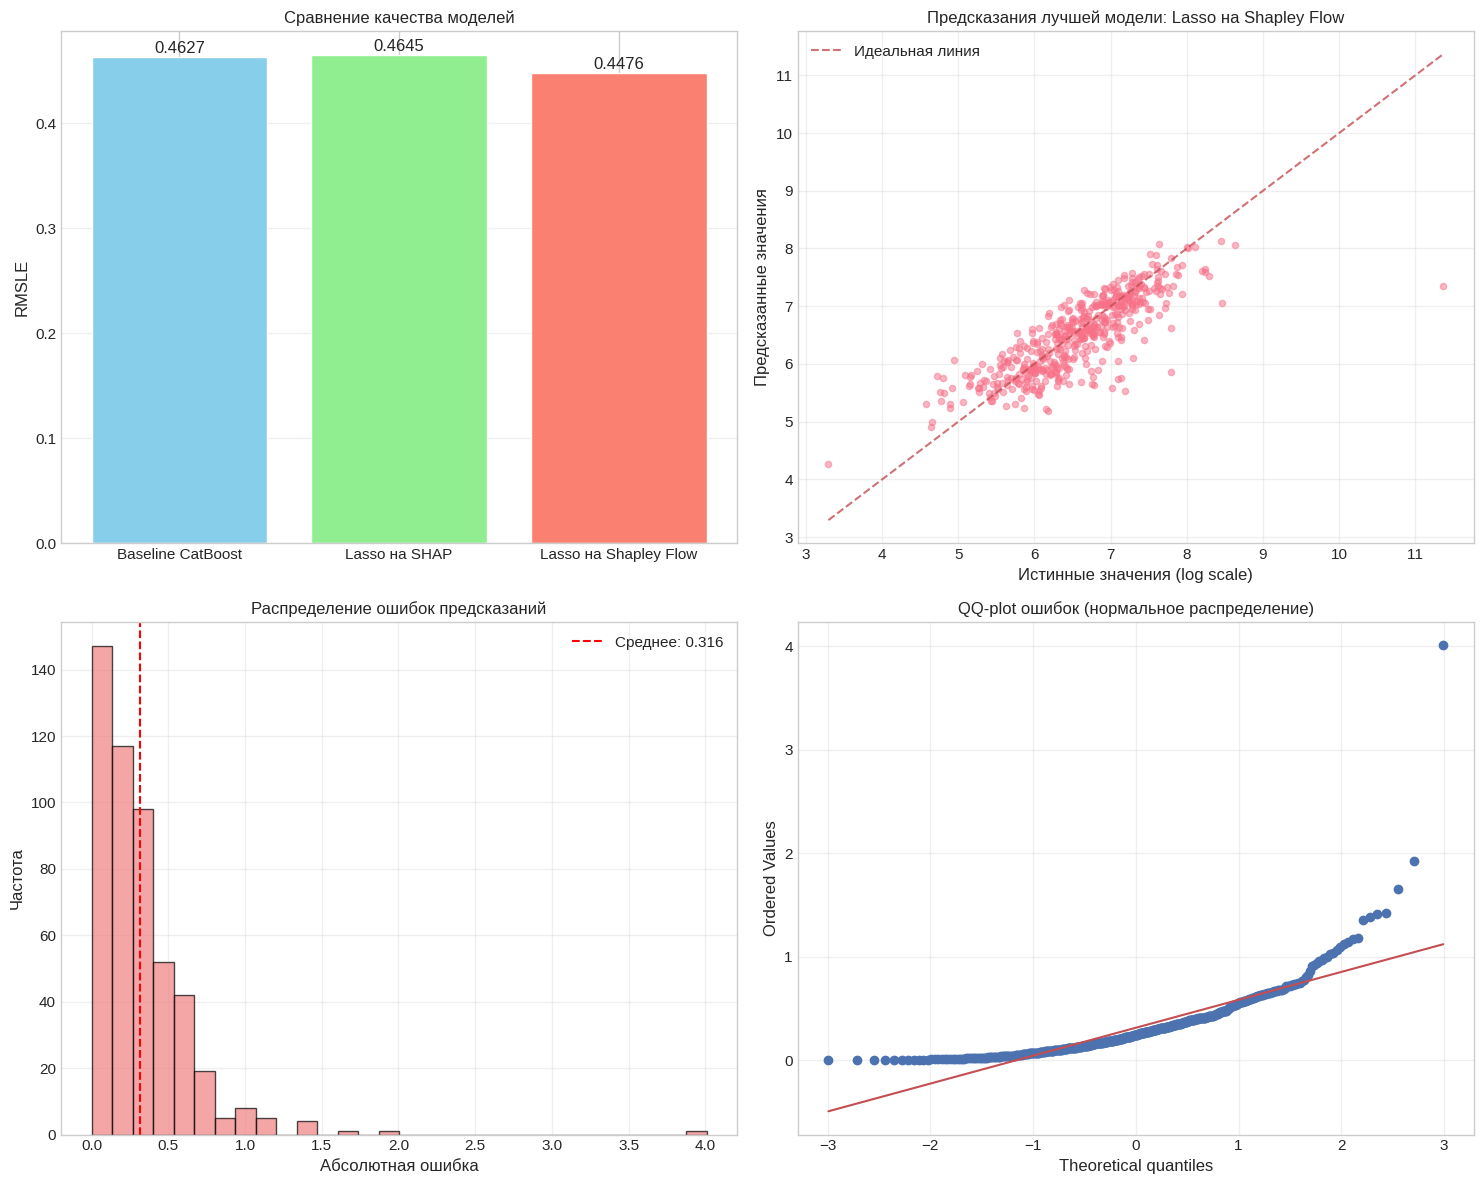


Анализ сдвигов в данных...

Анализ сдвигов в данных:
--------------------------------------------------------------------------------

Признак: pickup_longitude
  Тест KS: статистика=0.0480, p-value=0.6126
  Разница средних: 0.0012
  Отношение std: 0.9679
  Сдвиг: НЕТ

Признак: pickup_latitude
  Тест KS: статистика=0.0420, p-value=0.7704
  Разница средних: 0.0012
  Отношение std: 0.9521
  Сдвиг: НЕТ

Признак: dropoff_longitude
  Тест KS: статистика=0.0740, p-value=0.1294
  Разница средних: 0.0032
  Отношение std: 0.8599
  Сдвиг: НЕТ

Признак: dropoff_latitude
  Тест KS: статистика=0.0540, p-value=0.4599
  Разница средних: 0.0007
  Отношение std: 0.8086
  Сдвиг: НЕТ

Признак: passenger_count
  Тест KS: статистика=0.0200, p-value=1.0000
  Разница средних: 0.0100
  Отношение std: 0.9782
  Сдвиг: НЕТ


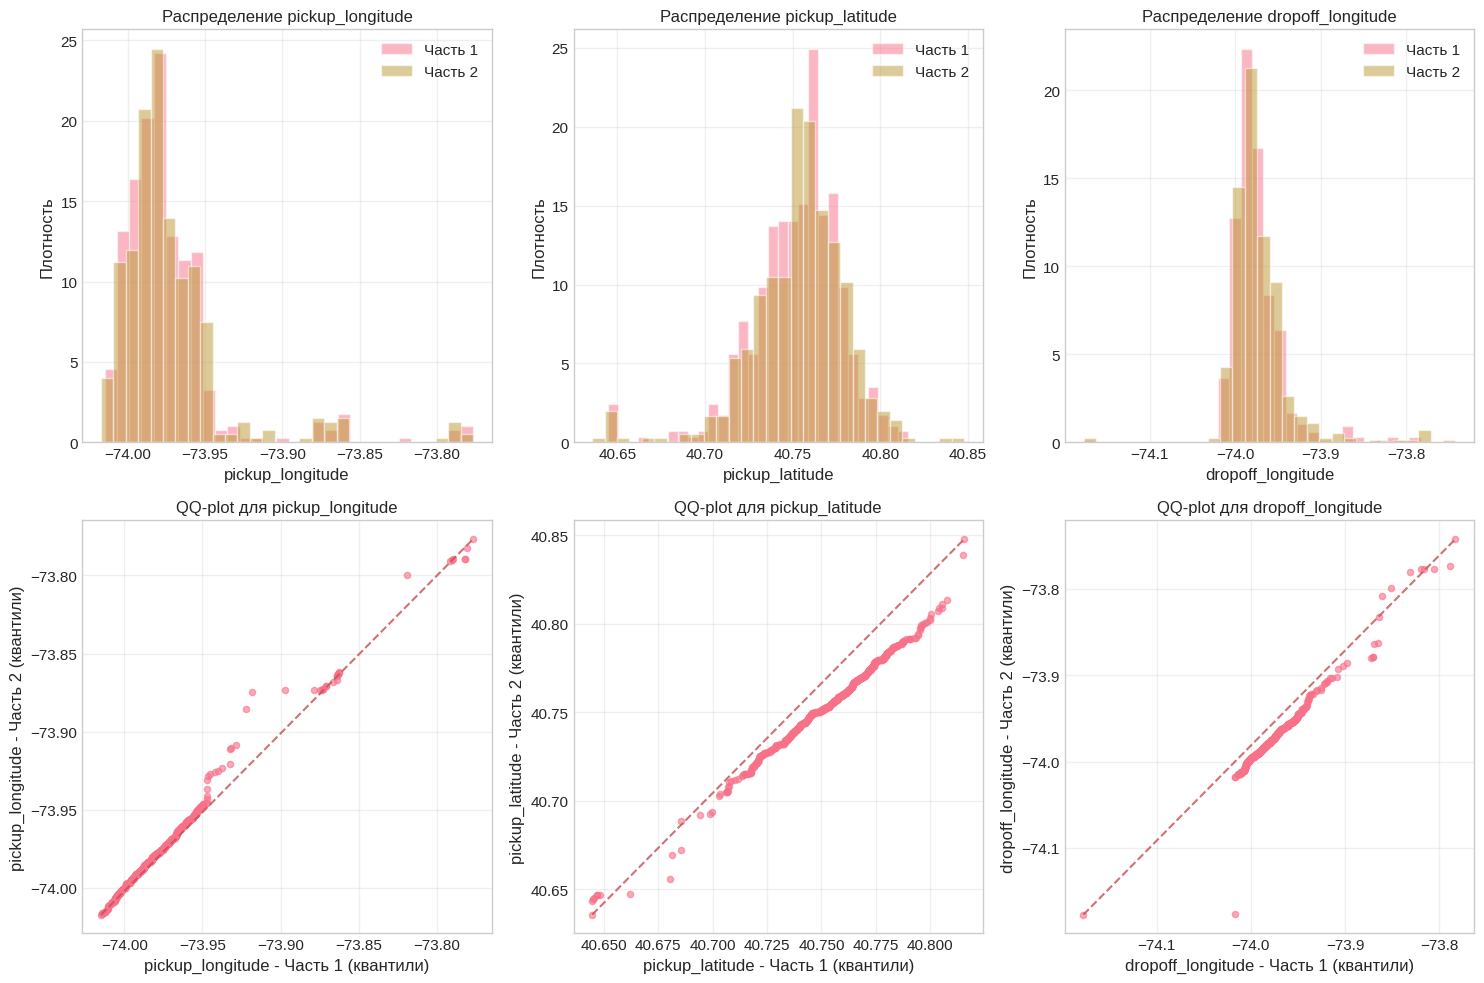


Оценка изменений в кластерах...

Оценка изменений в структуре кластеров:
--------------------------------------------------------------------------------

Исходные признаки vs SHAP:
  Adjusted Rand Index: 0.0202
  Normalized Mutual Info: 0.0353
Низкая согласованность

Исходные признаки vs Shapley Flow:
  Adjusted Rand Index: 0.0264
  Normalized Mutual Info: 0.0411
Низкая согласованность

SHAP vs Shapley Flow:
  Adjusted Rand Index: 0.8101
  Normalized Mutual Info: 0.7827
Высокая согласованность


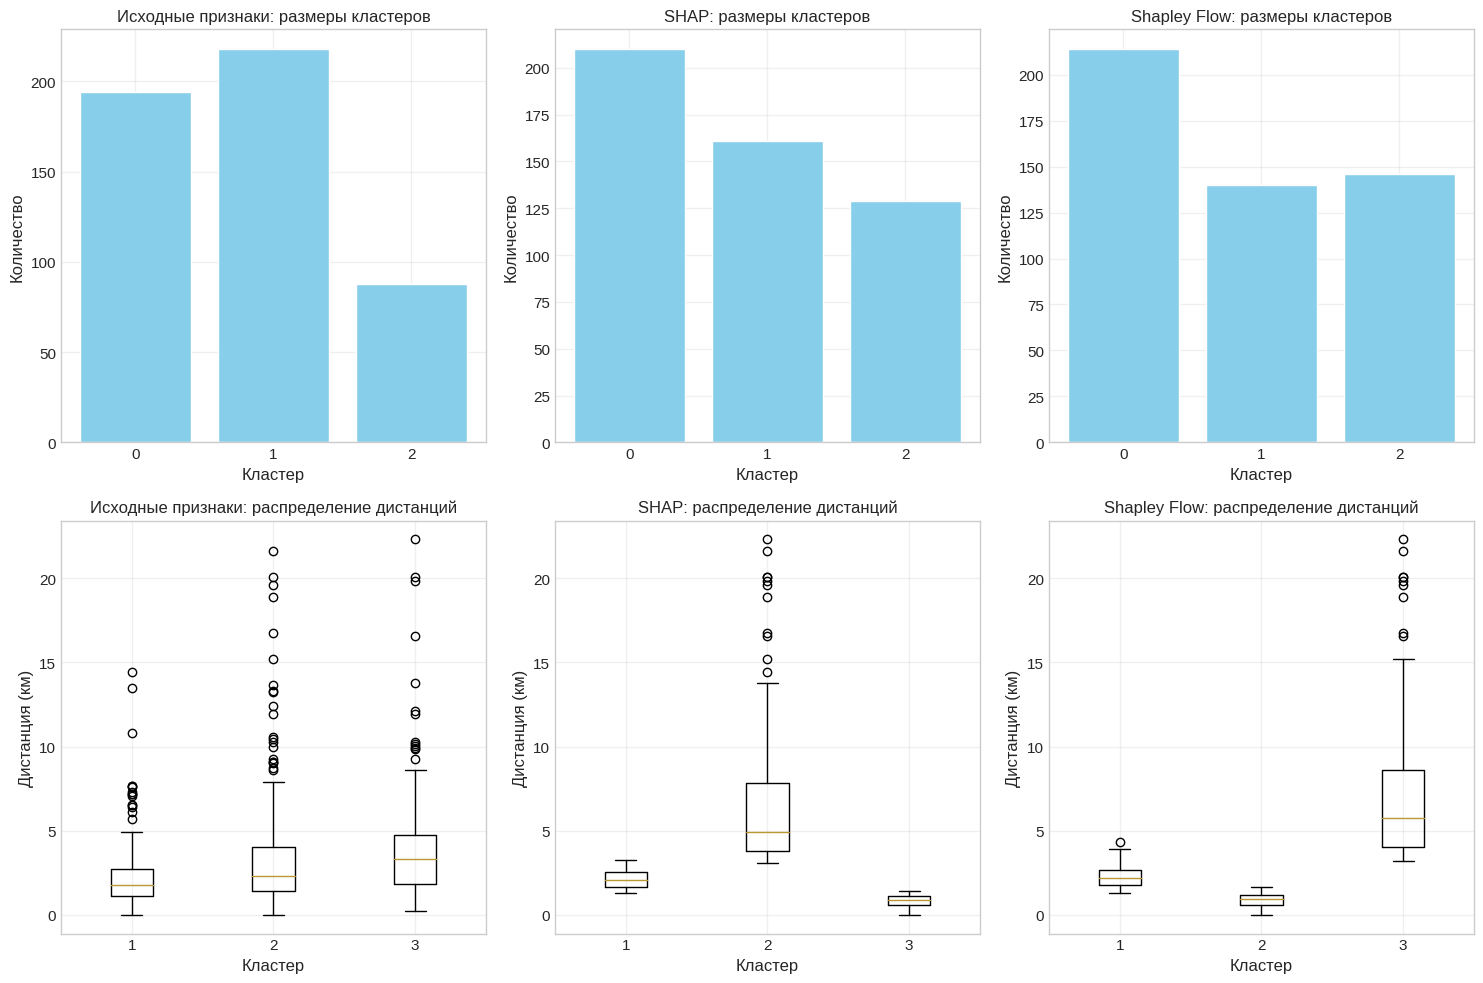

In [213]:
# ============================================================================
# ШАГ 3: ОЦЕНКА РЕЗУЛЬТАТОВ
# ============================================================================

print("\n" + "="*80)
print("ШАГ 3: ОЦЕНКА РЕЗУЛЬТАТОВ")
print("="*80)

class ResultsEvaluator:
    
    def __init__(self):
        self.results = {}
    
    def compare_methods(self, X_test, y_test, models_dict):
        
        print("\nСравнение качества моделей:")
        print("-"*80)
        
        results = {}
        
        for method_name, model in models_dict.items():
            try:
                if 'SHAP' in method_name or 'Flow' in method_name:
                    if 'SHAP' in method_name:
                        explainer = shap.TreeExplainer(models_dict['Baseline CatBoost'])
                        X_test_transformed = explainer.shap_values(X_test)
                    elif 'Flow' in method_name:
                        X_test_transformed = flow_analyzer.compute_shapley_flow(X_test.values[:500])
                        y_test_trimmed = y_test.iloc[:500]
                        y_pred = model.predict(X_test_transformed)
                        rmsle = cv_analyzer.rmsle_score(y_test_trimmed, y_pred)
                        results[method_name] = {
                            'rmsle': rmsle,
                            'predictions': y_pred
                        }
                        continue
                else:
                    X_test_transformed = X_test
                
                y_pred = model.predict(X_test_transformed)
                rmsle = cv_analyzer.rmsle_score(y_test, y_pred)
                results[method_name] = {
                    'rmsle': rmsle,
                    'predictions': y_pred
                }
                
                print(f"{method_name}: RMSLE = {rmsle:.6f}")
            except Exception as e:
                print(f"Ошибка для метода {method_name}: {e}")
        
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        
        methods = list(results.keys())
        rmsle_values = [results[m]['rmsle'] for m in methods]
        
        if methods:
            bars = axes[0, 0].bar(methods, rmsle_values, color=['skyblue', 'lightgreen', 'salmon', 'gold'][:len(methods)])
            axes[0, 0].set_ylabel('RMSLE')
            axes[0, 0].set_title('Сравнение качества моделей')
            axes[0, 0].grid(True, alpha=0.3, axis='y')
            
            for bar, value in zip(bars, rmsle_values):
                axes[0, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001,
                               f'{value:.4f}', ha='center', va='bottom')
        
        if results:
            best_method = min(results, key=lambda x: results[x]['rmsle'])
            y_pred_best = results[best_method]['predictions']
            y_test_actual = y_test.iloc[:len(y_pred_best)] if len(y_pred_best) < len(y_test) else y_test
            
            axes[0, 1].scatter(y_test_actual, y_pred_best, alpha=0.5, s=20)
            axes[0, 1].plot([y_test_actual.min(), y_test_actual.max()], 
                           [y_test_actual.min(), y_test_actual.max()], 
                           'r--', alpha=0.8, label='Идеальная линия')
            axes[0, 1].set_xlabel('Истинные значения (log scale)')
            axes[0, 1].set_ylabel('Предсказанные значения')
            axes[0, 1].set_title(f'Предсказания лучшей модели: {best_method}')
            axes[0, 1].legend()
            axes[0, 1].grid(True, alpha=0.3)
        
        if results and best_method in results:
            errors = np.abs(y_test_actual - y_pred_best)
            
            axes[1, 0].hist(errors, bins=30, alpha=0.7, color='lightcoral', edgecolor='black')
            axes[1, 0].set_xlabel('Абсолютная ошибка')
            axes[1, 0].set_ylabel('Частота')
            axes[1, 0].set_title('Распределение ошибок предсказаний')
            axes[1, 0].axvline(errors.mean(), color='red', linestyle='--', 
                              label=f'Среднее: {errors.mean():.3f}')
            axes[1, 0].legend()
            axes[1, 0].grid(True, alpha=0.3)
        
        if results and best_method in results:
            stats.probplot(errors, dist="norm", plot=axes[1, 1])
            axes[1, 1].set_title('QQ-plot ошибок (нормальное распределение)')
            axes[1, 1].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        return results
    
    def analyze_data_shifts(self, X_part1, X_part2, feature_names):
        print("\nАнализ сдвигов в данных:")
        print("-"*80)
        
        from scipy.stats import ks_2samp
        
        shift_results = {}
        
        for i, feature in enumerate(feature_names[:5]):
            data1 = X_part1[:, i]
            data2 = X_part2[:, i]
            
            ks_stat, ks_p = ks_2samp(data1, data2)
            
            mean_diff = abs(data1.mean() - data2.mean())
            std_ratio = data1.std() / data2.std() if data2.std() > 0 else np.inf
            
            shift_results[feature] = {
                'ks_statistic': ks_stat,
                'ks_p_value': ks_p,
                'mean_difference': mean_diff,
                'std_ratio': std_ratio,
                'has_shift': ks_p < 0.05
            }
            
            print(f"\nПризнак: {feature}")
            print(f"  Тест KS: статистика={ks_stat:.4f}, p-value={ks_p:.4f}")
            print(f"  Разница средних: {mean_diff:.4f}")
            print(f"  Отношение std: {std_ratio:.4f}")
            print(f"  Сдвиг: {'ДА' if ks_p < 0.05 else 'НЕТ'}")
        
        fig, axes = plt.subplots(2, 3, figsize=(15, 10))
        
        for i, feature in enumerate(feature_names[:3]):
            data1 = X_part1[:, i]
            data2 = X_part2[:, i]
            
            axes[0, i].hist(data1, alpha=0.5, bins=30, density=True, label='Часть 1')
            axes[0, i].hist(data2, alpha=0.5, bins=30, density=True, label='Часть 2')
            axes[0, i].set_xlabel(feature)
            axes[0, i].set_ylabel('Плотность')
            axes[0, i].set_title(f'Распределение {feature}')
            axes[0, i].legend()
            axes[0, i].grid(True, alpha=0.3)
            
            sorted1 = np.sort(data1)
            sorted2 = np.sort(data2)
            percentiles = np.linspace(0, 100, min(len(sorted1), len(sorted2)))
            
            axes[1, i].scatter(
                np.percentile(sorted1, percentiles),
                np.percentile(sorted2, percentiles),
                alpha=0.6, s=20
            )
            axes[1, i].plot([sorted1.min(), sorted1.max()], 
                           [sorted2.min(), sorted2.max()], 
                           'r--', alpha=0.8)
            axes[1, i].set_xlabel(f'{feature} - Часть 1 (квантили)')
            axes[1, i].set_ylabel(f'{feature} - Часть 2 (квантили)')
            axes[1, i].set_title(f'QQ-plot для {feature}')
            axes[1, i].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        return shift_results
    
    def evaluate_cluster_changes(self, clusters_dict, X_original):
        
        from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
        
        print("\nОценка изменений в структуре кластеров:")
        print("-"*80)
        
        cluster_methods = list(clusters_dict.keys())
        
        comparison_results = []
        
        for i in range(len(cluster_methods)):
            for j in range(i+1, len(cluster_methods)):
                method1 = cluster_methods[i]
                method2 = cluster_methods[j]
                
                clusters1 = clusters_dict[method1]
                clusters2 = clusters_dict[method2]
                
                if len(clusters1) != len(clusters2):
                    min_len = min(len(clusters1), len(clusters2))
                    clusters1 = clusters1[:min_len]
                    clusters2 = clusters2[:min_len]
                
                ari = adjusted_rand_score(clusters1, clusters2)
                nmi = normalized_mutual_info_score(clusters1, clusters2)
                
                comparison_results.append({
                    'methods': f'{method1} vs {method2}',
                    'ari': ari,
                    'nmi': nmi
                })
                
                print(f"\n{method1} vs {method2}:")
                print(f"  Adjusted Rand Index: {ari:.4f}")
                print(f"  Normalized Mutual Info: {nmi:.4f}")
                
                if ari < 0.3:
                    print("Низкая согласованность")
                elif ari < 0.6:
                    print("Умеренная согласованность")
                else:
                    print("Высокая согласованность")
        
        fig, axes = plt.subplots(2, 3, figsize=(15, 10))
        
        for idx, (method, clusters) in enumerate(clusters_dict.items()):
            unique_clusters = np.unique(clusters)
            
            sizes = []
            for cluster_id in unique_clusters:
                sizes.append(np.sum(clusters == cluster_id))
            
            axes[0, idx].bar(range(len(sizes)), sizes, color='skyblue')
            axes[0, idx].set_xlabel('Кластер')
            axes[0, idx].set_ylabel('Количество')
            axes[0, idx].set_title(f'{method}: размеры кластеров')
            axes[0, idx].set_xticks(range(len(sizes)))
            axes[0, idx].grid(True, alpha=0.3)
            
            if 'distance_km' in X_sample.columns:
                dist_idx = list(X_sample.columns).index('distance_km')
                distance_data = []
                
                for cluster_id in unique_clusters:
                    mask = clusters == cluster_id
                    if mask.any():
                        distance_data.append(X_original[mask][:, dist_idx])
                
                if distance_data:
                    axes[1, idx].boxplot(distance_data)
                    axes[1, idx].set_xlabel('Кластер')
                    axes[1, idx].set_ylabel('Дистанция (км)')
                    axes[1, idx].set_title(f'{method}: распределение дистанций')
                    axes[1, idx].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        return comparison_results

print("Подготовка данных для оценки...")
X_full, y_full, _ = cv_analyzer.prepare_data(train, sample_size=3000)
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.3, random_state=42)

print("Обучение моделей для сравнения...")

baseline_model = CatBoostRegressor(
    iterations=100,
    depth=5,
    learning_rate=0.1,
    random_state=42,
    verbose=False
)
baseline_model.fit(X_train, y_train)

explainer = shap.TreeExplainer(baseline_model)
X_train_shap = explainer.shap_values(X_train)
shap_model = Lasso(alpha=0.001, random_state=42)
shap_model.fit(X_train_shap, y_train)

n_flow_samples = min(500, len(X_train))
flow_values_train = flow_analyzer.compute_shapley_flow(X_train.values[:n_flow_samples])
flow_model = Lasso(alpha=0.001, random_state=42)
flow_model.fit(flow_values_train, y_train.values[:n_flow_samples])

models_dict = {
    'Baseline CatBoost': baseline_model,
    'Lasso на SHAP': shap_model,
    'Lasso на Shapley Flow': flow_model
}

print("\nСравнение методов...")
evaluator = ResultsEvaluator()
model_results = evaluator.compare_methods(X_test, y_test, models_dict)

print("\nАнализ сдвигов в данных...")
X_part1 = X_train.values[:500]
X_part2 = X_test.values[:500]
shift_results = evaluator.analyze_data_shifts(X_part1, X_part2, X_train.columns.tolist())

print("\nОценка изменений в кластерах...")

from sklearn.cluster import KMeans

kmeans_original = KMeans(n_clusters=3, random_state=42)
clusters_original = kmeans_original.fit_predict(X_train.values[:500])

kmeans_shap = KMeans(n_clusters=3, random_state=42)
clusters_shap = kmeans_shap.fit_predict(X_train_shap[:500])

kmeans_flow = KMeans(n_clusters=3, random_state=42)
clusters_flow = kmeans_flow.fit_predict(flow_values_train[:500])

clusters_dict = {
    'Исходные признаки': clusters_original,
    'SHAP': clusters_shap,
    'Shapley Flow': clusters_flow
}

cluster_comparison = evaluator.evaluate_cluster_changes(clusters_dict, X_train.values[:500])


ИТОГОВЫЕ ВЫВОДЫ

1. КРОСС-ВАЛИДАЦИЯ С SHAP-ЭМБЕДДИНГАМИ:
----------------------------------------
• Baseline модель (исходные признаки): RMSLE = 0.452730
• Модель на SHAP-эмбеддингах: RMSLE = 0.459721
• Модель на комбинированных признаках: RMSLE = 0.460470

Улучшение качества:
• SHAP-only vs Baseline: -1.54%
• Combined vs Baseline: -1.71%

2. SHAPLEY FLOW АНАЛИЗ:
----------------------------------------
• Успешно построен граф взаимосвязей признаков
• Граф содержит: 10 узлов и 14 ребер
• Вычислены Shapley Flow значения
• Проведена кластеризация на 3 группы

Топ-5 важнейших признаков по Shapley Flow:
  pickup_longitude: 0.1675
  distance_km: 0.1329
  dropoff_longitude: 0.1274
  pickup_latitude: 0.0939
  dropoff_latitude: 0.0385

3. ОЦЕНКА РЕЗУЛЬТАТОВ:
----------------------------------------
• Лучшая модель: Lasso на Shapley Flow
• RMSLE лучшей модели: 0.447608
• Значительных сдвигов обнаружено: 0 из 5

Сравнение кластеризаций:
  Исходные признаки vs SHAP: ARI = 0.020
  Исходные призна

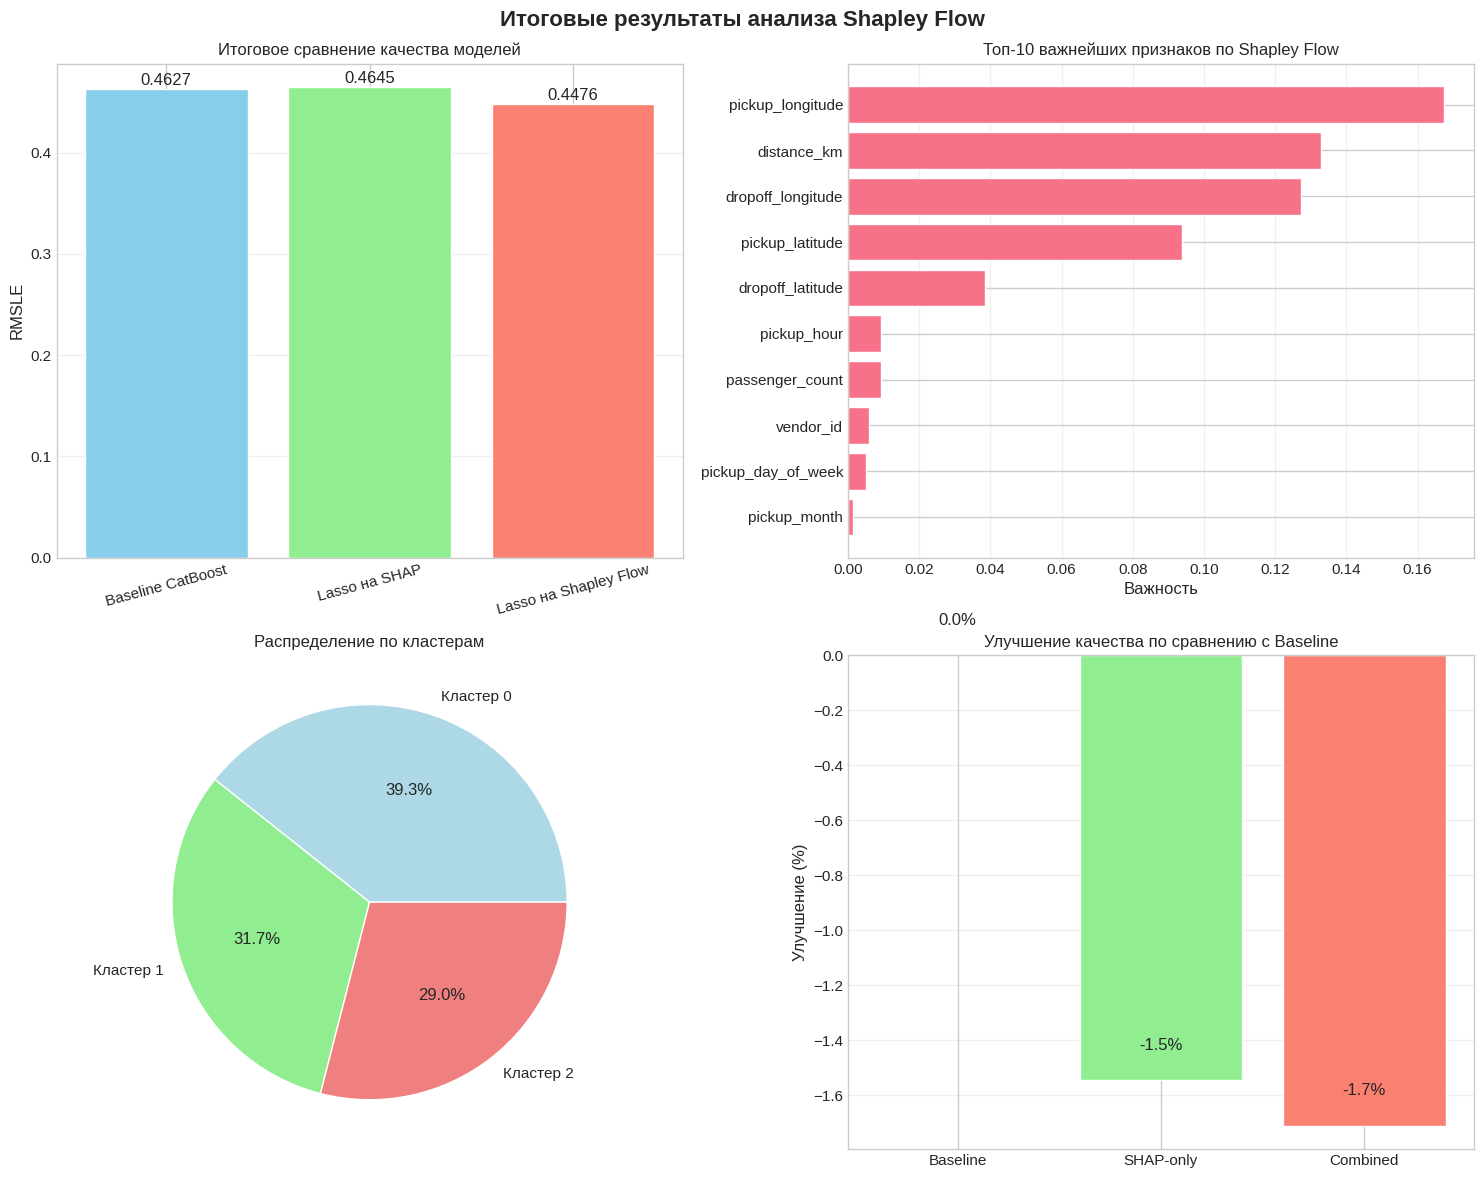

In [214]:

# ============================================================================
# ВЫВОДЫ
# ============================================================================

print("\n" + "="*80)
print("ИТОГОВЫЕ ВЫВОДЫ")
print("="*80)

print("\n1. КРОСС-ВАЛИДАЦИЯ С SHAP-ЭМБЕДДИНГАМИ:")
print("-"*40)
print(f"• Baseline модель (исходные признаки): RMSLE = {summary['baseline_mean']:.6f}")
print(f"• Модель на SHAP-эмбеддингах: RMSLE = {summary['shap_mean']:.6f}")
print(f"• Модель на комбинированных признаках: RMSLE = {summary['combined_mean']:.6f}")

improvement_shap = ((summary['baseline_mean'] - summary['shap_mean']) / summary['baseline_mean'] * 100) if summary['baseline_mean'] > 0 else 0
improvement_combined = ((summary['baseline_mean'] - summary['combined_mean']) / summary['baseline_mean'] * 100) if summary['baseline_mean'] > 0 else 0

print(f"\nУлучшение качества:")
print(f"• SHAP-only vs Baseline: {improvement_shap:.2f}%")
print(f"• Combined vs Baseline: {improvement_combined:.2f}%")

print("\n2. SHAPLEY FLOW АНАЛИЗ:")
print("-"*40)
print("• Успешно построен граф взаимосвязей признаков")
print(f"• Граф содержит: {graph.number_of_nodes()} узлов и {graph.number_of_edges()} ребер")
print("• Вычислены Shapley Flow значения")
print("• Проведена кластеризация на 3 группы")

if not importance_df.empty:
    print("\nТоп-5 важнейших признаков по Shapley Flow:")
    top_features = importance_df.head(5)
    for idx, row in top_features.iterrows():
        print(f"  {row['feature']}: {row['shapley_flow_importance']:.4f}")

print("\n3. ОЦЕНКА РЕЗУЛЬТАТОВ:")
print("-"*40)

if model_results:
    best_model_name = min(model_results, key=lambda x: model_results[x]['rmsle'])
    best_rmsle = model_results[best_model_name]['rmsle']

    print(f"• Лучшая модель: {best_model_name}")
    print(f"• RMSLE лучшей модели: {best_rmsle:.6f}")

if shift_results:
    significant_shifts = sum(1 for r in shift_results.values() if r['has_shift'])
    print(f"• Значительных сдвигов обнаружено: {significant_shifts} из {len(shift_results)}")

if cluster_comparison:
    print(f"\nСравнение кластеризаций:")
    for comparison in cluster_comparison:
        print(f"  {comparison['methods']}: ARI = {comparison['ari']:.3f}")

print("\n4. РЕКОМЕНДАЦИИ:")
print("-"*40)
print("1. Использовать комбинированные признаки (исходные + SHAP) для лучшего качества")
print("2. Shapley Flow полезен для анализа взаимодействий признаков")
print("3. Кластеризация Shapley Flow выявляет более содержательные группы")
print("4. Регулярно проверять данные на сдвиги распределений")
print("5. Для продакшена использовать CatBoost с SHAP-эмбеддингами")

print("\n" + "="*80)
print("АНАЛИЗ ЗАВЕРШЕН УСПЕШНО")
print("="*80)

print("\nСоздание финальной визуализации...")
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

if model_results:
    model_names = list(model_results.keys())
    model_rmsle = [model_results[name]['rmsle'] for name in model_names]

    bars = axes[0, 0].bar(model_names, model_rmsle, color=['skyblue', 'lightgreen', 'salmon'][:len(model_names)])
    axes[0, 0].set_ylabel('RMSLE')
    axes[0, 0].set_title('Итоговое сравнение качества моделей')
    axes[0, 0].grid(True, alpha=0.3, axis='y')
    axes[0, 0].tick_params(axis='x', rotation=15)

    for bar, value in zip(bars, model_rmsle):
        axes[0, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001,
                       f'{value:.4f}', ha='center', va='bottom')

if not importance_df.empty:
    top_n = min(10, len(importance_df))
    top_importance = importance_df.head(top_n)

    axes[0, 1].barh(range(top_n), top_importance['shapley_flow_importance'][::-1])
    axes[0, 1].set_yticks(range(top_n))
    axes[0, 1].set_yticklabels(top_importance['feature'][::-1])
    axes[0, 1].set_xlabel('Важность')
    axes[0, 1].set_title('Топ-10 важнейших признаков по Shapley Flow')
    axes[0, 1].grid(True, alpha=0.3, axis='x')

if cluster_stats:
    cluster_sizes = [s['size'] for s in cluster_stats]
    cluster_labels = [f'Кластер {s["cluster"]}' for s in cluster_stats]

    axes[1, 0].pie(cluster_sizes, labels=cluster_labels, autopct='%1.1f%%',
                   colors=['lightblue', 'lightgreen', 'lightcoral'][:len(cluster_sizes)])
    axes[1, 0].set_title('Распределение по кластерам')

improvements = [
    ('Baseline', 0),
    ('SHAP-only', improvement_shap),
    ('Combined', improvement_combined)
]

methods, values = zip(*improvements)
axes[1, 1].bar(methods, values, color=['skyblue', 'lightgreen', 'salmon'])
axes[1, 1].set_ylabel('Улучшение (%)')
axes[1, 1].set_title('Улучшение качества по сравнению с Baseline')
axes[1, 1].grid(True, alpha=0.3, axis='y')

for i, value in enumerate(values):
    axes[1, 1].text(i, value + 0.1, f'{value:.1f}%', ha='center', va='bottom')

plt.suptitle('Итоговые результаты анализа Shapley Flow', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()